In [1]:
import os
import numpy as np
import pandas as pd

from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import mne

from matplotlib.colors import TwoSlopeNorm

In [2]:
from pycaret.classification import *

<h3>For Healthy Participants</h3>

In [3]:
os_path = "C:/Users/utkar/Desktop/Research_Paper/EEG Analysis/Corollary/Parkinsons-EEG-DeepLearning/Parkinson's disease dataset"
subject = 'sub-hc2'
if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_50pct.csv")):
    print('Yes')

Yes


In [4]:
filenames_list = os.listdir(f"{os_path}/Healthy")
print(filenames_list)


hfd = pd.DataFrame()
katz = pd.DataFrame()
petrosian = pd.DataFrame()
spec_ent = pd.DataFrame()
perm_ent = pd.DataFrame()

svd_ent = pd.DataFrame()
app_ent = pd.DataFrame()
samp_ent = pd.DataFrame()
hjorth = pd.DataFrame()
num_zero = pd.DataFrame()
lziv = pd.DataFrame()
det_fluc = pd.DataFrame()


for subject in filenames_list:
    
    path_hfd = f"{os_path}/Healthy/{subject}/{subject}_healthy_50pct.csv"
    path_katz = f"{os_path}/Healthy/{subject}/{subject}_healthy_katz_50pct.csv"
    path_petrosian = f"{os_path}/Healthy/{subject}/{subject}_healthy_petrosian_50pct.csv"
    path_spec_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_spec_ent_50pct.csv"
    path_perm_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_perm_ent_50pct.csv"
    
    path_svd_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_svd_ent_50pct.csv"
    path_app_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_app_ent_50pct.csv"
    path_samp_ent = f"{os_path}/Healthy/{subject}/{subject}_healthy_samp_ent_50pct.csv"
    path_hjorth = f"{os_path}/Healthy/{subject}/{subject}_healthy_hjorth_50pct.csv"
    path_num_zero = f"{os_path}/Healthy/{subject}/{subject}_healthy_num_zerocross_50pct.csv"
    path_lziv = f"{os_path}/Healthy/{subject}/{subject}_healthy_lziv_50pct.csv"
    path_det_fluc = f"{os_path}/Healthy/{subject}/{subject}_healthy_det_fluc_50pct.csv"



    if (os.path.exists(f"{os_path}/Healthy/{subject}/{subject}_healthy_50pct.csv")):
        
        print("\nSubject: ", subject)
        df_hfd = pd.read_csv(path_hfd)
        df_katz = pd.read_csv(path_katz)
        df_petrosian = pd.read_csv(path_petrosian)
        df_spec_ent = pd.read_csv(path_spec_ent)
        df_perm_ent = pd.read_csv(path_perm_ent)
        df_svd_ent = pd.read_csv(path_svd_ent)
        df_app_ent = pd.read_csv(path_app_ent)
        df_samp_ent = pd.read_csv(path_samp_ent)
        df_hjorth = pd.read_csv(path_hjorth)
        df_num_zero = pd.read_csv(path_num_zero)
        df_lziv = pd.read_csv(path_lziv)
        df_det_fluc = pd.read_csv(path_det_fluc)

        hfd = hfd.append(df_hfd)
        katz = katz.append(df_katz)
        petrosian = petrosian.append(df_petrosian)
        spec_ent = spec_ent.append(df_spec_ent)
        perm_ent = perm_ent.append(df_perm_ent)
        svd_ent = svd_ent.append(df_svd_ent)
        app_ent = app_ent.append(df_app_ent)
        samp_ent = samp_ent.append(df_samp_ent)
        hjorth = hjorth.append(df_hjorth)
        num_zero = num_zero.append(df_num_zero)
        lziv = lziv.append(df_lziv)
        det_fluc = det_fluc.append(df_det_fluc)

['sub-hc10', 'sub-hc2', 'sub-hc21', 'sub-hc24', 'sub-hc29', 'sub-hc31', 'sub-hc33', 'sub-hc4', 'sub-hc7', 'sub-hc8']

Subject:  sub-hc10

Subject:  sub-hc2

Subject:  sub-hc21

Subject:  sub-hc24

Subject:  sub-hc29

Subject:  sub-hc31

Subject:  sub-hc33

Subject:  sub-hc4

Subject:  sub-hc7

Subject:  sub-hc8


In [5]:
det_fluc

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.380256,1.488126,1.649236,1.494442,1.590985,1.603191,1.633116,1.533686,1.524974,1.548991,1.536653,1.564051,1.572117,1.629067,1.548303,1.528125,1.553929,1.597982,1.593399,1.459221,1.590357,1.585050,1.578689,1.504753,1.608704,1.617063,1.591630,1.461176,1.524330,1.521949,1.599900,1.593243
1,1.456079,1.449821,1.622980,1.533607,1.541167,1.612092,1.654204,1.586892,1.587276,1.527927,1.521176,1.620889,1.662095,1.672147,1.610791,1.592674,1.611932,1.658231,1.652590,1.533685,1.628667,1.660476,1.589995,1.492348,1.544755,1.614032,1.560697,1.461258,1.557629,1.521826,1.523514,1.513283
2,1.541186,1.482486,1.613466,1.528603,1.532222,1.631803,1.639704,1.562367,1.573113,1.520686,1.596818,1.597415,1.653694,1.614389,1.593042,1.583374,1.609142,1.652864,1.624709,1.529554,1.602790,1.540337,1.500572,1.453583,1.474000,1.534575,1.527924,1.510512,1.578918,1.553045,1.536778,1.483738
3,1.390941,1.402871,1.596402,1.495266,1.554780,1.496912,1.603186,1.660821,1.579757,1.517759,1.617127,1.579721,1.654153,1.568582,1.494508,1.497063,1.512811,1.620443,1.574513,1.495183,1.524800,1.554623,1.513126,1.430093,1.489879,1.569544,1.515127,1.482505,1.532295,1.448439,1.564737,1.477792
4,1.416821,1.346392,1.551523,1.691033,1.581071,1.495718,1.548971,1.651642,1.614037,1.619680,1.572894,1.633293,1.589735,1.597316,1.528391,1.496407,1.472373,1.562559,1.506047,1.408901,1.469199,1.556868,1.450870,1.373428,1.485919,1.607653,1.500125,1.369573,1.408493,1.498701,1.536175,1.481181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.303387,1.267318,1.247016,1.383169,1.541768,1.294208,1.296306,1.380245,1.450653,1.389436,1.343763,1.415211,1.390203,1.397594,1.352927,1.408640,1.329949,1.354895,1.333215,1.322724,1.284248,1.340997,1.297882,1.248245,1.304119,1.382749,1.288353,1.150684,1.288052,1.241664,1.486941,1.367372
295,1.354494,1.255611,1.227800,1.344625,1.449361,1.238608,1.272334,1.286407,1.478703,1.384722,1.330906,1.448516,1.438102,1.411609,1.324133,1.389901,1.376369,1.378308,1.385972,1.394032,1.283461,1.358986,1.286245,1.220711,1.267672,1.296101,1.235180,1.225074,1.290452,1.229287,1.482363,1.409947
296,1.343840,1.246737,1.270986,1.289703,1.485023,1.205820,1.414878,1.328547,1.440182,1.491122,1.330228,1.442829,1.443729,1.401051,1.306327,1.321303,1.408140,1.391711,1.443909,1.492143,1.488283,1.368681,1.386522,1.539359,1.328527,1.349774,1.178022,1.277313,1.293407,1.228400,1.418887,1.390618
297,1.291194,1.169145,1.249192,1.269523,1.496075,1.270091,1.391540,1.369329,1.391860,1.473523,1.291771,1.377888,1.387027,1.316115,1.315073,1.397305,1.401852,1.363479,1.413147,1.459431,1.487893,1.407272,1.399298,1.479252,1.333839,1.311209,1.181045,1.289965,1.193328,1.189060,1.368686,1.379865


In [6]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.301710,1.306224,1.278961,1.253448,1.246702,1.285447,1.283451,1.267914,1.239452,1.266699,1.320939,1.268671,1.264371,1.282040,1.290346,1.267913,1.286871,1.273697,1.276887,1.282233,1.293964,1.265462,1.301805,1.342618,1.313816,1.267669,1.283357,1.353553,1.283674,1.310279,1.223971,1.261808
295,1.266653,1.316937,1.310811,1.288465,1.266581,1.307764,1.308533,1.319575,1.217135,1.252536,1.320212,1.240097,1.236876,1.280912,1.279407,1.286171,1.277185,1.269935,1.254038,1.254234,1.287833,1.251991,1.285662,1.333646,1.316156,1.290075,1.336106,1.364597,1.251703,1.351622,1.237021,1.240435
296,1.276716,1.310648,1.306883,1.287647,1.269168,1.336908,1.278414,1.295870,1.259584,1.226304,1.294601,1.258159,1.261829,1.287039,1.298740,1.306470,1.300538,1.293869,1.255116,1.263444,1.246510,1.270335,1.238615,1.217538,1.287383,1.260184,1.334398,1.321330,1.277987,1.346018,1.254203,1.254039
297,1.301706,1.354934,1.334315,1.289789,1.243983,1.301844,1.293210,1.289576,1.263538,1.220990,1.303160,1.274971,1.270212,1.298863,1.303811,1.272971,1.298785,1.306526,1.279475,1.293276,1.243515,1.252942,1.245988,1.242815,1.308538,1.277697,1.324179,1.292360,1.346161,1.331772,1.259488,1.266220


<h3>For Parkinson's Participants</h3>

In [8]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd28', 'sub-pd5']


In [9]:
filenames_list = os.listdir(f"{os_path}/PD")
print(filenames_list)


hfd_pd = pd.DataFrame()
katz_pd = pd.DataFrame()
petrosian_pd = pd.DataFrame()
spec_ent_pd = pd.DataFrame()
perm_ent_pd = pd.DataFrame()
svd_ent_pd = pd.DataFrame()
app_ent_pd = pd.DataFrame()
samp_ent_pd = pd.DataFrame()
hjorth_pd = pd.DataFrame()
num_zero_pd = pd.DataFrame()
lziv_pd = pd.DataFrame()
det_fluc_pd = pd.DataFrame()


for subject in filenames_list:

    path_hfd_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_50pct.csv"
    path_katz_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_katz_50pct.csv"
    path_petrosian_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_petrosian_50pct.csv"
    path_spec_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_spec_ent_50pct.csv"
    path_perm_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_perm_ent_50pct.csv"
    path_svd_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_svd_ent_50pct.csv"
    path_app_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_app_ent_50pct.csv"
    path_samp_ent_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_samp_ent_50pct.csv"
    path_hjorth_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_hjorth_50pct.csv"
    path_num_zero_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_num_zerocross_50pct.csv"
    path_lziv_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_lziv_50pct.csv"
    path_det_fluc_pd = f"{os_path}/PD/{subject}/{subject}_PD_ON_det_fluc_50pct.csv"

    
    if (os.path.exists(f"{os_path}/PD/{subject}/{subject}_PD_ON_50pct.csv")):
        
        print('\nSubject:', subject)
        df_hfd_pd = pd.read_csv(path_hfd_pd)
        df_katz_pd = pd.read_csv(path_katz_pd)
        df_petrosian = pd.read_csv(path_petrosian_pd)
        df_spec_ent = pd.read_csv(path_spec_ent_pd)
        df_perm_ent = pd.read_csv(path_perm_ent_pd)
        
        df_svd_ent = pd.read_csv(path_svd_ent_pd)
        df_app_ent = pd.read_csv(path_app_ent_pd)
        df_samp_ent = pd.read_csv(path_samp_ent_pd)
        df_hjorth_pd = pd.read_csv(path_hjorth_pd)
        df_num_zero_pd = pd.read_csv(path_num_zero_pd)
        df_lziv_pd = pd.read_csv(path_lziv_pd)
        df_det_fluc_pd = pd.read_csv(path_det_fluc_pd)




        hfd_pd = hfd_pd.append(df_hfd_pd)
        katz_pd = katz_pd.append(df_katz_pd)
        petrosian_pd = petrosian_pd.append(df_petrosian)
        spec_ent_pd = spec_ent_pd.append(df_spec_ent)
        perm_ent_pd = perm_ent_pd.append(df_perm_ent)
        
        svd_ent_pd = svd_ent_pd.append(df_svd_ent)
        app_ent_pd = app_ent_pd.append(df_app_ent)
        samp_ent_pd = samp_ent_pd.append(df_samp_ent)
        hjorth_pd = hjorth_pd.append(df_hjorth_pd)
        num_zero_pd = num_zero_pd.append(df_num_zero_pd)
        lziv_pd = lziv_pd.append(df_lziv_pd)
        det_fluc_pd = det_fluc_pd.append(df_det_fluc_pd)

['.DS_Store', 'sub-pd11', 'sub-pd12', 'sub-pd14', 'sub-pd16', 'sub-pd17', 'sub-pd19', 'sub-pd22', 'sub-pd23', 'sub-pd28', 'sub-pd5']

Subject: sub-pd11

Subject: sub-pd12

Subject: sub-pd14

Subject: sub-pd16

Subject: sub-pd17

Subject: sub-pd19

Subject: sub-pd22

Subject: sub-pd23

Subject: sub-pd28

Subject: sub-pd5


In [10]:
150*17

2550

In [11]:
spec_ent_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.546736,0.556076,0.473120,0.557950,0.532212,0.569210,0.556794,0.548265,0.538362,0.539079,0.529123,0.533291,0.527826,0.536257,0.530391,0.538429,0.518713,0.503873,0.514977,0.512767,0.524804,0.512691,0.526478,0.575533,0.571447,0.499096,0.522316,0.549910,0.542013,0.544895,0.540928,0.527064
1,0.533904,0.522061,0.507293,0.533912,0.532711,0.563795,0.576868,0.552356,0.519594,0.496720,0.484607,0.485693,0.523805,0.497980,0.486678,0.503308,0.501690,0.513631,0.511175,0.487565,0.502328,0.525181,0.519225,0.494210,0.521353,0.530227,0.521486,0.527523,0.514185,0.527526,0.511824,0.519074
2,0.541071,0.538759,0.524837,0.544201,0.546238,0.552585,0.594144,0.527179,0.541770,0.506545,0.491227,0.508471,0.529645,0.499640,0.496025,0.483556,0.510724,0.522909,0.505716,0.486483,0.477311,0.511316,0.488736,0.464813,0.498288,0.508250,0.501610,0.531774,0.531509,0.535153,0.531489,0.517542
3,0.548970,0.540192,0.526434,0.551953,0.516086,0.570875,0.587653,0.542950,0.525136,0.487101,0.514427,0.523197,0.526834,0.520919,0.514282,0.504769,0.526363,0.529554,0.494149,0.497353,0.499242,0.511340,0.526909,0.492914,0.529708,0.526317,0.533754,0.537285,0.557144,0.545157,0.517918,0.553163
4,0.535684,0.528013,0.488744,0.530436,0.508648,0.601613,0.600295,0.521129,0.518478,0.481207,0.510958,0.495161,0.527255,0.513018,0.513889,0.530962,0.510165,0.531076,0.536277,0.562461,0.545324,0.536905,0.554818,0.570527,0.541784,0.550403,0.539275,0.541992,0.538532,0.545753,0.492606,0.546211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.579022,0.619155,0.514105,0.527048,0.549363,0.548905,0.468314,0.508872,0.518050,0.472023,0.491728,0.484773,0.544724,0.503953,0.477008,0.461399,0.445696,0.443429,0.445840,0.435128,0.414790,0.485808,0.458255,0.452884,0.498117,0.566189,0.598671,0.555914,0.596041,0.538529,0.560941,0.534664
295,0.578436,0.620483,0.502764,0.588395,0.560323,0.492717,0.401778,0.493195,0.544065,0.387379,0.401234,0.485872,0.490470,0.477644,0.472075,0.394899,0.352131,0.363260,0.356580,0.333326,0.349893,0.418575,0.425625,0.349181,0.402871,0.553467,0.608148,0.426741,0.596415,0.594515,0.577691,0.544164
296,0.574628,0.569948,0.469814,0.597366,0.544412,0.434326,0.375373,0.448755,0.507916,0.363619,0.377236,0.425318,0.497128,0.419412,0.408235,0.396356,0.390333,0.427388,0.440293,0.347966,0.412822,0.474290,0.476381,0.403815,0.440415,0.536981,0.613230,0.447863,0.607799,0.612429,0.586374,0.530359
297,0.578425,0.615063,0.509094,0.610517,0.562988,0.533909,0.413233,0.515796,0.546268,0.439316,0.405949,0.450467,0.503472,0.420564,0.414137,0.454610,0.480388,0.472386,0.465553,0.431876,0.428005,0.470798,0.457306,0.395448,0.384694,0.561778,0.591243,0.399091,0.588572,0.604465,0.565367,0.522910


In [12]:
hfd_pd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.157822,1.151306,1.118235,1.160752,1.179193,1.201934,1.246479,1.170408,1.112922,1.128120,1.116596,1.121840,1.114089,1.122279,1.119085,1.131254,1.124406,1.129936,1.122890,1.137132,1.130299,1.115813,1.122411,1.150914,1.136262,1.157736,1.160811,1.191306,1.169726,1.150618,1.172943,1.166072
1,1.132963,1.141281,1.126744,1.150444,1.131404,1.204390,1.239575,1.182383,1.132258,1.106291,1.095588,1.122810,1.119653,1.120142,1.107215,1.109798,1.108710,1.113145,1.103360,1.102912,1.108598,1.114450,1.118497,1.126071,1.128786,1.132860,1.129625,1.155524,1.154158,1.140286,1.110192,1.107067
2,1.152683,1.170040,1.151957,1.181022,1.140208,1.202343,1.263643,1.168939,1.157391,1.107604,1.094207,1.115129,1.129978,1.130316,1.115777,1.112208,1.117548,1.121222,1.107198,1.101860,1.100912,1.134711,1.115932,1.123310,1.106439,1.118271,1.102065,1.126409,1.131848,1.140861,1.120875,1.156219
3,1.139456,1.152070,1.152064,1.158280,1.129810,1.184146,1.255938,1.161151,1.147957,1.120357,1.105472,1.113319,1.112875,1.129056,1.134819,1.127884,1.135951,1.142646,1.127415,1.141415,1.124576,1.130458,1.139951,1.194099,1.124007,1.163034,1.113219,1.140344,1.143810,1.134127,1.130350,1.181162
4,1.138728,1.147296,1.149895,1.167051,1.147807,1.215122,1.250002,1.162177,1.153904,1.099973,1.107481,1.110563,1.138509,1.115342,1.123196,1.116717,1.110815,1.133592,1.139282,1.140610,1.141028,1.147746,1.142069,1.199126,1.147808,1.154067,1.158446,1.186122,1.152728,1.130807,1.140546,1.142787
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.271917,1.309400,1.255100,1.222529,1.201312,1.222481,1.147580,1.134624,1.165499,1.158822,1.167207,1.163424,1.172353,1.166870,1.162558,1.153044,1.134320,1.133594,1.119523,1.122625,1.113024,1.109010,1.110948,1.137022,1.160438,1.185334,1.314604,1.194366,1.300308,1.229899,1.236167,1.143006
295,1.264644,1.303027,1.243231,1.242400,1.155462,1.174421,1.098604,1.115619,1.157503,1.099225,1.110041,1.120011,1.149077,1.128389,1.130056,1.104882,1.090937,1.096474,1.093067,1.074934,1.082534,1.110970,1.127206,1.106198,1.125653,1.174121,1.298859,1.133917,1.280692,1.266533,1.194536,1.129463
296,1.272459,1.283007,1.217631,1.268596,1.198533,1.155764,1.084977,1.102267,1.170185,1.057853,1.061698,1.098382,1.143716,1.091243,1.097575,1.087911,1.086540,1.092730,1.102096,1.076996,1.100535,1.112963,1.153222,1.110765,1.118087,1.216574,1.300668,1.158064,1.264340,1.275445,1.238490,1.126746
297,1.297585,1.337095,1.275226,1.259928,1.186579,1.219597,1.140302,1.137021,1.161026,1.088893,1.097940,1.111704,1.138134,1.092864,1.113707,1.120024,1.128701,1.125865,1.144158,1.110388,1.089843,1.114853,1.115678,1.111402,1.120515,1.169732,1.272436,1.209465,1.272775,1.307603,1.206636,1.126008


<h2>1. Higuchi</h2>

In [13]:
hfd_pd['Y'] = 1
hfd['Y'] = 0

In [14]:
hfd

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,1.301710,1.306224,1.278961,1.253448,1.246702,1.285447,1.283451,1.267914,1.239452,1.266699,1.320939,1.268671,1.264371,1.282040,1.290346,1.267913,1.286871,1.273697,1.276887,1.282233,1.293964,1.265462,1.301805,1.342618,1.313816,1.267669,1.283357,1.353553,1.283674,1.310279,1.223971,1.261808,0
295,1.266653,1.316937,1.310811,1.288465,1.266581,1.307764,1.308533,1.319575,1.217135,1.252536,1.320212,1.240097,1.236876,1.280912,1.279407,1.286171,1.277185,1.269935,1.254038,1.254234,1.287833,1.251991,1.285662,1.333646,1.316156,1.290075,1.336106,1.364597,1.251703,1.351622,1.237021,1.240435,0
296,1.276716,1.310648,1.306883,1.287647,1.269168,1.336908,1.278414,1.295870,1.259584,1.226304,1.294601,1.258159,1.261829,1.287039,1.298740,1.306470,1.300538,1.293869,1.255116,1.263444,1.246510,1.270335,1.238615,1.217538,1.287383,1.260184,1.334398,1.321330,1.277987,1.346018,1.254203,1.254039,0
297,1.301706,1.354934,1.334315,1.289789,1.243983,1.301844,1.293210,1.289576,1.263538,1.220990,1.303160,1.274971,1.270212,1.298863,1.303811,1.272971,1.298785,1.306526,1.279475,1.293276,1.243515,1.252942,1.245988,1.242815,1.308538,1.277697,1.324179,1.292360,1.346161,1.331772,1.259488,1.266220,0


In [15]:
X1 = hfd.append(hfd_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.271917,1.309400,1.255100,1.222529,1.201312,1.222481,1.147580,1.134624,1.165499,1.158822,1.167207,1.163424,1.172353,1.166870,1.162558,1.153044,1.134320,1.133594,1.119523,1.122625,1.113024,1.109010,1.110948,1.137022,1.160438,1.185334,1.314604,1.194366,1.300308,1.229899,1.236167,1.143006,1
5976,1.264644,1.303027,1.243231,1.242400,1.155462,1.174421,1.098604,1.115619,1.157503,1.099225,1.110041,1.120011,1.149077,1.128389,1.130056,1.104882,1.090937,1.096474,1.093067,1.074934,1.082534,1.110970,1.127206,1.106198,1.125653,1.174121,1.298859,1.133917,1.280692,1.266533,1.194536,1.129463,1
5977,1.272459,1.283007,1.217631,1.268596,1.198533,1.155764,1.084977,1.102267,1.170185,1.057853,1.061698,1.098382,1.143716,1.091243,1.097575,1.087911,1.086540,1.092730,1.102096,1.076996,1.100535,1.112963,1.153222,1.110765,1.118087,1.216574,1.300668,1.158064,1.264340,1.275445,1.238490,1.126746,1
5978,1.297585,1.337095,1.275226,1.259928,1.186579,1.219597,1.140302,1.137021,1.161026,1.088893,1.097940,1.111704,1.138134,1.092864,1.113707,1.120024,1.128701,1.125865,1.144158,1.110388,1.089843,1.114853,1.115678,1.111402,1.120515,1.169732,1.272436,1.209465,1.272775,1.307603,1.206636,1.126008,1


<h2>Using Pycaret</h2>

In [16]:
X3 = X1.iloc[:,1:]
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,P3,Pz,PO3,O1,Oz,O2,PO4,P4,P8,CP6,CP2,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,1.198706,1.168852,1.185941,1.217324,1.213132,1.196936,1.175975,1.180963,1.262771,1.209712,1.172141,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,1.152472,1.141021,1.143509,1.149974,1.158547,1.155080,1.135557,1.146793,1.218248,1.201555,1.150474,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,1.157337,1.138009,1.147876,1.168796,1.172654,1.157062,1.141346,1.148520,1.206084,1.194348,1.177655,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,1.169678,1.153588,1.171601,1.228923,1.225425,1.211493,1.154284,1.163898,1.207567,1.204964,1.187353,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,1.130766,1.180350,1.159337,1.207323,1.221552,1.226293,1.175317,1.195852,1.269005,1.261692,1.209285,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.309400,1.255100,1.222529,1.201312,1.222481,1.147580,1.134624,1.165499,1.158822,1.167207,1.163424,1.172353,1.166870,1.162558,1.153044,1.134320,1.133594,1.119523,1.122625,1.113024,1.109010,1.110948,1.137022,1.160438,1.185334,1.314604,1.194366,1.300308,1.229899,1.236167,1.143006,1
5976,1.303027,1.243231,1.242400,1.155462,1.174421,1.098604,1.115619,1.157503,1.099225,1.110041,1.120011,1.149077,1.128389,1.130056,1.104882,1.090937,1.096474,1.093067,1.074934,1.082534,1.110970,1.127206,1.106198,1.125653,1.174121,1.298859,1.133917,1.280692,1.266533,1.194536,1.129463,1
5977,1.283007,1.217631,1.268596,1.198533,1.155764,1.084977,1.102267,1.170185,1.057853,1.061698,1.098382,1.143716,1.091243,1.097575,1.087911,1.086540,1.092730,1.102096,1.076996,1.100535,1.112963,1.153222,1.110765,1.118087,1.216574,1.300668,1.158064,1.264340,1.275445,1.238490,1.126746,1
5978,1.337095,1.275226,1.259928,1.186579,1.219597,1.140302,1.137021,1.161026,1.088893,1.097940,1.111704,1.138134,1.092864,1.113707,1.120024,1.128701,1.125865,1.144158,1.110388,1.089843,1.114853,1.115678,1.111402,1.120515,1.169732,1.272436,1.209465,1.272775,1.307603,1.206636,1.126008,1


In [17]:
clf = setup(data=X1, target='Y', session_id=123, feature_selection=True, feature_selection_threshold=0.9, feature_selection_method='boruta', log_experiment=True, experiment_name='PD')

,Description,Value
0,session_id,123
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [18]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9630,0.9920,0.9715,0.9562,0.9636,0.9259,0.9265,0.2253
xgboost,Extreme Gradient Boosting,0.9587,0.9916,0.9611,0.9573,0.9590,0.9173,0.9177,0.2927
lightgbm,Light Gradient Boosting Machine,0.9563,0.9918,0.9573,0.9562,0.9566,0.9125,0.9129,0.0727
qda,Quadratic Discriminant Analysis,0.9548,0.9918,0.9597,0.9515,0.9553,0.9097,0.9101,0.0053
et,Extra Trees Classifier,0.9517,0.9885,0.9450,0.9591,0.9518,0.9035,0.9038,0.0740
rf,Random Forest Classifier,0.9400,0.9843,0.9331,0.9474,0.9400,0.8801,0.8805,0.1407
gbc,Gradient Boosting Classifier,0.9168,0.9730,0.9274,0.9099,0.9183,0.8336,0.8343,0.2913
lda,Linear Discriminant Analysis,0.8573,0.9299,0.8810,0.8435,0.8615,0.7146,0.7160,0.0047
dt,Decision Tree Classifier,0.8476,0.8475,0.8554,0.8453,0.8498,0.6950,0.6960,0.0113
ridge,Ridge Classifier,0.8471,0.0000,0.8725,0.8324,0.8518,0.6940,0.6952,0.0040


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
knn = create_model('knn', n_neighbors=5, fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9391,0.9900,0.9716,0.9133,0.9416,0.8780,0.8799
1,0.9677,0.9921,0.9787,0.9583,0.9684,0.9355,0.9357
2,0.9570,0.9958,1.0000,0.9216,0.9592,0.9139,0.9173
3,0.9498,0.9907,0.9362,0.9635,0.9496,0.8997,0.9000
4,0.9857,0.9983,0.9858,0.9858,0.9858,0.9713,0.9713
5,0.9821,0.9950,0.9929,0.9722,0.9825,0.9641,0.9644
6,0.9498,0.9876,0.9716,0.9320,0.9514,0.8996,0.9004
7,0.9677,0.9976,0.9574,0.9783,0.9677,0.9355,0.9357
8,0.9749,0.9970,0.9858,0.9653,0.9754,0.9498,0.9500


<h2>KNN giving 95.11% for 50pct Overlap</h2>

In [20]:
qda = create_model('qda', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9606,0.9890,0.9574,0.9643,0.9609,0.9211,0.9212
1,0.9176,0.9861,0.9149,0.9214,0.9181,0.8351,0.8351
2,0.9642,0.9952,0.9787,0.9517,0.9650,0.9283,0.9287
3,0.9355,0.9872,0.9149,0.9556,0.9348,0.8710,0.8718
4,0.9606,0.9931,0.9716,0.9514,0.9614,0.9211,0.9213
5,0.9570,0.9955,0.9787,0.9388,0.9583,0.9139,0.9148
6,0.9606,0.9895,0.9716,0.9514,0.9614,0.9211,0.9213
7,0.9642,0.9912,0.9574,0.9712,0.9643,0.9283,0.9284
8,0.9570,0.9958,0.9504,0.9640,0.9571,0.9140,0.9141


<h2>QDA = 92.90%</h2>

In [21]:
import xgboost as xgb
from xgboost import XGBClassifier

In [22]:
X3

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,...,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,...,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,...,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,...,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,...,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.309400,1.255100,1.222529,1.201312,1.222481,1.147580,1.134624,1.165499,1.158822,1.167207,...,1.137022,1.160438,1.185334,1.314604,1.194366,1.300308,1.229899,1.236167,1.143006,1
5976,1.303027,1.243231,1.242400,1.155462,1.174421,1.098604,1.115619,1.157503,1.099225,1.110041,...,1.106198,1.125653,1.174121,1.298859,1.133917,1.280692,1.266533,1.194536,1.129463,1
5977,1.283007,1.217631,1.268596,1.198533,1.155764,1.084977,1.102267,1.170185,1.057853,1.061698,...,1.110765,1.118087,1.216574,1.300668,1.158064,1.264340,1.275445,1.238490,1.126746,1
5978,1.337095,1.275226,1.259928,1.186579,1.219597,1.140302,1.137021,1.161026,1.088893,1.097940,...,1.111402,1.120515,1.169732,1.272436,1.209465,1.272775,1.307603,1.206636,1.126008,1


In [23]:
X3 = X1
X3

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.272718,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,...,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382,0
1,1.228825,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,...,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252,0
2,1.199894,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,...,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176,0
3,1.228889,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,...,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822,0
4,1.256024,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,...,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.271917,1.309400,1.255100,1.222529,1.201312,1.222481,1.147580,1.134624,1.165499,1.158822,...,1.137022,1.160438,1.185334,1.314604,1.194366,1.300308,1.229899,1.236167,1.143006,1
5976,1.264644,1.303027,1.243231,1.242400,1.155462,1.174421,1.098604,1.115619,1.157503,1.099225,...,1.106198,1.125653,1.174121,1.298859,1.133917,1.280692,1.266533,1.194536,1.129463,1
5977,1.272459,1.283007,1.217631,1.268596,1.198533,1.155764,1.084977,1.102267,1.170185,1.057853,...,1.110765,1.118087,1.216574,1.300668,1.158064,1.264340,1.275445,1.238490,1.126746,1
5978,1.297585,1.337095,1.275226,1.259928,1.186579,1.219597,1.140302,1.137021,1.161026,1.088893,...,1.111402,1.120515,1.169732,1.272436,1.209465,1.272775,1.307603,1.206636,1.126008,1


In [24]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [25]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.230883,1.217525,1.251449,1.174643,1.177752,1.188140,1.230586,1.236045,1.209684,1.201771,...,1.159494,1.218089,1.186616,1.180885,1.177174,1.276833,1.237486,1.243378,1.170001,1.206382
1,1.234257,1.192588,1.203963,1.199256,1.166135,1.166272,1.199364,1.189102,1.202311,1.199565,...,1.163232,1.223979,1.190049,1.172509,1.177199,1.242967,1.187622,1.198423,1.192080,1.200252
2,1.236175,1.164954,1.178735,1.205335,1.158044,1.154715,1.167434,1.163438,1.205064,1.186199,...,1.185348,1.250232,1.213647,1.195909,1.190565,1.200009,1.165318,1.177789,1.170320,1.196176
3,1.235301,1.198785,1.218547,1.207185,1.205389,1.147410,1.172553,1.157788,1.174630,1.151395,...,1.196183,1.250994,1.226766,1.184275,1.200903,1.242802,1.196422,1.228284,1.175591,1.215822
4,1.255662,1.255951,1.202373,1.181663,1.242750,1.187534,1.172195,1.136841,1.135360,1.172125,...,1.236091,1.295985,1.184884,1.151923,1.200143,1.256713,1.220124,1.225626,1.165730,1.201905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.309400,1.255100,1.222529,1.201312,1.222481,1.147580,1.134624,1.165499,1.158822,1.167207,...,1.110948,1.137022,1.160438,1.185334,1.314604,1.194366,1.300308,1.229899,1.236167,1.143006
5976,1.303027,1.243231,1.242400,1.155462,1.174421,1.098604,1.115619,1.157503,1.099225,1.110041,...,1.127206,1.106198,1.125653,1.174121,1.298859,1.133917,1.280692,1.266533,1.194536,1.129463
5977,1.283007,1.217631,1.268596,1.198533,1.155764,1.084977,1.102267,1.170185,1.057853,1.061698,...,1.153222,1.110765,1.118087,1.216574,1.300668,1.158064,1.264340,1.275445,1.238490,1.126746
5978,1.337095,1.275226,1.259928,1.186579,1.219597,1.140302,1.137021,1.161026,1.088893,1.097940,...,1.115678,1.111402,1.120515,1.169732,1.272436,1.209465,1.272775,1.307603,1.206636,1.126008


In [26]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5975    1
5976    1
5977    1
5978    1
5979    1
Name: Y, Length: 5980, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [28]:
y_train

2683    0
4285    1
4014    1
5765    1
1019    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4006, dtype: int64

In [29]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
2683,1.105698,1.076068,1.241566,1.094969,1.111597,1.148326,1.183752,1.081351,1.116674,1.155838,...,1.148979,1.194533,1.163143,1.127127,1.145981,1.156136,1.181790,1.111278,1.076674,1.147187
4285,1.250157,1.271740,1.273556,1.216905,1.263189,1.248564,1.219619,1.199923,1.241520,1.186238,...,1.192097,1.250090,1.248620,1.210970,1.240824,1.275882,1.269466,1.249012,1.225068,1.203904
4014,1.337157,1.234447,1.244687,1.159372,1.229526,1.194737,1.144316,1.129491,1.125152,1.159579,...,1.171055,1.212236,1.259069,1.165817,1.352067,1.238828,1.283412,1.267039,1.157579,1.142398
5765,1.254786,1.212507,1.195496,1.179337,1.161478,1.109028,1.190777,1.173771,1.151520,1.132154,...,1.150727,1.199036,1.145518,1.162168,1.242270,1.196842,1.327318,1.282728,1.206480,1.171215
1019,1.281129,1.239423,1.317210,1.292023,1.259053,1.251223,1.297231,1.288963,1.276189,1.257555,...,1.230356,1.332019,1.226862,1.266757,1.292586,1.247957,1.315816,1.230835,1.271444,1.273713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1.205945,1.209751,1.190935,1.173401,1.176767,1.196987,1.218619,1.162888,1.163295,1.182554,...,1.164405,1.143882,1.175759,1.181133,1.238346,1.192930,1.254631,1.209044,1.174498,1.168752
4060,1.274300,1.187805,1.280211,1.140990,1.298651,1.177440,1.136585,1.124179,1.129984,1.183091,...,1.165340,1.206697,1.299582,1.176260,1.300852,1.265384,1.313903,1.286082,1.127584,1.106578
1346,1.275925,1.275447,1.233674,1.181802,1.172011,1.183639,1.196015,1.121149,1.127065,1.129521,...,1.133906,1.240824,1.148129,1.118159,1.191639,1.221858,1.219471,1.182912,1.134621,1.141605
3454,1.209527,1.197083,1.149311,1.160362,1.127364,1.151826,1.148437,1.133746,1.134694,1.241716,...,1.117351,1.127090,1.143989,1.147156,1.188089,1.205158,1.268285,1.155236,1.149808,1.136988


<h3>XGBoost</h3>

In [30]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.14%


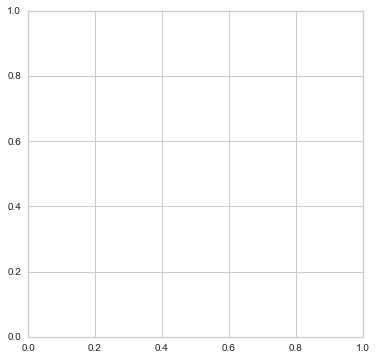

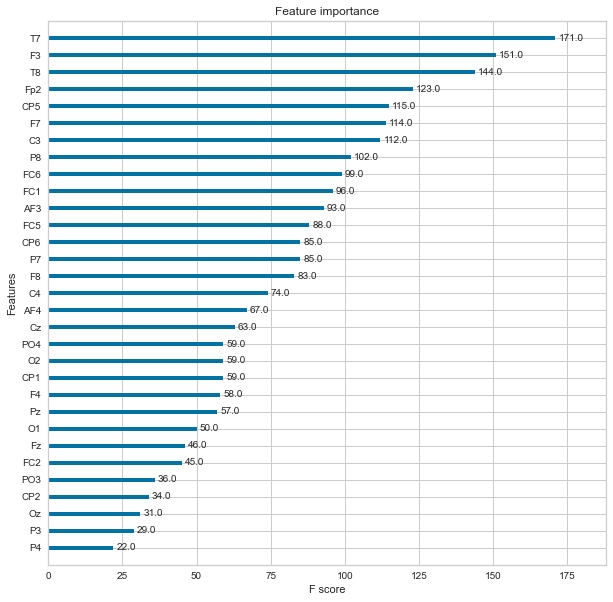

In [31]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

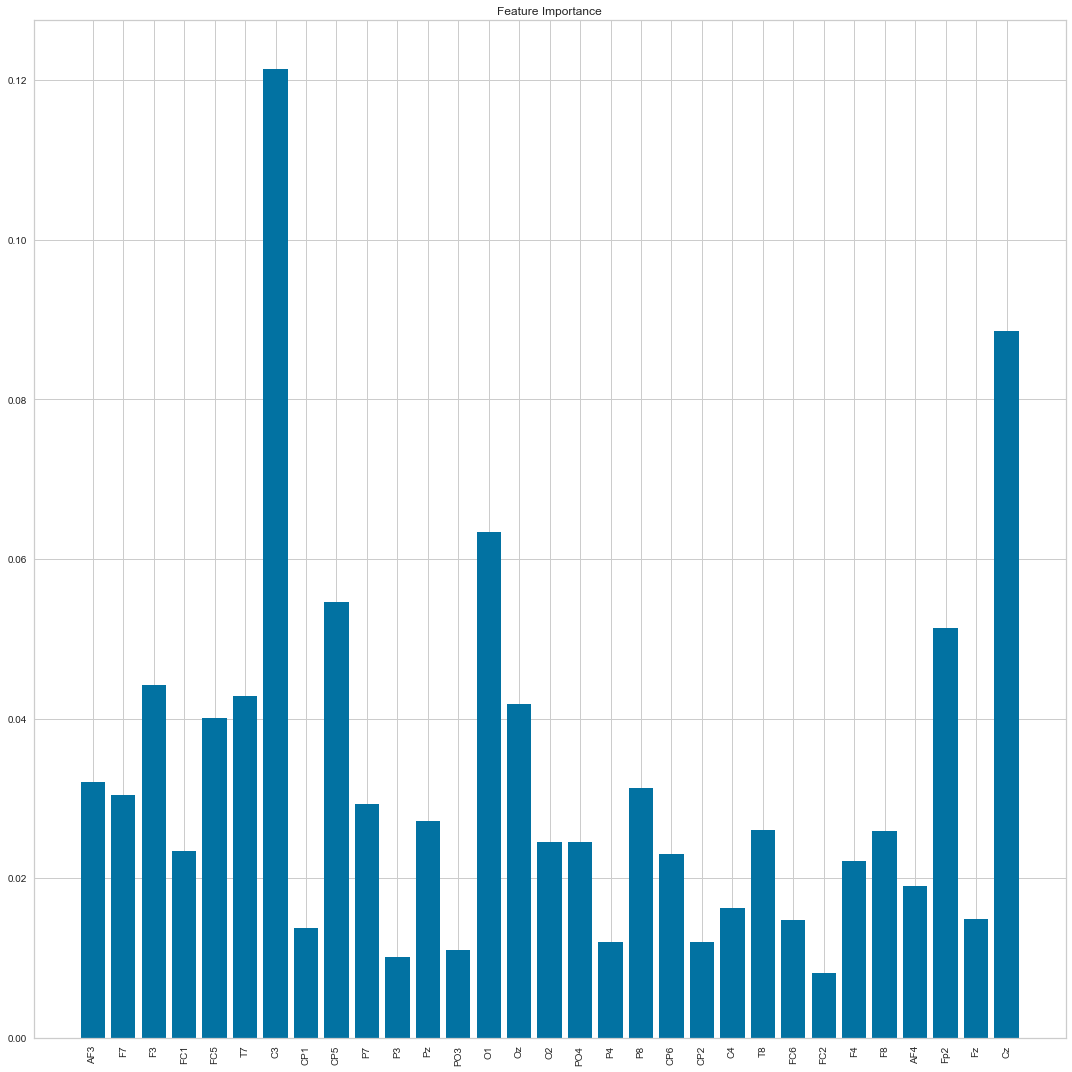

In [32]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

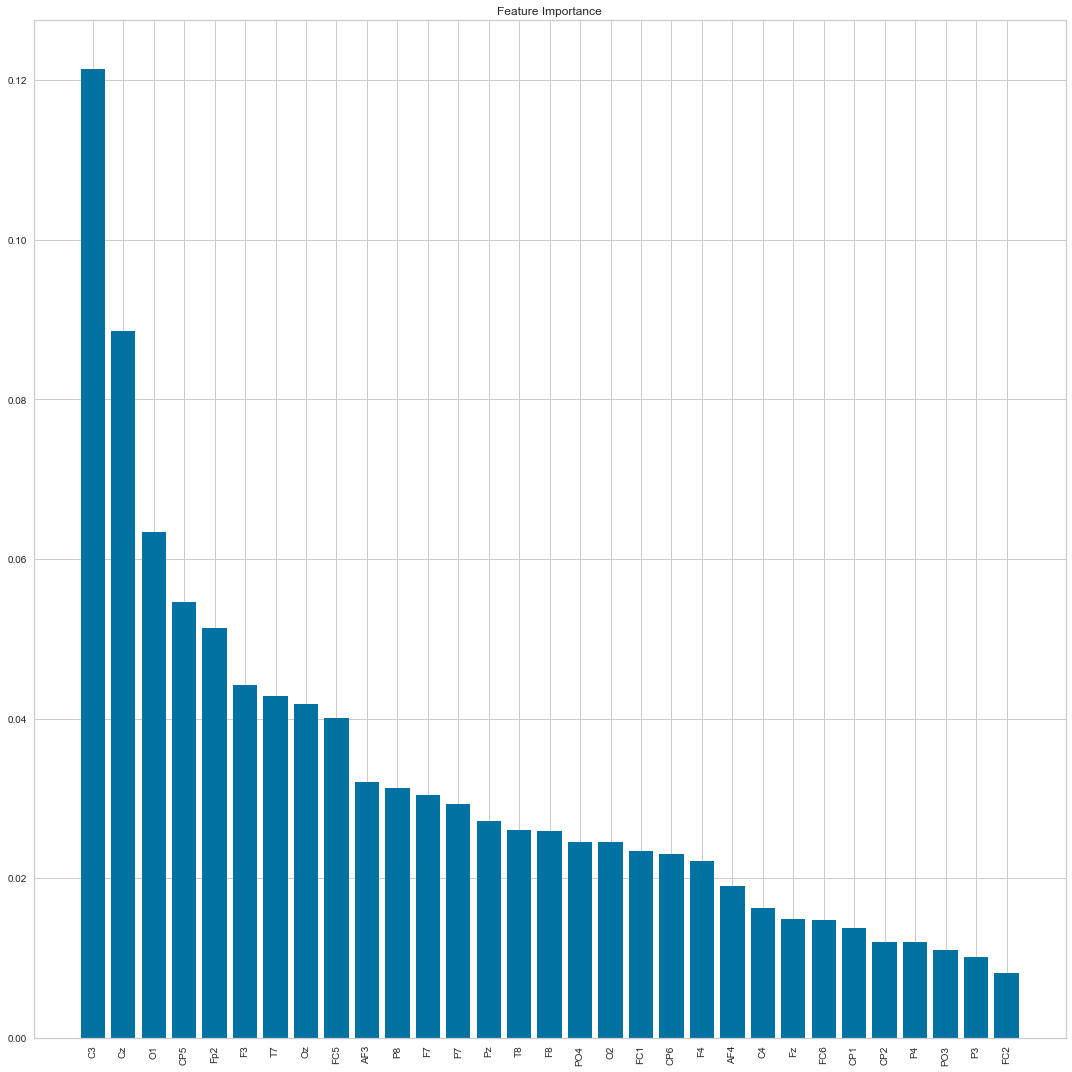

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

<h2>KNN Classifier</h2>

In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9594731509625126


<h2>n=5 -> 94.80%</h2>

In [35]:
subject = "sub-hc33"
path = f"{os_path}/Healthy/{subject}/"
filename = f"ses-hc/eeg/{subject}_ses-hc_task-rest_eeg.bdf"

EEG_data = mne.io.read_raw_bdf(f"{path}{filename}", preload=True)
low_freq, high_freq = 1.0, 40.0 # values in Hz
raw = EEG_data.copy().filter(low_freq, high_freq, n_jobs=4)
raw.crop(tmax=150)
raw = raw.drop_channels(['EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status'])
std_montage = mne.channels.make_standard_montage('biosemi32')
raw.set_montage(std_montage)

Extracting EDF parameters from C:\Users\utkar\Desktop\Research_Paper\EEG Analysis\Corollary\Parkinsons-EEG-DeepLearning\Parkinson's disease dataset\Healthy\sub-hc33\ses-hc\eeg\sub-hc33_ses-hc_task-rest_eeg.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 97279  =      0.000 ...   189.998 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 sec)



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    3.0s finished


<RawEDF | sub-hc33_ses-hc_task-rest_eeg.bdf, 32 x 76801 (150.0 s), ~18.8 MB, data loaded>

In [36]:
raw.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz']

In [37]:
importances

array([0.03199048, 0.0304393 , 0.04416081, 0.02345943, 0.04005491,
       0.04283231, 0.12140312, 0.01380907, 0.05465548, 0.02932356,
       0.01010805, 0.02710281, 0.01097795, 0.06339061, 0.04185086,
       0.02447121, 0.02450824, 0.01194896, 0.03131011, 0.02303492,
       0.01197874, 0.01620688, 0.02608604, 0.01481591, 0.00811615,
       0.02217346, 0.02586929, 0.01906087, 0.05137944, 0.01488694,
       0.08859406], dtype=float32)

In [38]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03199048, 0.0304393 , 0.04416081, 0.02345943,
       0.04005491, 0.04283231, 0.12140312, 0.01380907, 0.05465548,
       0.02932356, 0.01010805, 0.02710281, 0.01097795, 0.06339061,
       0.04185086, 0.02447121, 0.02450824, 0.01194896, 0.03131011,
       0.02303492, 0.01197874, 0.01620688, 0.02608604, 0.01481591,
       0.00811615, 0.02217346, 0.02586929, 0.01906087, 0.05137944,
       0.01488694, 0.08859406])

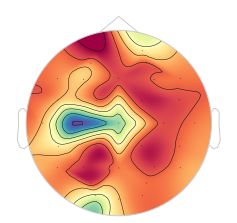

(<matplotlib.image.AxesImage at 0x2663baedcd0>,
 <matplotlib.contour.QuadContourSet at 0x2663baeda90>)

In [39]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>2. Katz</h2>

In [40]:
katz_pd['Y'] = 1
katz['Y'] = 0

In [41]:
X1 = katz.append(katz_pd).reset_index().drop('index', axis=1)
X = X1.iloc[:,:-1]
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2.288694,2.261343,1.957151,2.114255,1.901227,2.042649,1.872106,1.760949,1.966785,2.153076,...,2.273533,2.065337,1.798328,1.956942,2.221768,2.133967,1.964263,2.013900,1.824711,0
1,1.856302,2.207272,1.813493,2.086551,2.150677,1.929220,1.795832,1.776402,1.745417,2.123935,...,2.106223,1.970152,1.745334,1.665783,2.020566,2.090153,2.012203,1.832529,1.670601,0
2,2.144170,1.975911,1.730994,2.190352,2.211066,2.002647,1.968288,1.722608,1.841809,2.297257,...,2.101464,2.109350,1.971473,1.895240,1.931973,1.898496,2.162263,1.974926,2.107759,0
3,2.240669,1.832651,1.457504,1.540809,1.968830,1.998767,1.823726,1.736550,1.903326,1.937638,...,2.100638,1.820048,1.958333,1.932143,2.064011,2.002063,2.386283,2.011129,2.035523,0
4,1.897278,2.186063,1.759125,1.622589,2.153089,1.764412,1.985599,1.712290,1.938490,2.182477,...,2.452825,1.697789,1.538891,1.848033,2.033234,1.999628,2.295351,1.864013,2.184189,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2.135019,2.519295,2.015863,1.963286,1.917584,2.124616,1.868401,1.893420,2.248318,1.987916,...,1.972634,1.830973,2.068756,2.487540,2.134171,2.558401,2.540373,2.254487,2.069023,1
5976,2.246806,2.388261,2.038884,2.316858,2.095950,2.056482,1.780215,1.787895,1.913314,1.670035,...,1.759770,1.781634,2.022462,2.557697,1.787726,2.274284,2.299804,2.049744,2.020168,1
5977,2.294385,2.381438,2.046322,2.256486,2.089860,1.756611,1.642829,1.892094,2.078584,1.685021,...,1.704135,1.624201,1.908113,2.262046,1.659393,2.334344,2.504480,1.925025,1.869614,1
5978,1.980404,2.478476,1.732394,2.418207,1.889175,1.853833,1.520400,1.706803,2.102846,1.512628,...,1.642023,1.802422,1.984519,2.309256,1.909089,2.231162,2.435917,2.043237,1.779225,1


<h2>Pycaret</h2>

In [42]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,8450
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [43]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.8153,0.8964,0.8435,0.8002,0.8210,0.6305,0.6319,0.0047
lightgbm,Light Gradient Boosting Machine,0.7993,0.8870,0.8169,0.7916,0.8033,0.5985,0.6001,0.0653
xgboost,Extreme Gradient Boosting,0.7926,0.8820,0.8107,0.7847,0.7970,0.5851,0.5862,0.3447
et,Extra Trees Classifier,0.7921,0.8744,0.8254,0.7758,0.7995,0.5841,0.5858,0.1020
rf,Random Forest Classifier,0.7919,0.8689,0.7907,0.7951,0.7922,0.5837,0.5847,0.1747
gbc,Gradient Boosting Classifier,0.7654,0.8452,0.8069,0.7470,0.7753,0.5305,0.5330,0.3260
knn,K Neighbors Classifier,0.7596,0.8498,0.9263,0.6970,0.7951,0.5185,0.5503,0.2600
lda,Linear Discriminant Analysis,0.7106,0.7810,0.7336,0.7036,0.7179,0.4212,0.4221,0.0060
lr,Logistic Regression,0.7104,0.7809,0.7270,0.7059,0.7159,0.4207,0.4214,0.6260
ridge,Ridge Classifier,0.7102,0.0000,0.7327,0.7033,0.7172,0.4202,0.4212,0.0047


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

<b>QDA - 78.26<br><b>LGBM - 76.75<br><b>XGboost - 75.90</b>

In [44]:
import xgboost as xgb
from xgboost import XGBClassifier

In [45]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [46]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,2.261343,1.957151,2.114255,1.901227,2.042649,1.872106,1.760949,1.966785,2.153076,2.089633,...,2.265941,2.273533,2.065337,1.798328,1.956942,2.221768,2.133967,1.964263,2.013900,1.824711
1,2.207272,1.813493,2.086551,2.150677,1.929220,1.795832,1.776402,1.745417,2.123935,1.867432,...,1.950851,2.106223,1.970152,1.745334,1.665783,2.020566,2.090153,2.012203,1.832529,1.670601
2,1.975911,1.730994,2.190352,2.211066,2.002647,1.968288,1.722608,1.841809,2.297257,2.016450,...,2.057196,2.101464,2.109350,1.971473,1.895240,1.931973,1.898496,2.162263,1.974926,2.107759
3,1.832651,1.457504,1.540809,1.968830,1.998767,1.823726,1.736550,1.903326,1.937638,2.019698,...,2.228948,2.100638,1.820048,1.958333,1.932143,2.064011,2.002063,2.386283,2.011129,2.035523
4,2.186063,1.759125,1.622589,2.153089,1.764412,1.985599,1.712290,1.938490,2.182477,2.378334,...,2.280013,2.452825,1.697789,1.538891,1.848033,2.033234,1.999628,2.295351,1.864013,2.184189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2.519295,2.015863,1.963286,1.917584,2.124616,1.868401,1.893420,2.248318,1.987916,1.959372,...,2.046348,1.972634,1.830973,2.068756,2.487540,2.134171,2.558401,2.540373,2.254487,2.069023
5976,2.388261,2.038884,2.316858,2.095950,2.056482,1.780215,1.787895,1.913314,1.670035,1.743316,...,1.854945,1.759770,1.781634,2.022462,2.557697,1.787726,2.274284,2.299804,2.049744,2.020168
5977,2.381438,2.046322,2.256486,2.089860,1.756611,1.642829,1.892094,2.078584,1.685021,1.653062,...,1.691769,1.704135,1.624201,1.908113,2.262046,1.659393,2.334344,2.504480,1.925025,1.869614
5978,2.478476,1.732394,2.418207,1.889175,1.853833,1.520400,1.706803,2.102846,1.512628,1.554822,...,1.841000,1.642023,1.802422,1.984519,2.309256,1.909089,2.231162,2.435917,2.043237,1.779225


In [47]:
Y = X1['Y']
Y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [48]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.32%


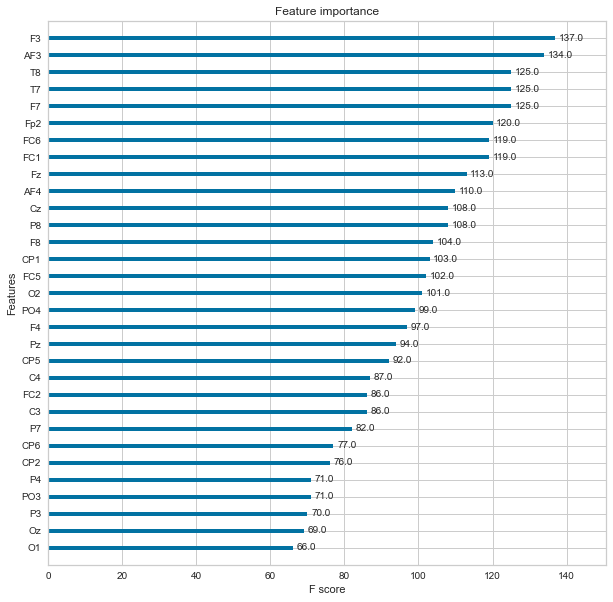

In [49]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

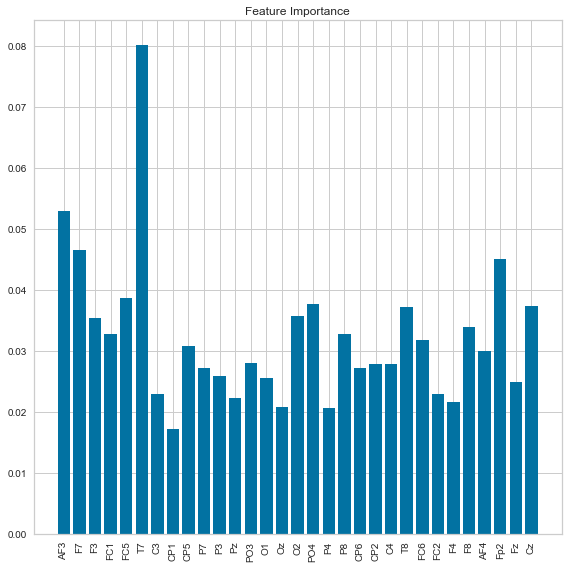

In [50]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(8,8))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

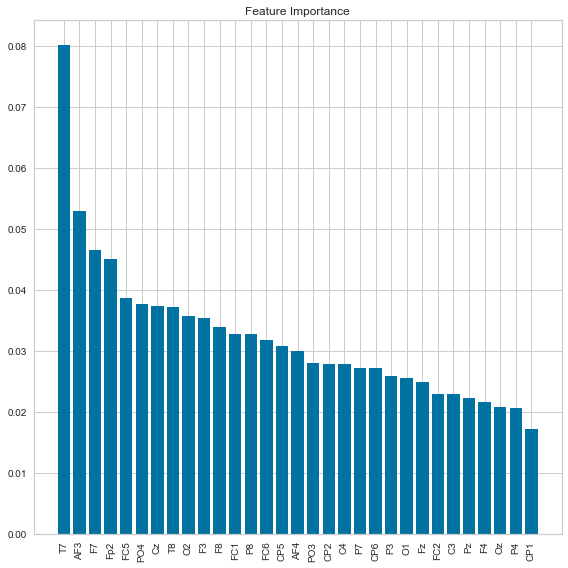

In [51]:
fig, ax = plt.subplots(figsize=(8,8))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [52]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.05287127, 0.04651244, 0.03531378, 0.03274605,
       0.0386405 , 0.08010002, 0.02283928, 0.01718285, 0.03081005,
       0.02712072, 0.02582615, 0.02225175, 0.02794059, 0.02546119,
       0.02083047, 0.03567383, 0.03766922, 0.02064402, 0.03266246,
       0.02711313, 0.0277925 , 0.02777264, 0.03720219, 0.03176364,
       0.02292728, 0.02153913, 0.03381029, 0.0298674 , 0.04495557,
       0.02480997, 0.03734959])

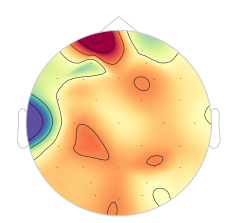

(<matplotlib.image.AxesImage at 0x266344c0460>,
 <matplotlib.contour.QuadContourSet at 0x266344c0220>)

In [53]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>3. Petrosian</h2>

In [54]:
petrosian_pd['Y'] = 1
petrosian['Y'] = 0

In [55]:
X1 = petrosian.append(petrosian_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.008246,1.007155,1.007883,1.007883,1.006546,1.006546,1.007155,1.007883,1.006911,1.007398,...,1.007033,1.006302,1.006911,1.007033,1.008125,1.007640,1.007761,1.006911,1.007155,0
1,1.007519,1.007276,1.007640,1.007033,1.006911,1.006790,1.006668,1.007519,1.006790,1.007155,...,1.007033,1.007033,1.006546,1.006546,1.007519,1.007033,1.007033,1.006790,1.006668,0
2,1.008125,1.007398,1.006790,1.007033,1.007640,1.007155,1.005692,1.006546,1.006546,1.007398,...,1.007519,1.007640,1.006790,1.007033,1.007640,1.006424,1.006790,1.006546,1.006911,0
3,1.007883,1.007033,1.006424,1.007276,1.007276,1.006424,1.005936,1.006911,1.006424,1.006546,...,1.007761,1.007276,1.006790,1.007398,1.007883,1.006424,1.006790,1.006546,1.006790,0
4,1.007519,1.007155,1.007640,1.007033,1.006302,1.007155,1.007640,1.006668,1.005570,1.005325,...,1.008367,1.007398,1.006058,1.007640,1.007883,1.007155,1.007276,1.006546,1.006302,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.007761,1.008246,1.008488,1.007761,1.007155,1.007276,1.006058,1.005692,1.006302,1.006302,...,1.006180,1.006302,1.007398,1.008850,1.006911,1.008367,1.008125,1.008125,1.006546,1
5976,1.007155,1.008246,1.008609,1.008125,1.005570,1.007276,1.004466,1.005447,1.006058,1.004712,...,1.005325,1.005325,1.006546,1.008246,1.006424,1.008488,1.008125,1.007519,1.005936,1
5977,1.007640,1.008367,1.007640,1.008246,1.006546,1.006302,1.005325,1.005202,1.006668,1.003974,...,1.004957,1.005080,1.006180,1.008246,1.006911,1.008004,1.007276,1.007519,1.004957,1
5978,1.008246,1.008488,1.007761,1.008850,1.006911,1.007276,1.006668,1.006058,1.007155,1.005080,...,1.005202,1.005325,1.006058,1.007398,1.007519,1.007761,1.007761,1.007276,1.005325,1


<h2>Pycaret</h2>

In [56]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,7596
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [57]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9121,0.9691,0.9375,0.8905,0.9133,0.8242,0.8256,0.0293
xgboost,Extreme Gradient Boosting,0.9106,0.9685,0.9098,0.9095,0.9093,0.8212,0.8218,0.0913
lightgbm,Light Gradient Boosting Machine,0.9070,0.9688,0.9045,0.9071,0.9056,0.8141,0.8144,0.0240
et,Extra Trees Classifier,0.9004,0.9617,0.8754,0.9188,0.8963,0.8005,0.8018,0.0833
qda,Quadratic Discriminant Analysis,0.8992,0.9657,0.8875,0.9065,0.8965,0.7982,0.7990,0.0053
rf,Random Forest Classifier,0.8927,0.9574,0.8715,0.9076,0.8889,0.7853,0.7863,0.1067
gbc,Gradient Boosting Classifier,0.8652,0.9401,0.8550,0.8696,0.8619,0.7303,0.7310,0.1273
lda,Linear Discriminant Analysis,0.7974,0.8726,0.7824,0.8019,0.7918,0.5945,0.5950,0.0047
ada,Ada Boost Classifier,0.7890,0.8722,0.7862,0.7860,0.7857,0.5779,0.5785,0.0400
dt,Decision Tree Classifier,0.7701,0.7701,0.7707,0.7660,0.7678,0.5402,0.5410,0.0087


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [58]:
knn = create_model('knn', n_neighbors=5, leaf_size=30, p=2, weights='uniform', metric='minkowski', algorithm='auto', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9104,0.9558,0.9493,0.8792,0.9129,0.8209,0.8235
1,0.9176,0.9765,0.9275,0.9078,0.9176,0.8351,0.8353
2,0.9319,0.9747,0.9493,0.9161,0.9324,0.8638,0.8644
3,0.9247,0.9732,0.9638,0.8926,0.9268,0.8496,0.8522
4,0.8889,0.9602,0.9275,0.8591,0.8920,0.7779,0.7804
5,0.8925,0.9625,0.9275,0.8649,0.8951,0.7851,0.7871
6,0.9211,0.9667,0.9275,0.9143,0.9209,0.8423,0.8424
7,0.9283,0.9754,0.9493,0.9097,0.9291,0.8567,0.8575
8,0.8746,0.9606,0.9124,0.8446,0.8772,0.7494,0.7517


<h3>KNN gives highest - 91.17% for k=5</h3>

In [59]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [60]:
#X = X1.iloc[:, :-1]
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,1.007155,1.007883,1.007883,1.006546,1.006546,1.007155,1.007883,1.006911,1.007398,1.007155,...,1.006058,1.007033,1.006302,1.006911,1.007033,1.008125,1.007640,1.007761,1.006911,1.007155
1,1.007276,1.007640,1.007033,1.006911,1.006790,1.006668,1.007519,1.006790,1.007155,1.007640,...,1.006546,1.007033,1.007033,1.006546,1.006546,1.007519,1.007033,1.007033,1.006790,1.006668
2,1.007398,1.006790,1.007033,1.007640,1.007155,1.005692,1.006546,1.006546,1.007398,1.007155,...,1.007033,1.007519,1.007640,1.006790,1.007033,1.007640,1.006424,1.006790,1.006546,1.006911
3,1.007033,1.006424,1.007276,1.007276,1.006424,1.005936,1.006911,1.006424,1.006546,1.006058,...,1.006546,1.007761,1.007276,1.006790,1.007398,1.007883,1.006424,1.006790,1.006546,1.006790
4,1.007155,1.007640,1.007033,1.006302,1.007155,1.007640,1.006668,1.005570,1.005325,1.006302,...,1.007155,1.008367,1.007398,1.006058,1.007640,1.007883,1.007155,1.007276,1.006546,1.006302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.008246,1.008488,1.007761,1.007155,1.007276,1.006058,1.005692,1.006302,1.006302,1.006668,...,1.004834,1.006180,1.006302,1.007398,1.008850,1.006911,1.008367,1.008125,1.008125,1.006546
5976,1.008246,1.008609,1.008125,1.005570,1.007276,1.004466,1.005447,1.006058,1.004712,1.005692,...,1.005570,1.005325,1.005325,1.006546,1.008246,1.006424,1.008488,1.008125,1.007519,1.005936
5977,1.008367,1.007640,1.008246,1.006546,1.006302,1.005325,1.005202,1.006668,1.003974,1.004834,...,1.005692,1.004957,1.005080,1.006180,1.008246,1.006911,1.008004,1.007276,1.007519,1.004957
5978,1.008488,1.007761,1.008850,1.006911,1.007276,1.006668,1.006058,1.007155,1.005080,1.004834,...,1.004834,1.005202,1.005325,1.006058,1.007398,1.007519,1.007761,1.007761,1.007276,1.005325


In [61]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5975    1
5976    1
5977    1
5978    1
5979    1
Name: Y, Length: 5980, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [63]:
y_train

2683    0
4285    1
4014    1
5765    1
1019    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4006, dtype: int64

In [64]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
2683,1.005447,1.005814,1.007519,1.005325,1.005692,1.006911,1.007155,1.004834,1.006180,1.006302,...,1.006180,1.007033,1.006790,1.005570,1.006058,1.006546,1.007761,1.005570,1.003851,1.005692
4285,1.007519,1.007640,1.008125,1.007519,1.008125,1.007640,1.007155,1.007761,1.007519,1.006302,...,1.006302,1.008246,1.007155,1.006668,1.007640,1.007883,1.007761,1.007761,1.007519,1.007519
4014,1.008850,1.007640,1.007883,1.006911,1.008246,1.006911,1.005936,1.006058,1.005447,1.007155,...,1.006302,1.007155,1.007519,1.007276,1.009332,1.007640,1.008004,1.007883,1.006302,1.005814
5765,1.007276,1.006790,1.006790,1.006911,1.007033,1.004466,1.007155,1.007155,1.006546,1.005447,...,1.006180,1.007398,1.005692,1.006668,1.007761,1.006546,1.008488,1.008125,1.007033,1.006180
1019,1.008850,1.008004,1.008971,1.007761,1.008488,1.008004,1.008246,1.006911,1.007519,1.007883,...,1.007276,1.008971,1.006668,1.008367,1.008367,1.007761,1.008246,1.007398,1.007519,1.007276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,1.006911,1.006911,1.007155,1.006668,1.006180,1.007155,1.007519,1.006302,1.006668,1.006911,...,1.005570,1.005570,1.006180,1.006424,1.007398,1.006911,1.007761,1.006790,1.006180,1.006180
4060,1.008004,1.006668,1.008246,1.005936,1.009332,1.007155,1.006058,1.005325,1.005936,1.006911,...,1.006668,1.007033,1.008125,1.007276,1.008729,1.008004,1.007883,1.008971,1.005080,1.006058
1346,1.008850,1.008004,1.007519,1.006668,1.007398,1.007398,1.007155,1.005325,1.005814,1.006058,...,1.005936,1.008125,1.006424,1.006180,1.006911,1.007640,1.007033,1.007398,1.005814,1.006424
3454,1.006911,1.007398,1.006546,1.006911,1.005814,1.006546,1.006302,1.006911,1.006180,1.007640,...,1.006058,1.006180,1.006180,1.005814,1.006668,1.006668,1.007640,1.006668,1.006790,1.005325


In [65]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9062816616008106


<h2>XGBoost</h2>

In [66]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.26%


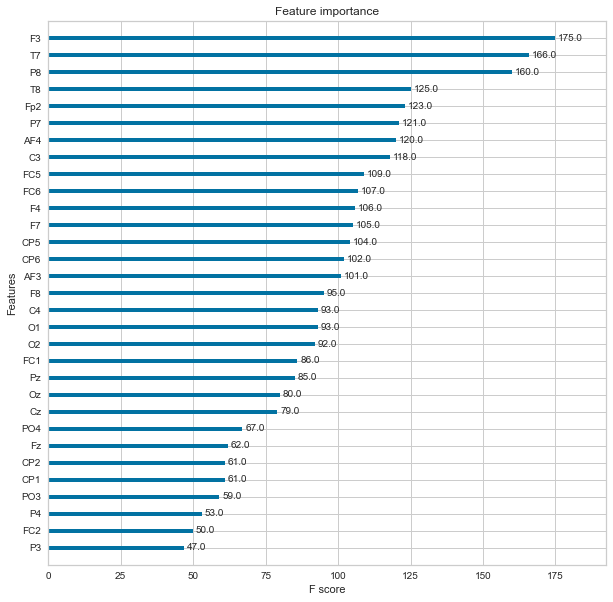

In [67]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

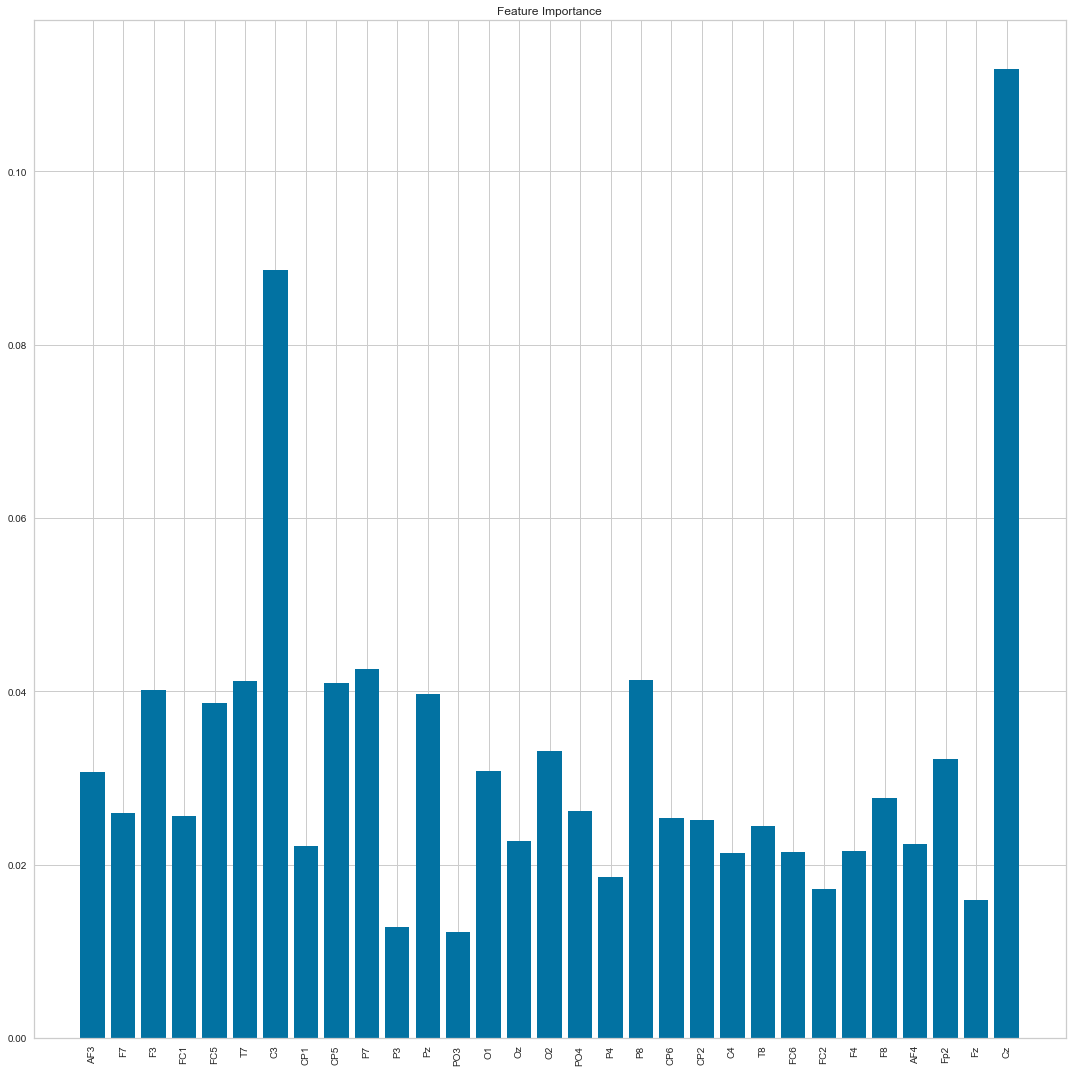

In [68]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

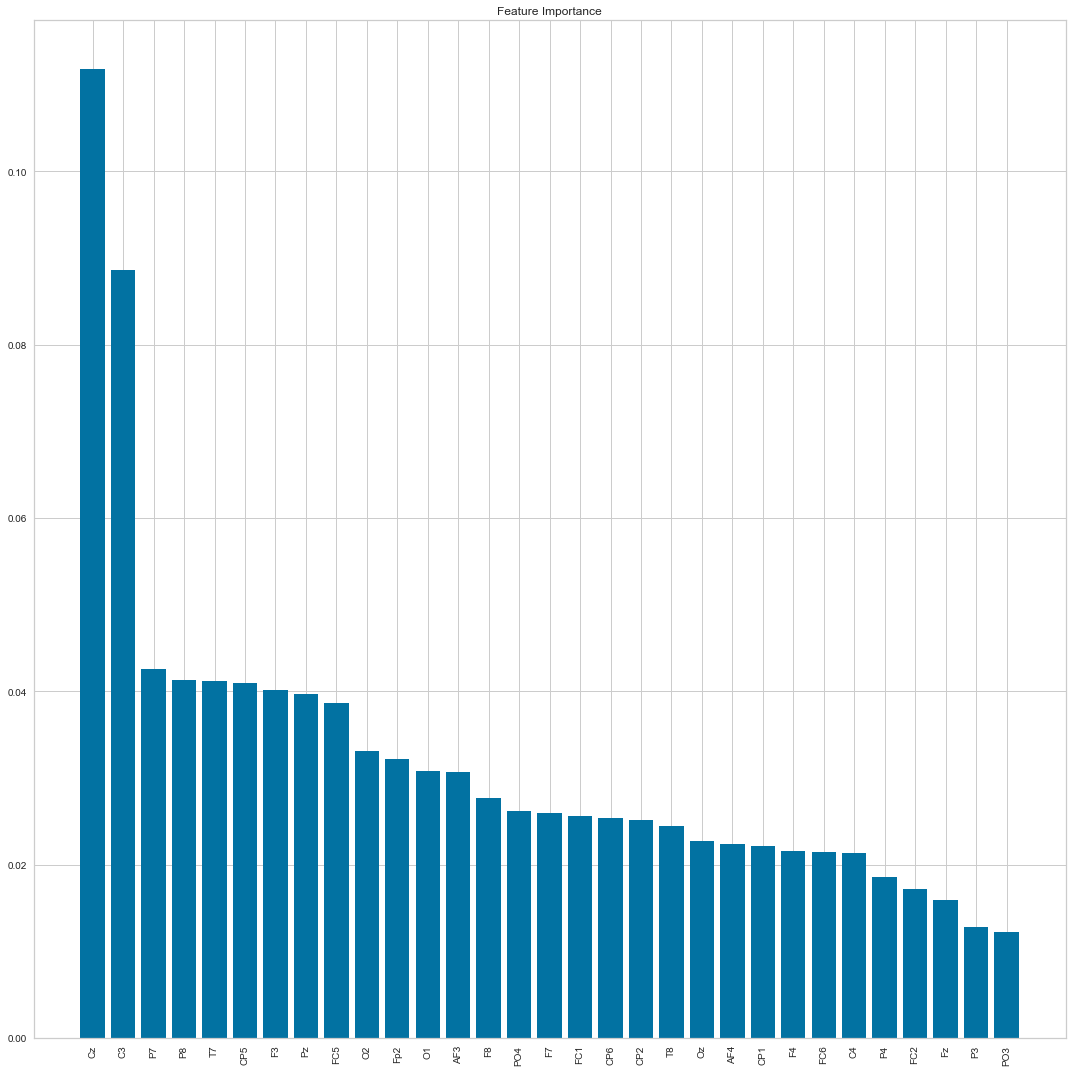

In [69]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [70]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03065916, 0.02589658, 0.0401113 , 0.02562922,
       0.03861147, 0.04117256, 0.0886152 , 0.02217376, 0.04094938,
       0.04258035, 0.01274941, 0.03968153, 0.0121693 , 0.03084185,
       0.02267724, 0.03307092, 0.02618404, 0.01853821, 0.04132652,
       0.02534982, 0.02513743, 0.02133484, 0.02443741, 0.02147579,
       0.01718523, 0.021594  , 0.02763239, 0.02236732, 0.03213364,
       0.01589207, 0.11182211])

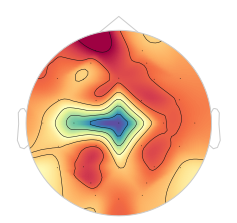

(<matplotlib.image.AxesImage at 0x266348868b0>,
 <matplotlib.contour.QuadContourSet at 0x26634886b50>)

In [71]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>4. Spectral Entropy</h2>

In [72]:
spec_ent_pd['Y'] = 1
spec_ent['Y'] = 0

In [73]:
X1 = spec_ent.append(spec_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.593967,0.601235,0.498436,0.591953,0.563955,0.563122,0.553224,0.494111,0.429831,0.587258,...,0.613855,0.556259,0.371323,0.439225,0.494452,0.552718,0.523264,0.560992,0.543731,0
1,0.585720,0.576237,0.524875,0.574399,0.546275,0.558093,0.517189,0.554932,0.556446,0.602096,...,0.583725,0.546290,0.556225,0.456143,0.511603,0.520877,0.540161,0.575035,0.575193,0
2,0.565498,0.590731,0.499751,0.576042,0.554548,0.521498,0.536025,0.548781,0.526389,0.567170,...,0.579970,0.595283,0.552707,0.486873,0.578784,0.490966,0.544766,0.467088,0.481327,0
3,0.576343,0.553508,0.317454,0.443256,0.549690,0.534552,0.551327,0.367509,0.518702,0.517488,...,0.595044,0.565175,0.475630,0.543204,0.565701,0.582231,0.598716,0.517816,0.487931,0
4,0.564918,0.590362,0.286799,0.356163,0.574863,0.449226,0.526011,0.355215,0.416370,0.547122,...,0.598434,0.489233,0.326823,0.545404,0.595191,0.590936,0.538593,0.540984,0.582147,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.579022,0.619155,0.514105,0.527048,0.549363,0.548905,0.468314,0.508872,0.518050,0.472023,...,0.452884,0.498117,0.566189,0.598671,0.555914,0.596041,0.538529,0.560941,0.534664,1
5976,0.578436,0.620483,0.502764,0.588395,0.560323,0.492717,0.401778,0.493195,0.544065,0.387379,...,0.349181,0.402871,0.553467,0.608148,0.426741,0.596415,0.594515,0.577691,0.544164,1
5977,0.574628,0.569948,0.469814,0.597366,0.544412,0.434326,0.375373,0.448755,0.507916,0.363619,...,0.403815,0.440415,0.536981,0.613230,0.447863,0.607799,0.612429,0.586374,0.530359,1
5978,0.578425,0.615063,0.509094,0.610517,0.562988,0.533909,0.413233,0.515796,0.546268,0.439316,...,0.395448,0.384694,0.561778,0.591243,0.399091,0.588572,0.604465,0.565367,0.522910,1


In [74]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,7704
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [75]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8882,0.9554,0.8933,0.8864,0.8895,0.7763,0.7769,0.0680
xgboost,Extreme Gradient Boosting,0.8810,0.9543,0.8891,0.8772,0.8826,0.7620,0.7629,0.3240
et,Extra Trees Classifier,0.8767,0.9482,0.8701,0.8844,0.8768,0.7534,0.7542,0.0980
rf,Random Forest Classifier,0.8652,0.9428,0.8554,0.8752,0.8647,0.7305,0.7314,0.1667
knn,K Neighbors Classifier,0.8583,0.9283,0.9336,0.8135,0.8692,0.7163,0.7248,0.0300
qda,Quadratic Discriminant Analysis,0.8528,0.9324,0.8871,0.8330,0.8589,0.7054,0.7075,0.0060
gbc,Gradient Boosting Classifier,0.8339,0.9131,0.8549,0.8230,0.8382,0.6677,0.6692,0.3440
ada,Ada Boost Classifier,0.7486,0.8300,0.7586,0.7467,0.7523,0.4971,0.4977,0.1047
dt,Decision Tree Classifier,0.7412,0.7412,0.7411,0.7454,0.7424,0.4824,0.4836,0.0153
lda,Linear Discriminant Analysis,0.7341,0.8143,0.7416,0.7338,0.7373,0.4680,0.4686,0.0073


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=7704, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [76]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [77]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.601235,0.498436,0.591953,0.563955,0.563122,0.553224,0.494111,0.429831,0.587258,0.571492,...,0.577837,0.613855,0.556259,0.371323,0.439225,0.494452,0.552718,0.523264,0.560992,0.543731
1,0.576237,0.524875,0.574399,0.546275,0.558093,0.517189,0.554932,0.556446,0.602096,0.570408,...,0.567459,0.583725,0.546290,0.556225,0.456143,0.511603,0.520877,0.540161,0.575035,0.575193
2,0.590731,0.499751,0.576042,0.554548,0.521498,0.536025,0.548781,0.526389,0.567170,0.518985,...,0.596694,0.579970,0.595283,0.552707,0.486873,0.578784,0.490966,0.544766,0.467088,0.481327
3,0.553508,0.317454,0.443256,0.549690,0.534552,0.551327,0.367509,0.518702,0.517488,0.506391,...,0.587771,0.595044,0.565175,0.475630,0.543204,0.565701,0.582231,0.598716,0.517816,0.487931
4,0.590362,0.286799,0.356163,0.574863,0.449226,0.526011,0.355215,0.416370,0.547122,0.571079,...,0.568154,0.598434,0.489233,0.326823,0.545404,0.595191,0.590936,0.538593,0.540984,0.582147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.619155,0.514105,0.527048,0.549363,0.548905,0.468314,0.508872,0.518050,0.472023,0.491728,...,0.458255,0.452884,0.498117,0.566189,0.598671,0.555914,0.596041,0.538529,0.560941,0.534664
5976,0.620483,0.502764,0.588395,0.560323,0.492717,0.401778,0.493195,0.544065,0.387379,0.401234,...,0.425625,0.349181,0.402871,0.553467,0.608148,0.426741,0.596415,0.594515,0.577691,0.544164
5977,0.569948,0.469814,0.597366,0.544412,0.434326,0.375373,0.448755,0.507916,0.363619,0.377236,...,0.476381,0.403815,0.440415,0.536981,0.613230,0.447863,0.607799,0.612429,0.586374,0.530359
5978,0.615063,0.509094,0.610517,0.562988,0.533909,0.413233,0.515796,0.546268,0.439316,0.405949,...,0.457306,0.395448,0.384694,0.561778,0.591243,0.399091,0.588572,0.604465,0.565367,0.522910


In [78]:
Y = X3['Y']
Y

0       0
1       0
2       0
3       0
4       0
       ..
5975    1
5976    1
5977    1
5978    1
5979    1
Name: Y, Length: 5980, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [80]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
2683,0.401272,0.381292,0.504067,0.451519,0.414855,0.462944,0.506723,0.369926,0.465629,0.514004,...,0.509221,0.557477,0.510185,0.477237,0.484010,0.465335,0.475649,0.414058,0.419203,0.506728
4285,0.547937,0.606426,0.620034,0.603495,0.551184,0.578733,0.582216,0.580131,0.602483,0.576108,...,0.469909,0.534608,0.498105,0.508221,0.496572,0.540016,0.627873,0.560022,0.534319,0.572017
4014,0.497664,0.555392,0.587266,0.548580,0.565293,0.547959,0.525726,0.521883,0.506766,0.543041,...,0.548044,0.577577,0.616073,0.574090,0.598610,0.615496,0.566584,0.442644,0.501844,0.547401
5765,0.599469,0.595332,0.591964,0.478211,0.534791,0.456904,0.515802,0.447646,0.402703,0.468374,...,0.533068,0.532744,0.501412,0.563053,0.578157,0.584124,0.616011,0.576802,0.579798,0.514092
1019,0.619676,0.592616,0.620218,0.626528,0.576730,0.586083,0.628734,0.622948,0.549985,0.553463,...,0.608518,0.623083,0.609737,0.597723,0.616630,0.600239,0.592341,0.583506,0.628725,0.627766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.536974,0.559417,0.545114,0.496239,0.557786,0.583845,0.580774,0.555905,0.537537,0.554771,...,0.537771,0.498893,0.506853,0.524456,0.583632,0.537488,0.548718,0.598828,0.469537,0.507544
4060,0.510334,0.548357,0.615102,0.504380,0.602536,0.549032,0.526155,0.514566,0.537378,0.562106,...,0.563672,0.514687,0.570492,0.531343,0.619650,0.519040,0.562483,0.415986,0.503113,0.503320
1346,0.616818,0.611292,0.582492,0.507724,0.478533,0.564068,0.539531,0.452845,0.495336,0.499152,...,0.463312,0.586559,0.496744,0.432513,0.492002,0.556707,0.536030,0.543073,0.475427,0.532143
3454,0.520474,0.486104,0.515426,0.531917,0.434514,0.402348,0.416053,0.524576,0.392239,0.460283,...,0.469122,0.474192,0.452137,0.469481,0.485956,0.499496,0.549681,0.459622,0.470768,0.476114


In [81]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.25%


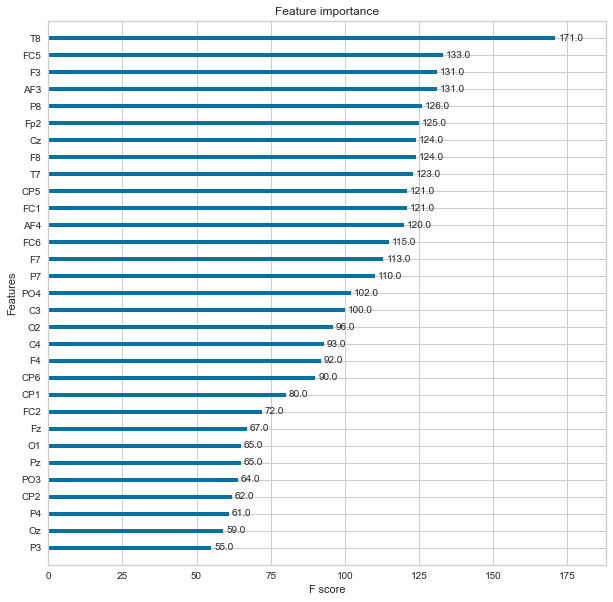

In [82]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

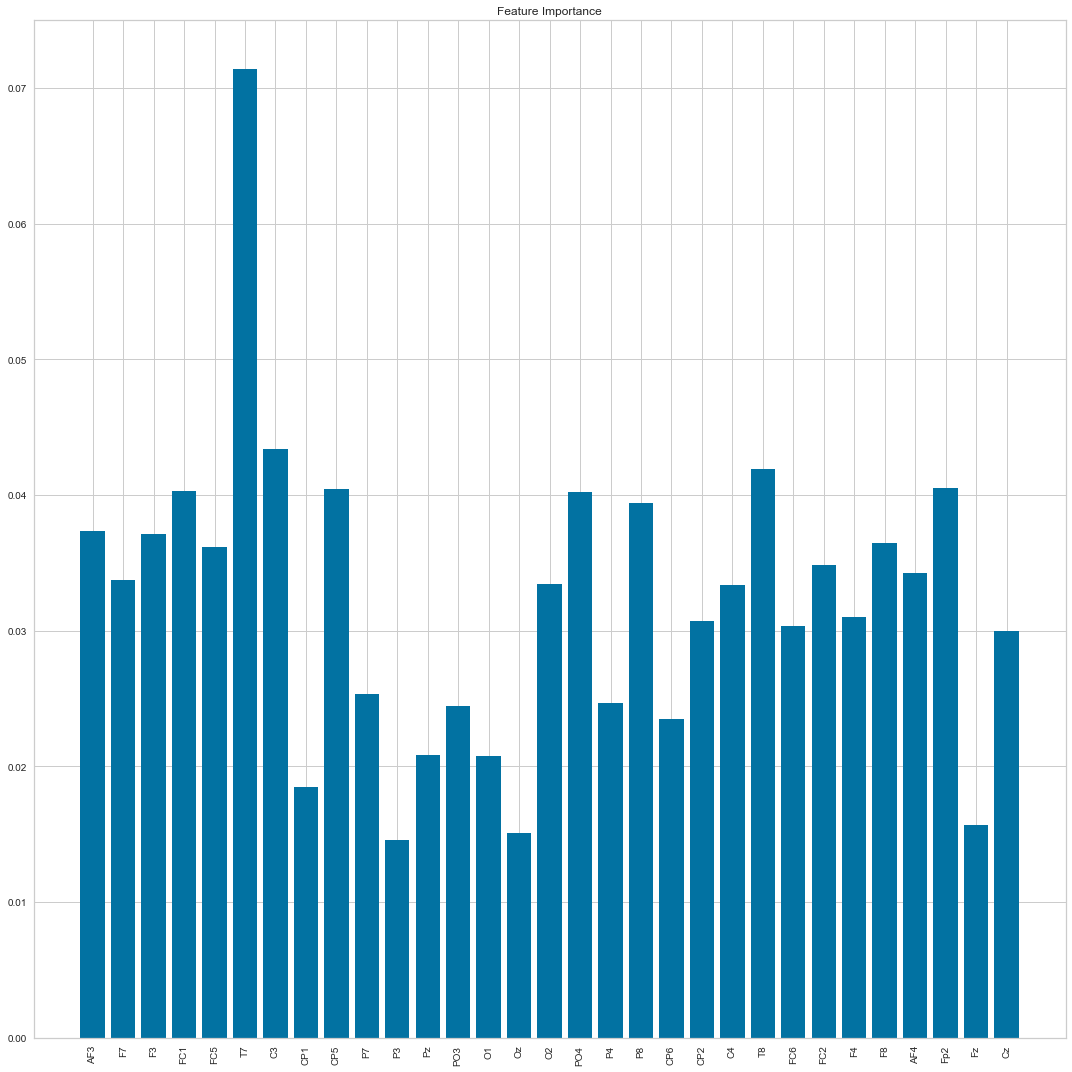

In [83]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

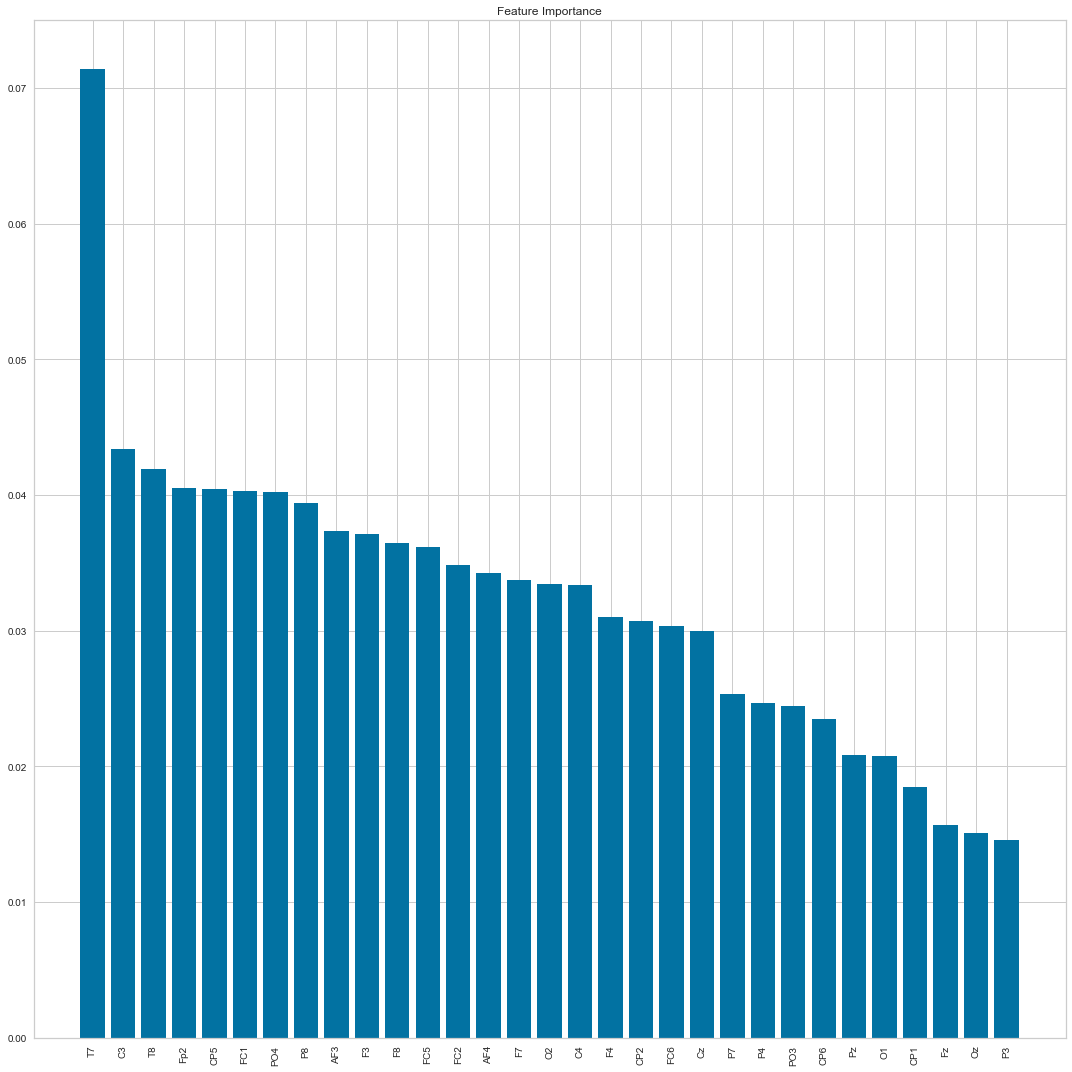

In [84]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [85]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03732391, 0.03374774, 0.03714644, 0.04029494,
       0.03615123, 0.07141991, 0.04343268, 0.01845398, 0.04047174,
       0.02535238, 0.01460473, 0.02085474, 0.02447736, 0.02077219,
       0.01506607, 0.03348443, 0.04021711, 0.02468492, 0.03940879,
       0.02346907, 0.0307539 , 0.03336903, 0.0419223 , 0.03035652,
       0.03484789, 0.0309849 , 0.03645405, 0.0342968 , 0.04055154,
       0.01566881, 0.02995979])

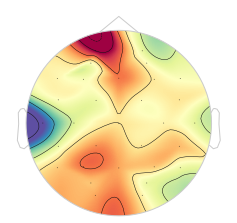

(<matplotlib.image.AxesImage at 0x2663c5f48e0>,
 <matplotlib.contour.QuadContourSet at 0x2663c5f4b80>)

In [86]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>5. Permutation Entropy</h2>

In [87]:
perm_ent_pd['Y'] = 1
perm_ent['Y'] = 0

In [88]:
X1 = perm_ent.append(perm_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.653851,0.627360,0.645523,0.643488,0.609878,0.612827,0.627862,0.645651,0.619856,0.633039,...,0.624846,0.604807,0.621454,0.622621,0.651042,0.638345,0.642443,0.622322,0.627119,0
1,0.636773,0.630397,0.640150,0.620432,0.620282,0.618821,0.612595,0.635482,0.619260,0.627979,...,0.624725,0.624226,0.611212,0.612870,0.632692,0.623220,0.623103,0.618255,0.616132,0
2,0.650269,0.634148,0.619182,0.623764,0.639240,0.627596,0.587797,0.611964,0.611437,0.634109,...,0.636615,0.639352,0.618837,0.624552,0.638702,0.610018,0.614066,0.612132,0.618793,0
3,0.643998,0.624737,0.604815,0.630758,0.629598,0.609694,0.593551,0.622099,0.606516,0.612005,...,0.643080,0.630638,0.619062,0.633707,0.645297,0.607154,0.618832,0.612099,0.615013,0
4,0.634471,0.628013,0.632262,0.622604,0.605145,0.627391,0.637187,0.614432,0.587053,0.580424,...,0.656687,0.633841,0.600291,0.637264,0.645916,0.625321,0.631233,0.612444,0.604510,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.641642,0.653240,0.656833,0.643148,0.622713,0.630715,0.598658,0.590400,0.606423,0.605406,...,0.603633,0.606704,0.632558,0.667135,0.621082,0.657282,0.649930,0.650349,0.612011,1
5976,0.625031,0.653687,0.660426,0.649094,0.584173,0.630188,0.556218,0.583294,0.598801,0.561716,...,0.580815,0.578565,0.612621,0.648121,0.608748,0.660089,0.648760,0.634831,0.595976,1
5977,0.639758,0.657143,0.639118,0.652994,0.612213,0.605972,0.580631,0.573291,0.615182,0.539179,...,0.567341,0.571026,0.602471,0.650400,0.620282,0.647883,0.630685,0.637239,0.568733,1
5978,0.654539,0.657716,0.640298,0.667401,0.621164,0.629693,0.616141,0.597222,0.627668,0.572444,...,0.573868,0.578549,0.599419,0.634032,0.633820,0.639471,0.642125,0.631370,0.579699,1


In [89]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,6147
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [90]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9118,0.9684,0.9405,0.8906,0.9147,0.8236,0.8254,0.0287
xgboost,Extreme Gradient Boosting,0.9042,0.9674,0.9020,0.9076,0.9044,0.8084,0.8091,0.2933
lightgbm,Light Gradient Boosting Machine,0.9013,0.9664,0.8982,0.9056,0.9014,0.8026,0.8035,0.0687
qda,Quadratic Discriminant Analysis,0.8965,0.9627,0.8801,0.9111,0.8952,0.7931,0.7938,0.0047
et,Extra Trees Classifier,0.8896,0.9581,0.8669,0.9102,0.8875,0.7793,0.7810,0.0920
rf,Random Forest Classifier,0.8848,0.9523,0.8625,0.9045,0.8826,0.7697,0.7711,0.1560
gbc,Gradient Boosting Classifier,0.8616,0.9369,0.8587,0.8662,0.8619,0.7233,0.7242,0.3133
lda,Linear Discriminant Analysis,0.7873,0.8677,0.7789,0.7948,0.7864,0.5747,0.5753,0.0060
ada,Ada Boost Classifier,0.7828,0.8650,0.7860,0.7834,0.7842,0.5656,0.5663,0.0800
dt,Decision Tree Classifier,0.7656,0.7656,0.7727,0.7642,0.7680,0.5311,0.5319,0.0140


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [92]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.627360,0.645523,0.643488,0.609878,0.612827,0.627862,0.645651,0.619856,0.633039,0.626956,...,0.599637,0.624846,0.604807,0.621454,0.622621,0.651042,0.638345,0.642443,0.622322,0.627119
1,0.630397,0.640150,0.620432,0.620282,0.618821,0.612595,0.635482,0.619260,0.627979,0.639665,...,0.612615,0.624725,0.624226,0.611212,0.612870,0.632692,0.623220,0.623103,0.618255,0.616132
2,0.634148,0.619182,0.623764,0.639240,0.627596,0.587797,0.611964,0.611437,0.634109,0.628088,...,0.625029,0.636615,0.639352,0.618837,0.624552,0.638702,0.610018,0.614066,0.612132,0.618793
3,0.624737,0.604815,0.630758,0.629598,0.609694,0.593551,0.622099,0.606516,0.612005,0.599959,...,0.613104,0.643080,0.630638,0.619062,0.633707,0.645297,0.607154,0.618832,0.612099,0.615013
4,0.628013,0.632262,0.622604,0.605145,0.627391,0.637187,0.614432,0.587053,0.580424,0.605392,...,0.626856,0.656687,0.633841,0.600291,0.637264,0.645916,0.625321,0.631233,0.612444,0.604510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.653240,0.656833,0.643148,0.622713,0.630715,0.598658,0.590400,0.606423,0.605406,0.613441,...,0.566683,0.603633,0.606704,0.632558,0.667135,0.621082,0.657282,0.649930,0.650349,0.612011
5976,0.653687,0.660426,0.649094,0.584173,0.630188,0.556218,0.583294,0.598801,0.561716,0.589218,...,0.587213,0.580815,0.578565,0.612621,0.648121,0.608748,0.660089,0.648760,0.634831,0.595976
5977,0.657143,0.639118,0.652994,0.612213,0.605972,0.580631,0.573291,0.615182,0.539179,0.566441,...,0.586949,0.567341,0.571026,0.602471,0.650400,0.620282,0.647883,0.630685,0.637239,0.568733
5978,0.657716,0.640298,0.667401,0.621164,0.629693,0.616141,0.597222,0.627668,0.572444,0.565582,...,0.566621,0.573868,0.578549,0.599419,0.634032,0.633820,0.639471,0.642125,0.631370,0.579699


In [93]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5975    1
5976    1
5977    1
5978    1
5979    1
Name: Y, Length: 5980, dtype: int64

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [95]:
y_train

2683    0
4285    1
4014    1
5765    1
1019    0
       ..
5218    1
4060    1
1346    0
3454    1
3582    1
Name: Y, Length: 4006, dtype: int64

In [96]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
2683,0.580002,0.593434,0.637312,0.579530,0.590782,0.620330,0.628240,0.566537,0.601135,0.606295,...,0.600410,0.623757,0.617905,0.584585,0.600053,0.611131,0.642810,0.586213,0.536882,0.589958
4285,0.636612,0.638858,0.651594,0.636878,0.650891,0.640223,0.623414,0.642943,0.634123,0.605638,...,0.606598,0.650043,0.628051,0.615339,0.639939,0.643696,0.642521,0.641904,0.634123,0.636127
4014,0.667025,0.638673,0.644397,0.620889,0.653961,0.620787,0.596910,0.600376,0.582925,0.627446,...,0.605128,0.628205,0.636203,0.629897,0.679175,0.639260,0.646621,0.643667,0.605192,0.593500
5765,0.628726,0.617098,0.618858,0.622031,0.624524,0.554180,0.627142,0.626667,0.612659,0.579881,...,0.602647,0.633780,0.590301,0.616294,0.641944,0.611014,0.659393,0.650213,0.624638,0.603343
1019,0.665159,0.647745,0.670415,0.642384,0.659624,0.648354,0.650439,0.621873,0.636571,0.642119,...,0.631345,0.670016,0.615233,0.656898,0.655693,0.642682,0.652832,0.632979,0.636936,0.626310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.618921,0.621430,0.625037,0.616074,0.602301,0.627968,0.635378,0.604947,0.616141,0.620036,...,0.586121,0.586073,0.603343,0.608369,0.633039,0.621400,0.642698,0.618744,0.600614,0.602392
4060,0.647586,0.615642,0.652189,0.593808,0.677592,0.627209,0.600467,0.575146,0.594579,0.618554,...,0.614180,0.622463,0.651589,0.628971,0.664009,0.648314,0.645346,0.668785,0.571418,0.598487
1346,0.666119,0.646315,0.635902,0.611886,0.633695,0.632869,0.626284,0.576637,0.592681,0.599473,...,0.597110,0.650671,0.609918,0.603276,0.621227,0.633517,0.624026,0.634148,0.593709,0.608475
3454,0.620776,0.628819,0.609563,0.620299,0.592905,0.611627,0.605554,0.621072,0.602837,0.637075,...,0.592995,0.601150,0.603204,0.592377,0.615094,0.614340,0.638761,0.614100,0.617292,0.578424


<h2>KNN</h2>

In [97]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9047619047619048


<h2>XGBoost</h2>

In [98]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.98%


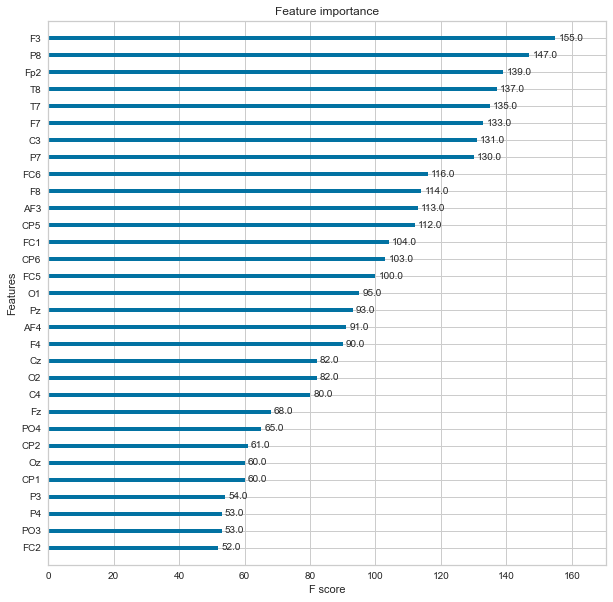

In [99]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

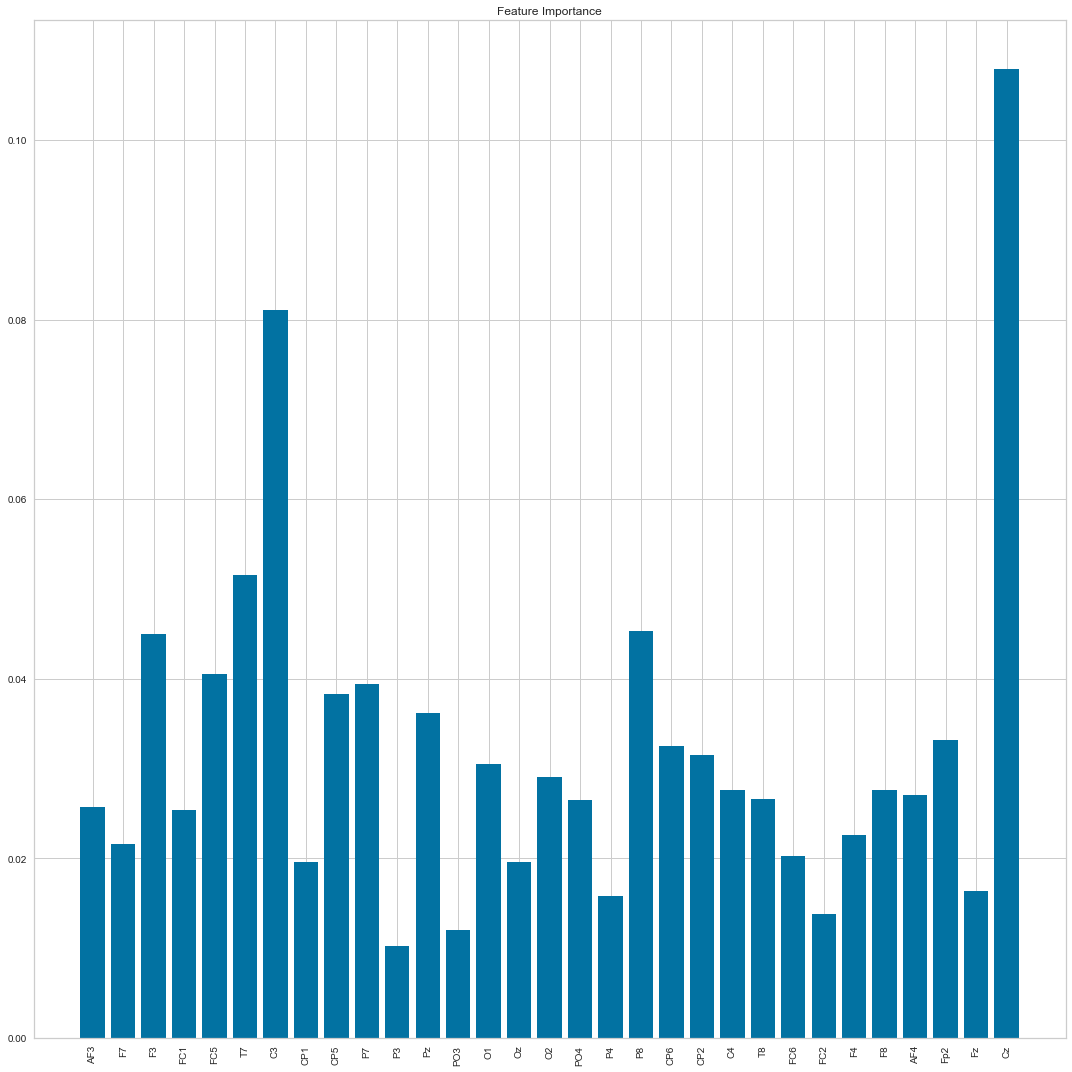

In [100]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

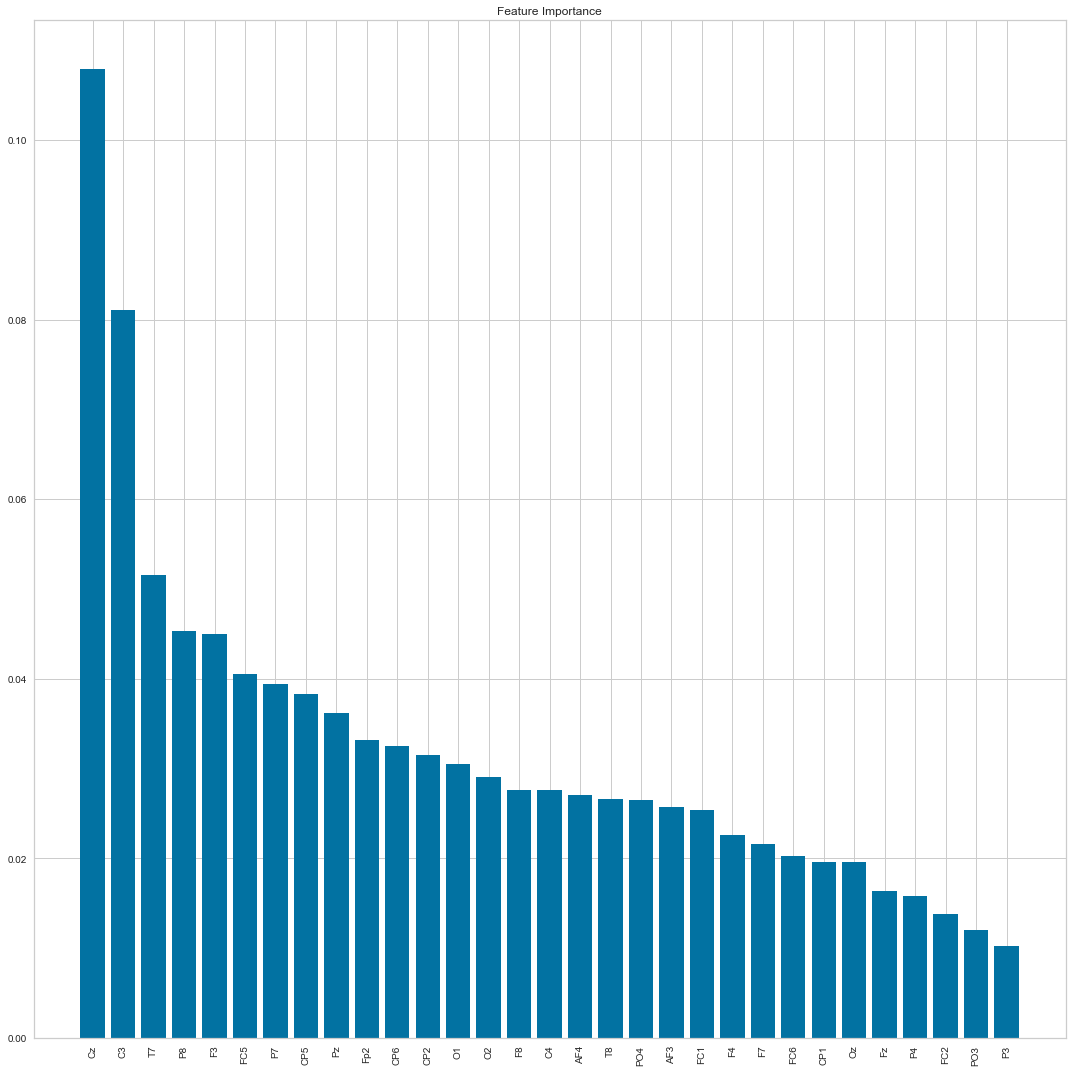

In [101]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [102]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.02574411, 0.02157617, 0.04492846, 0.02538135,
       0.04057099, 0.05152251, 0.08107187, 0.01955906, 0.03825863,
       0.03940271, 0.01023299, 0.03620036, 0.01197426, 0.03045605,
       0.01953357, 0.02904538, 0.02645746, 0.01579465, 0.04536603,
       0.03250858, 0.0315439 , 0.0276195 , 0.0265516 , 0.02022149,
       0.01375158, 0.02261281, 0.02762152, 0.02706717, 0.03318077,
       0.01632349, 0.10792094])

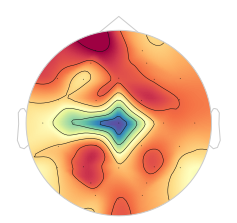

(<matplotlib.image.AxesImage at 0x2663c61a400>,
 <matplotlib.contour.QuadContourSet at 0x2663c61a1c0>)

In [103]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h1>6. Spectral value Decomposition Entropy</h1>

In [104]:
svd_ent_pd['Y'] = 1
svd_ent['Y'] = 0

In [105]:
X1 = svd_ent.append(svd_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.458908,0.434869,0.340702,0.386782,0.365884,0.406409,0.351328,0.261940,0.284195,0.438961,...,0.470504,0.379502,0.268096,0.302053,0.422935,0.424511,0.366348,0.368851,0.346873,0
1,0.411324,0.414599,0.380600,0.425593,0.406566,0.407422,0.380689,0.370346,0.360862,0.443841,...,0.456706,0.431810,0.323067,0.289243,0.421913,0.394608,0.394392,0.366379,0.388330,0
2,0.400829,0.379982,0.334224,0.415308,0.403070,0.358920,0.381000,0.286026,0.380852,0.426595,...,0.473060,0.419652,0.344523,0.316143,0.392976,0.342966,0.404395,0.325343,0.401927,0
3,0.439308,0.451048,0.157905,0.205591,0.415331,0.388264,0.395034,0.245785,0.365359,0.384823,...,0.469259,0.313625,0.331127,0.324850,0.411708,0.373565,0.461879,0.326678,0.374859,0
4,0.412547,0.489168,0.220988,0.203713,0.422089,0.371353,0.379650,0.290553,0.305548,0.394760,...,0.487639,0.278034,0.207001,0.331666,0.482274,0.469526,0.436674,0.376017,0.397347,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.499725,0.542344,0.436041,0.505840,0.455413,0.425951,0.346342,0.388166,0.411647,0.368402,...,0.349229,0.342105,0.414109,0.537445,0.398235,0.521217,0.515063,0.485239,0.389164,1
5976,0.482170,0.520211,0.401952,0.468836,0.384682,0.357654,0.303892,0.325739,0.397255,0.316141,...,0.325764,0.316727,0.418549,0.531156,0.328165,0.507715,0.509954,0.450108,0.370278,1
5977,0.486014,0.504007,0.393932,0.485188,0.392874,0.332091,0.253145,0.323631,0.376883,0.279891,...,0.295925,0.276916,0.422634,0.510558,0.310547,0.499113,0.527270,0.422053,0.358205,1
5978,0.491611,0.526479,0.404477,0.502012,0.377404,0.372338,0.244509,0.358203,0.389099,0.292597,...,0.261543,0.240473,0.387304,0.485774,0.307197,0.462659,0.541312,0.393329,0.362161,1


In [106]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,5173
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [107]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9797,0.9978,0.9818,0.9776,0.9796,0.9594,0.9595,0.0847
xgboost,Extreme Gradient Boosting,0.9771,0.9972,0.9823,0.9722,0.9771,0.9541,0.9544,0.2887
knn,K Neighbors Classifier,0.9756,0.9959,0.9885,0.9637,0.9759,0.9513,0.9517,0.0260
lightgbm,Light Gradient Boosting Machine,0.9747,0.9968,0.9775,0.9720,0.9747,0.9493,0.9495,0.0713
rf,Random Forest Classifier,0.9630,0.9951,0.9635,0.9623,0.9629,0.9259,0.9261,0.1660
qda,Quadratic Discriminant Analysis,0.9527,0.9881,0.9415,0.9628,0.9518,0.9054,0.9059,0.0040
gbc,Gradient Boosting Classifier,0.9348,0.9840,0.9516,0.9206,0.9357,0.8695,0.8703,0.3273
dt,Decision Tree Classifier,0.8839,0.8839,0.8863,0.8819,0.8838,0.7677,0.7683,0.0147
ada,Ada Boost Classifier,0.8686,0.9329,0.8911,0.8523,0.8711,0.7372,0.7383,0.0853
lda,Linear Discriminant Analysis,0.8337,0.9061,0.8451,0.8264,0.8352,0.6674,0.6683,0.0060


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=5173, verbose=0,
                     warm_start=False)

In [108]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9821,0.9959,1.0000,0.9653,0.9823,0.9642,0.9648
1,0.9677,0.9953,1.0000,0.9392,0.9686,0.9355,0.9375
2,0.9713,0.9945,0.9784,0.9645,0.9714,0.9427,0.9428
3,0.9642,0.9943,0.9856,0.9448,0.9648,0.9283,0.9292
4,0.9713,0.9941,0.9856,0.9580,0.9716,0.9427,0.9430
5,0.9821,0.9911,0.9856,0.9786,0.9821,0.9642,0.9642
6,0.9713,0.9939,0.9856,0.9580,0.9716,0.9427,0.9430
7,0.9821,0.9991,0.9784,0.9855,0.9819,0.9642,0.9642
8,0.9785,0.9985,0.9856,0.9716,0.9786,0.9570,0.9571


In [109]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9785,0.9959,1.0000,0.9586,0.9789,0.9570,0.9579
1,0.9642,0.9995,1.0000,0.9329,0.9653,0.9283,0.9307
2,0.9749,0.9944,0.9784,0.9714,0.9749,0.9498,0.9498
3,0.9606,0.9980,0.9784,0.9444,0.9611,0.9212,0.9217
4,0.9821,0.9944,0.9928,0.9718,0.9822,0.9642,0.9644
5,0.9821,0.9910,0.9856,0.9786,0.9821,0.9642,0.9642
6,0.9749,0.9942,0.9856,0.9648,0.9751,0.9498,0.9500
7,0.9749,0.9987,0.9784,0.9714,0.9749,0.9498,0.9498
8,0.9749,0.9986,0.9856,0.9648,0.9751,0.9498,0.9500


In [110]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [111]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=7, p=2,
                     weights='distance')


<h2> KNN giving 97.02% accuracy </h2>

In [112]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9642,0.9948,0.9784,0.9510,0.9645,0.9283,0.9287
1,0.9749,0.9975,0.9712,0.9783,0.9747,0.9498,0.9498
2,0.9749,0.9972,0.9712,0.9783,0.9747,0.9498,0.9498
3,0.9821,0.9973,0.9856,0.9786,0.9821,0.9642,0.9642
4,0.9821,0.9986,1.0000,0.9653,0.9823,0.9642,0.9648
5,0.9892,0.9958,0.9928,0.9857,0.9892,0.9785,0.9785
6,0.9785,0.9982,0.9784,0.9784,0.9784,0.9570,0.9570
7,0.9892,0.9998,0.9928,0.9857,0.9892,0.9785,0.9785
8,0.9749,0.9949,0.9928,0.9583,0.9753,0.9498,0.9504


In [113]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [114]:
X

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.434869,0.340702,0.386782,0.365884,0.406409,0.351328,0.261940,0.284195,0.438961,0.354649,...,0.435934,0.470504,0.379502,0.268096,0.302053,0.422935,0.424511,0.366348,0.368851,0.346873
1,0.414599,0.380600,0.425593,0.406566,0.407422,0.380689,0.370346,0.360862,0.443841,0.433118,...,0.430898,0.456706,0.431810,0.323067,0.289243,0.421913,0.394608,0.394392,0.366379,0.388330
2,0.379982,0.334224,0.415308,0.403070,0.358920,0.381000,0.286026,0.380852,0.426595,0.415097,...,0.439087,0.473060,0.419652,0.344523,0.316143,0.392976,0.342966,0.404395,0.325343,0.401927
3,0.451048,0.157905,0.205591,0.415331,0.388264,0.395034,0.245785,0.365359,0.384823,0.405134,...,0.420480,0.469259,0.313625,0.331127,0.324850,0.411708,0.373565,0.461879,0.326678,0.374859
4,0.489168,0.220988,0.203713,0.422089,0.371353,0.379650,0.290553,0.305548,0.394760,0.435556,...,0.442655,0.487639,0.278034,0.207001,0.331666,0.482274,0.469526,0.436674,0.376017,0.397347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.542344,0.436041,0.505840,0.455413,0.425951,0.346342,0.388166,0.411647,0.368402,0.368786,...,0.342382,0.349229,0.342105,0.414109,0.537445,0.398235,0.521217,0.515063,0.485239,0.389164
5976,0.520211,0.401952,0.468836,0.384682,0.357654,0.303892,0.325739,0.397255,0.316141,0.319411,...,0.346050,0.325764,0.316727,0.418549,0.531156,0.328165,0.507715,0.509954,0.450108,0.370278
5977,0.504007,0.393932,0.485188,0.392874,0.332091,0.253145,0.323631,0.376883,0.279891,0.269326,...,0.324953,0.295925,0.276916,0.422634,0.510558,0.310547,0.499113,0.527270,0.422053,0.358205
5978,0.526479,0.404477,0.502012,0.377404,0.372338,0.244509,0.358203,0.389099,0.292597,0.283691,...,0.294354,0.261543,0.240473,0.387304,0.485774,0.307197,0.462659,0.541312,0.393329,0.362161


In [115]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5975    1
5976    1
5977    1
5978    1
5979    1
Name: Y, Length: 5980, dtype: int64

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [117]:
X_train

,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,P7,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
2683,0.330992,0.315940,0.448380,0.326336,0.330626,0.376133,0.381229,0.304845,0.358826,0.401170,...,0.340011,0.368334,0.347225,0.321159,0.363528,0.354284,0.388390,0.343553,0.296608,0.369517
4285,0.456014,0.486998,0.466084,0.414162,0.425091,0.475581,0.410396,0.406265,0.469086,0.443005,...,0.377234,0.407906,0.391934,0.404017,0.376540,0.438600,0.504361,0.414104,0.356802,0.446304
4014,0.473962,0.438377,0.469809,0.419431,0.474667,0.431654,0.403606,0.356622,0.364493,0.408310,...,0.413576,0.457465,0.510771,0.438557,0.551574,0.479445,0.494767,0.417557,0.378292,0.373197
5765,0.486045,0.438745,0.437259,0.318753,0.342568,0.319469,0.382180,0.355111,0.254743,0.309952,...,0.395443,0.408007,0.367259,0.426008,0.484918,0.451613,0.546803,0.536081,0.434488,0.366831
1019,0.511583,0.453646,0.529642,0.533710,0.432191,0.444914,0.507998,0.512573,0.426038,0.448984,...,0.456100,0.522180,0.419433,0.470358,0.487866,0.467993,0.514894,0.438325,0.517795,0.520442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5218,0.414032,0.406662,0.411314,0.373876,0.415473,0.433403,0.451763,0.409265,0.342079,0.412226,...,0.389604,0.375131,0.385297,0.376367,0.460796,0.422310,0.435847,0.428242,0.342010,0.352710
4060,0.442066,0.432012,0.503538,0.406813,0.508089,0.407584,0.401597,0.362793,0.397066,0.413983,...,0.414438,0.411100,0.514393,0.426742,0.522309,0.464952,0.500041,0.397198,0.360909,0.373638
1346,0.507032,0.435534,0.427731,0.407902,0.370823,0.394006,0.352228,0.359697,0.375406,0.369218,...,0.369783,0.479764,0.385549,0.395722,0.440332,0.442481,0.454539,0.434424,0.395500,0.391224
3454,0.398682,0.345276,0.353703,0.367895,0.261760,0.273420,0.274578,0.351336,0.290909,0.386457,...,0.311353,0.330311,0.344925,0.353152,0.400164,0.386094,0.456799,0.358810,0.382177,0.345210


<h2>KNN</h2>

In [118]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.955420466058764


<h2>XGBoost</h2>


In [119]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 96.15%


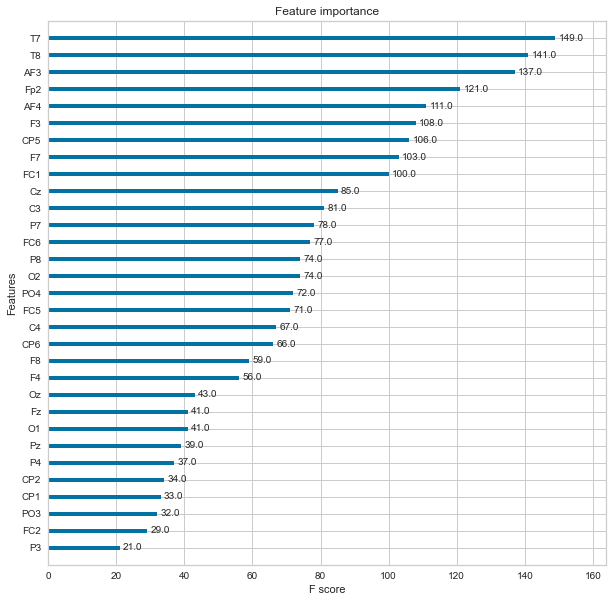

In [120]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

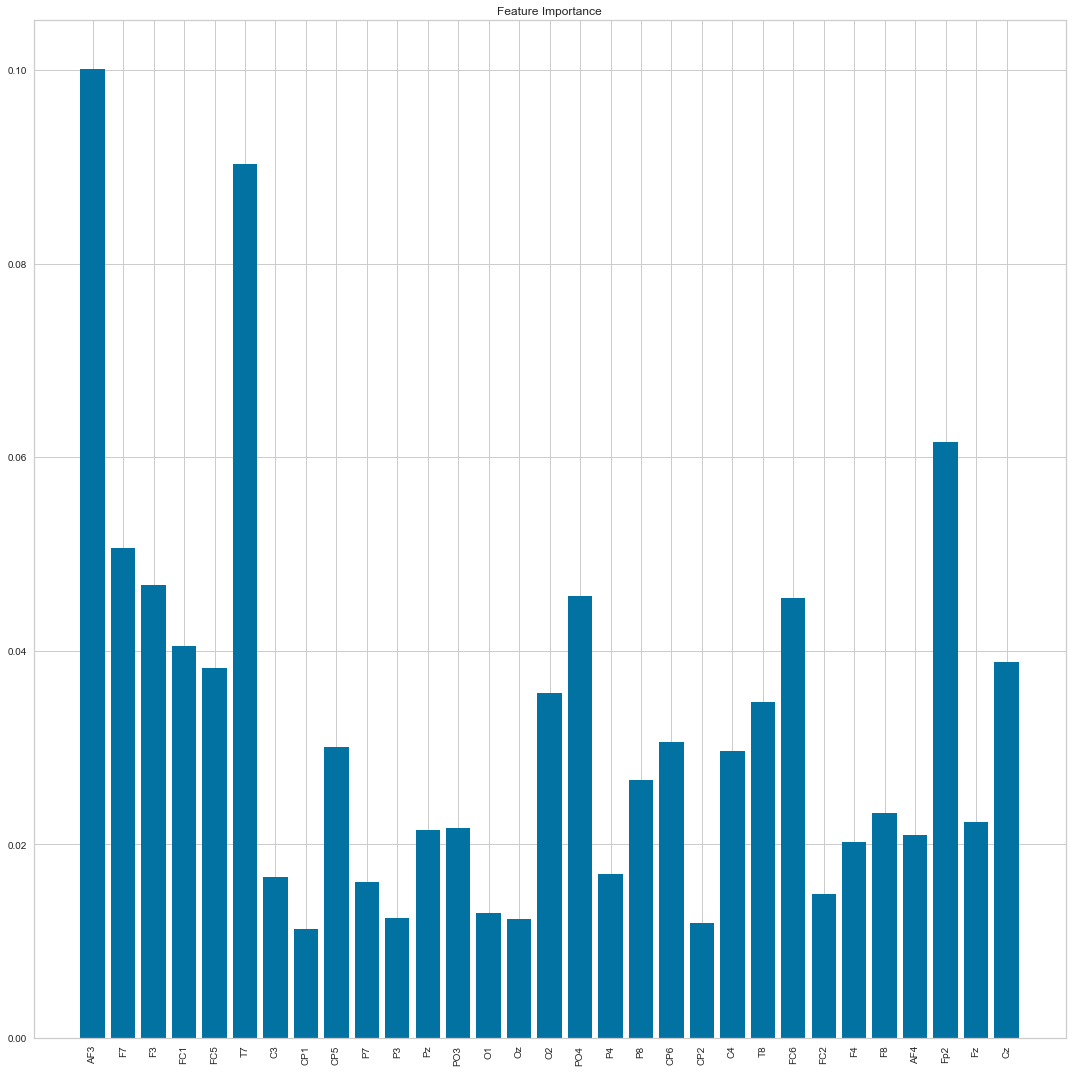

In [121]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

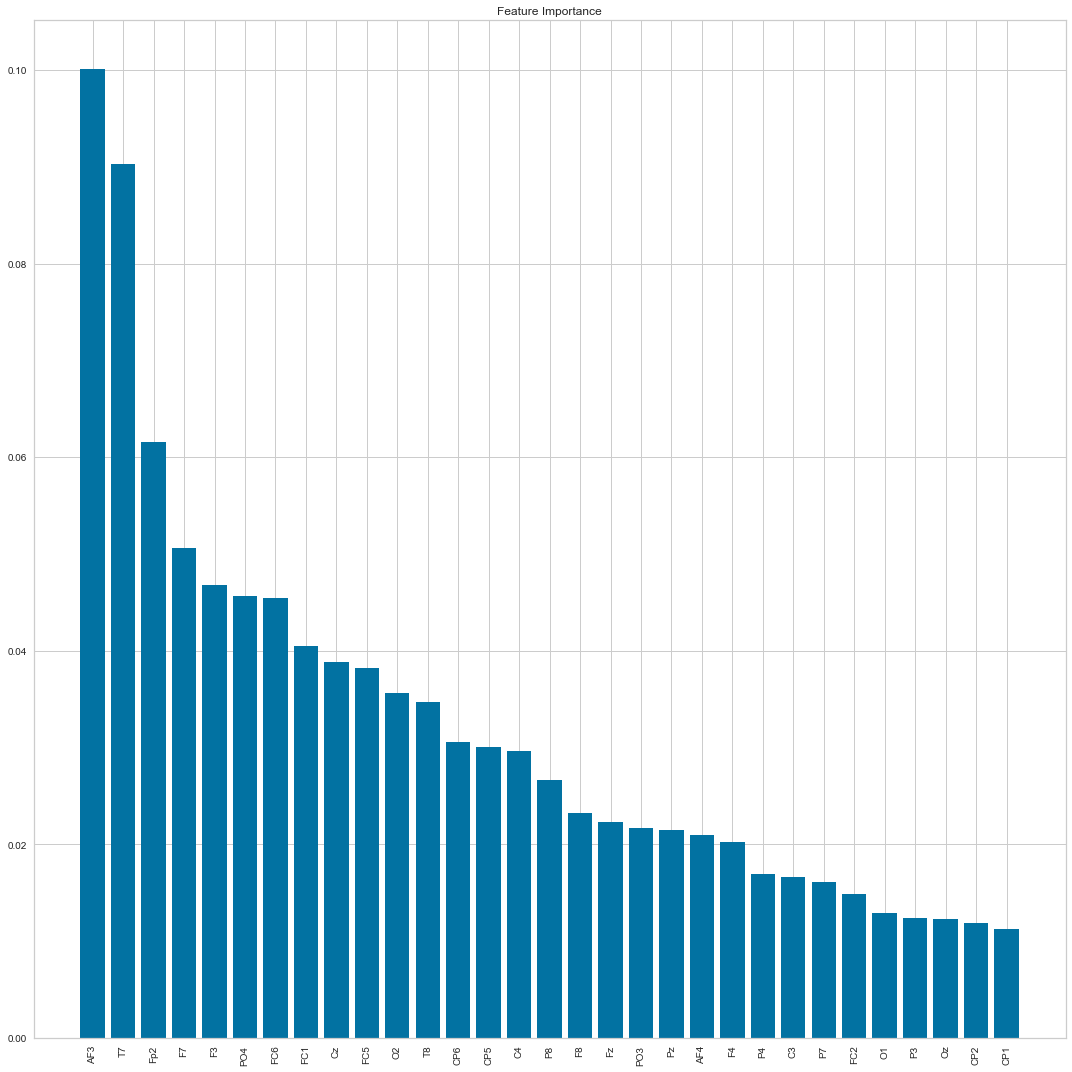

In [122]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [123]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.10010798, 0.05065449, 0.04678647, 0.04047662,
       0.03825524, 0.09023491, 0.01657296, 0.0112607 , 0.03006035,
       0.01611992, 0.01240786, 0.02145306, 0.02164876, 0.012844  ,
       0.0122889 , 0.03567611, 0.04560622, 0.01688895, 0.02667804,
       0.03055025, 0.01181997, 0.02962334, 0.03471086, 0.04540916,
       0.01483636, 0.02023079, 0.02321514, 0.0209147 , 0.06157222,
       0.02228241, 0.03881321])

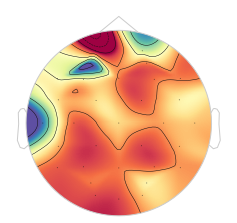

(<matplotlib.image.AxesImage at 0x2663be25cd0>,
 <matplotlib.contour.QuadContourSet at 0x2663be25f70>)

In [124]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>7. Approximate Entropy</h2>

In [125]:
app_ent_pd['Y'] = 1
app_ent['Y'] = 0

In [126]:
X1 = app_ent.append(app_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.608399,0.592641,0.499266,0.590276,0.541234,0.547793,0.526568,0.440637,0.428584,0.590560,...,0.611423,0.573341,0.390734,0.499534,0.586011,0.575989,0.573572,0.564809,0.520519,0
1,0.566791,0.558532,0.520237,0.564580,0.558777,0.527475,0.518760,0.558080,0.539996,0.605273,...,0.596891,0.570877,0.544744,0.433208,0.588961,0.571814,0.567293,0.539248,0.555489,0
2,0.572378,0.556140,0.515648,0.590065,0.565526,0.526411,0.567052,0.528322,0.568680,0.597191,...,0.601560,0.576300,0.559705,0.497426,0.581306,0.499141,0.585940,0.466888,0.576116,0
3,0.575985,0.571335,0.171185,0.246775,0.570195,0.569281,0.602097,0.368770,0.576832,0.571605,...,0.603582,0.541220,0.529135,0.490263,0.559413,0.541992,0.609564,0.480586,0.554815,0
4,0.550112,0.604782,0.253414,0.224545,0.575899,0.528252,0.573964,0.435539,0.475884,0.568827,...,0.626087,0.410623,0.241777,0.510987,0.534565,0.577120,0.588843,0.542675,0.576028,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.602110,0.624473,0.597132,0.590857,0.573795,0.585168,0.526337,0.582791,0.573887,0.530473,...,0.514597,0.485279,0.567305,0.632508,0.564343,0.630887,0.594577,0.593255,0.590351,1
5976,0.605055,0.621471,0.551310,0.603314,0.567926,0.551982,0.465299,0.494699,0.550615,0.472747,...,0.529303,0.488669,0.575972,0.618372,0.474058,0.609237,0.610513,0.601480,0.546059,1
5977,0.604092,0.613930,0.567155,0.603896,0.583829,0.503089,0.379869,0.494781,0.535313,0.425194,...,0.456730,0.437747,0.566142,0.626535,0.460485,0.603701,0.619495,0.583184,0.534812,1
5978,0.628432,0.612058,0.547169,0.625067,0.550861,0.543428,0.348597,0.531872,0.593903,0.416500,...,0.379428,0.344327,0.541386,0.617443,0.442112,0.609515,0.629181,0.564267,0.529775,1


In [127]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,8879
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [128]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8886,0.9576,0.8905,0.8865,0.8881,0.7773,0.7779,0.3373
et,Extra Trees Classifier,0.8822,0.9528,0.8847,0.8796,0.8818,0.7644,0.7650,0.1013
lightgbm,Light Gradient Boosting Machine,0.8822,0.9574,0.8799,0.8832,0.8812,0.7644,0.7649,0.0640
knn,K Neighbors Classifier,0.8784,0.9476,0.9280,0.8438,0.8837,0.7569,0.7611,0.0327
rf,Random Forest Classifier,0.8762,0.9483,0.8526,0.8940,0.8722,0.7524,0.7540,0.1720
gbc,Gradient Boosting Classifier,0.8509,0.9281,0.8569,0.8461,0.8510,0.7018,0.7027,0.3447
qda,Quadratic Discriminant Analysis,0.7998,0.9041,0.9145,0.7430,0.8196,0.6000,0.6171,0.0047
ada,Ada Boost Classifier,0.7759,0.8519,0.7719,0.7772,0.7738,0.5517,0.5527,0.0827
dt,Decision Tree Classifier,0.7424,0.7425,0.7460,0.7390,0.7421,0.4849,0.4853,0.0147
ridge,Ridge Classifier,0.7223,0.0000,0.6902,0.7357,0.7112,0.4445,0.4464,0.0027


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=8879, reg_alpha=0, ...)

In [129]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8566,0.9235,0.9065,0.8235,0.8630,0.7134,0.7170
1,0.8889,0.9511,0.9424,0.8506,0.8942,0.7779,0.7824
2,0.8710,0.9384,0.9065,0.8456,0.8750,0.7420,0.7439
3,0.8746,0.9523,0.8993,0.8562,0.8772,0.7491,0.7501
4,0.8710,0.9421,0.9065,0.8456,0.8750,0.7420,0.7439
5,0.8817,0.9401,0.9353,0.8442,0.8874,0.7635,0.7680
6,0.8208,0.9164,0.9065,0.7730,0.8344,0.6418,0.6515
7,0.8889,0.9549,0.9065,0.8750,0.8905,0.7778,0.7783
8,0.8889,0.9545,0.9209,0.8649,0.8920,0.7778,0.7794


In [130]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8602,0.9350,0.9065,0.8289,0.8660,0.7205,0.7237
1,0.8961,0.9612,0.9424,0.8618,0.9003,0.7922,0.7956
2,0.8781,0.9544,0.9065,0.8571,0.8811,0.7563,0.7576
3,0.9032,0.9595,0.9353,0.8784,0.9059,0.8065,0.8082
4,0.8746,0.9501,0.9209,0.8421,0.8797,0.7492,0.7525
5,0.8746,0.9445,0.9137,0.8467,0.8789,0.7492,0.7515
6,0.8351,0.9386,0.9209,0.7853,0.8477,0.6704,0.6806
7,0.8746,0.9608,0.8993,0.8562,0.8772,0.7491,0.7501
8,0.8925,0.9622,0.9209,0.8707,0.8951,0.7850,0.7863


In [131]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [132]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=-1, n_neighbors=6, p=2,
                     weights='distance')


In [133]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8996,0.9547,0.9065,0.8936,0.9000,0.7993,0.7994
1,0.8853,0.9625,0.9065,0.8690,0.8873,0.7706,0.7714
2,0.8746,0.9465,0.8561,0.8881,0.8718,0.7491,0.7496
3,0.8746,0.9540,0.8417,0.9000,0.8699,0.7490,0.7506
4,0.8495,0.9288,0.8201,0.8702,0.8444,0.6989,0.7000
5,0.8781,0.9490,0.8849,0.8723,0.8786,0.7563,0.7564
6,0.8961,0.9618,0.9065,0.8873,0.8968,0.7921,0.7923
7,0.9032,0.9709,0.8993,0.9058,0.9025,0.8064,0.8065
8,0.8961,0.9585,0.9137,0.8819,0.8975,0.7921,0.7926


In [134]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [136]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8708206686930091


In [137]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.27%


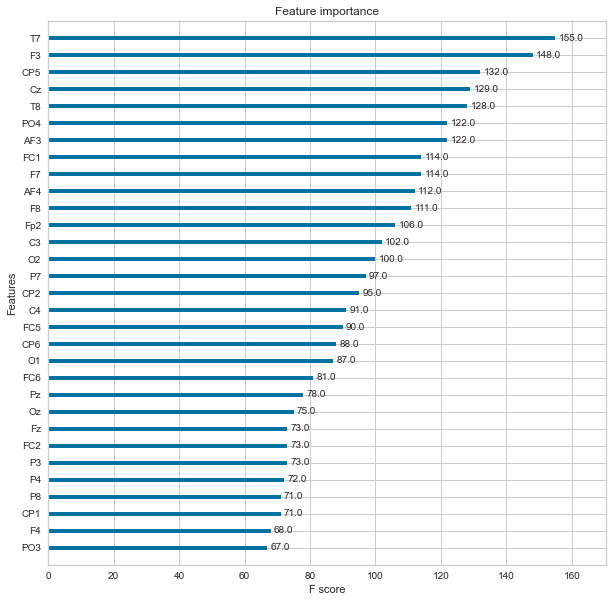

In [138]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

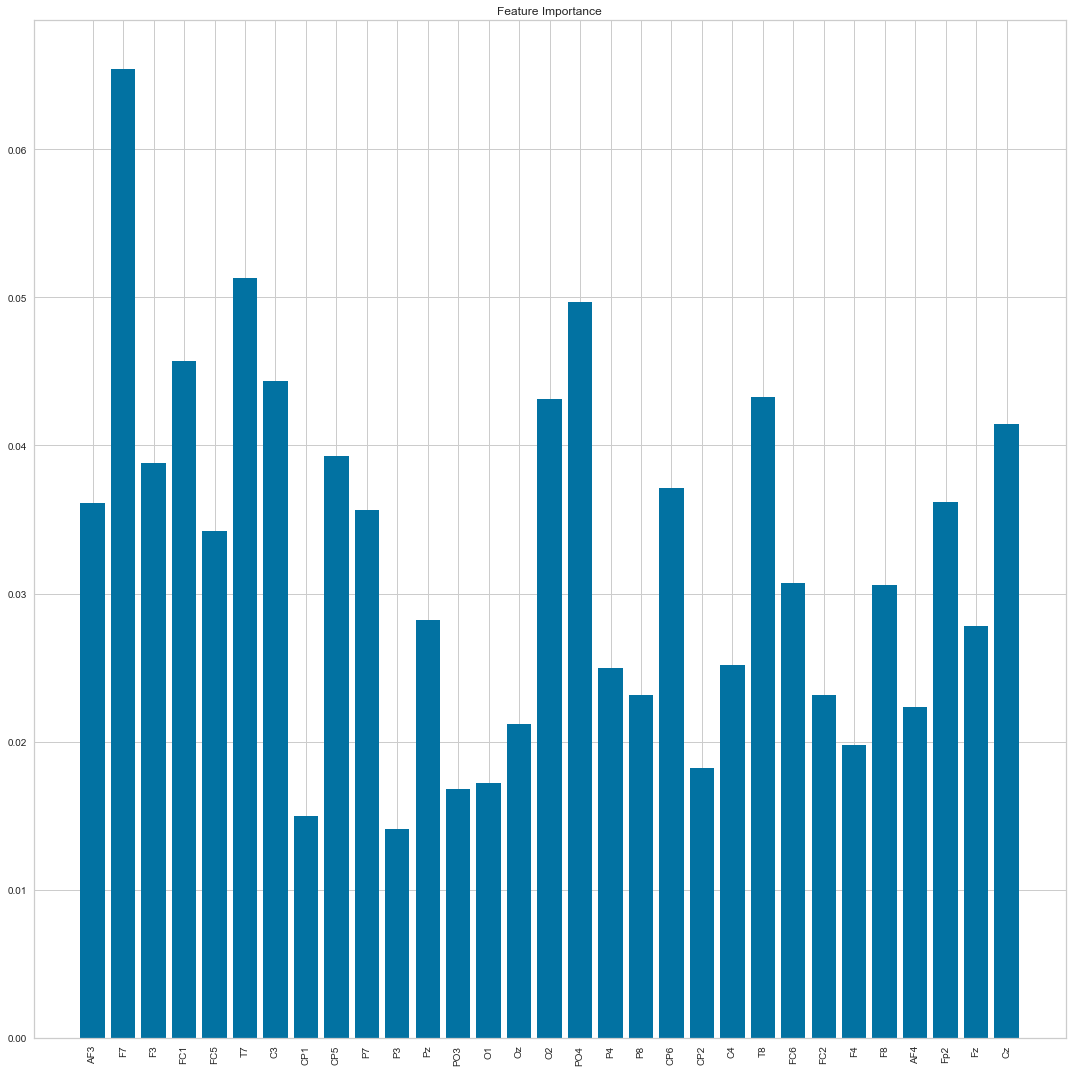

In [139]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

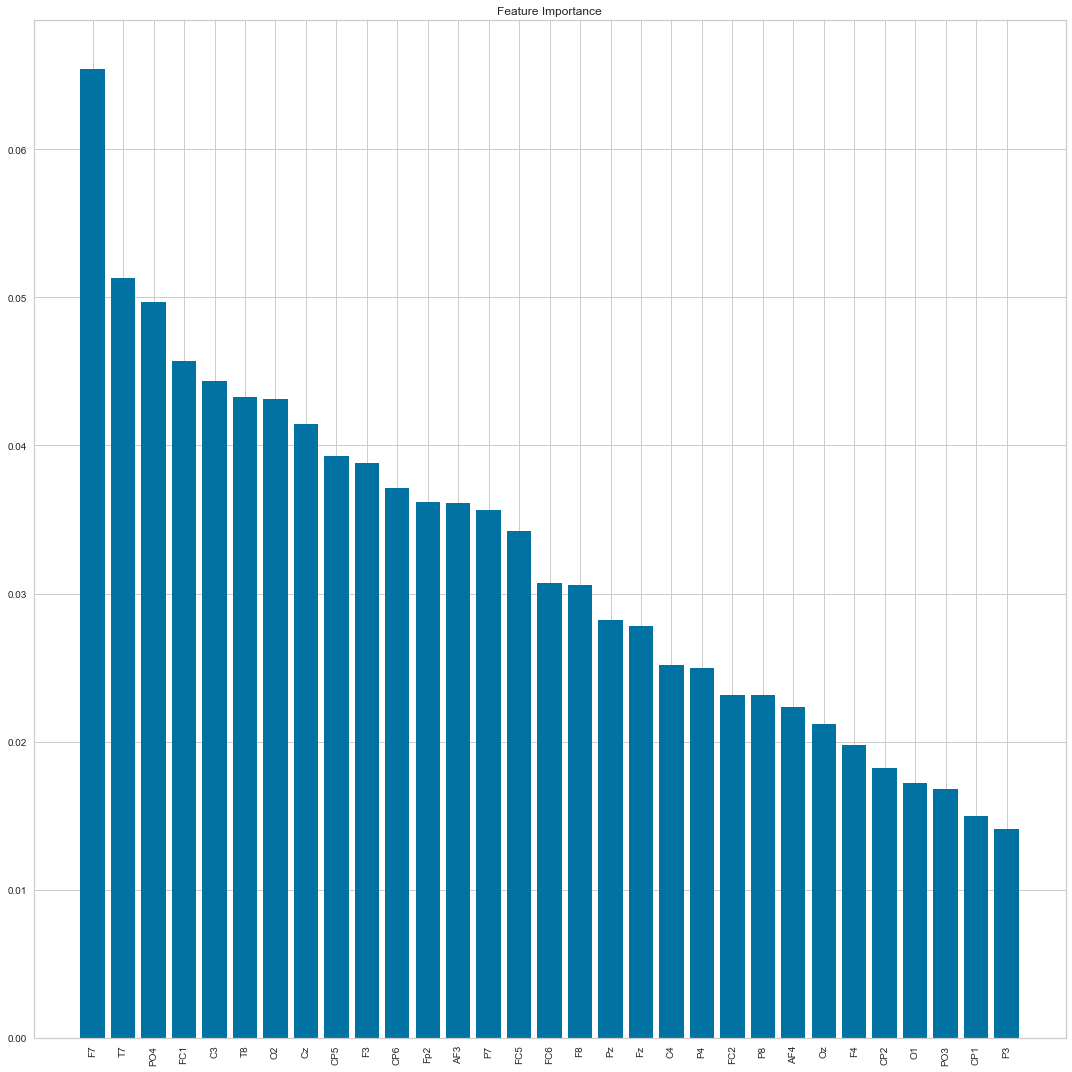

In [140]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [141]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.03612862, 0.06542545, 0.0388078 , 0.04568047,
       0.03419089, 0.05130147, 0.04432342, 0.01497255, 0.03930556,
       0.03561385, 0.01408311, 0.02822351, 0.01676891, 0.01723784,
       0.02120832, 0.04312333, 0.04965351, 0.02498991, 0.02312627,
       0.03712659, 0.01823971, 0.02519762, 0.04328017, 0.03070872,
       0.02316168, 0.01979687, 0.0305632 , 0.02235309, 0.03616632,
       0.02778715, 0.04145407])

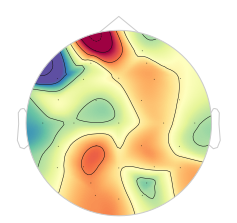

(<matplotlib.image.AxesImage at 0x26634926d30>,
 <matplotlib.contour.QuadContourSet at 0x26634926fa0>)

In [142]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>8. Sample Entropy</h2>

In [143]:
samp_ent_pd['Y'] = 1
samp_ent['Y'] = 0

In [144]:
X1 = samp_ent.append(samp_ent_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.582628,0.614241,0.447238,0.569299,0.488091,0.532631,0.485144,0.381798,0.374451,0.581432,...,0.597126,0.554783,0.351066,0.433761,0.553919,0.566720,0.530955,0.508668,0.490510,0
1,0.518606,0.529751,0.490815,0.541657,0.528541,0.528217,0.452064,0.489272,0.476449,0.599002,...,0.586393,0.579979,0.504587,0.365115,0.544656,0.526249,0.524991,0.513861,0.545209,0
2,0.529254,0.525918,0.469553,0.579399,0.538583,0.495733,0.515129,0.485139,0.493497,0.573976,...,0.599322,0.565178,0.510866,0.437872,0.547116,0.446310,0.543188,0.436248,0.570385,0
3,0.525339,0.560698,0.176922,0.171750,0.546701,0.532314,0.564426,0.335116,0.542199,0.543894,...,0.631142,0.498164,0.471418,0.443837,0.532140,0.509410,0.597766,0.459066,0.546474,0
4,0.468960,0.547199,0.206589,0.154050,0.576227,0.486748,0.526706,0.394075,0.426373,0.553421,...,0.617176,0.364722,0.189093,0.458908,0.495060,0.551502,0.585212,0.537097,0.573396,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.618576,0.627202,0.553268,0.588854,0.537115,0.566352,0.480008,0.550415,0.557112,0.491012,...,0.481418,0.454739,0.529993,0.640503,0.525004,0.660806,0.605464,0.607028,0.551118,1
5976,0.626156,0.612246,0.469486,0.585858,0.544444,0.512912,0.443439,0.439245,0.514311,0.445642,...,0.491020,0.445244,0.562074,0.652524,0.433553,0.616769,0.610397,0.575638,0.512656,1
5977,0.625138,0.578979,0.498113,0.579927,0.552638,0.429889,0.314583,0.436989,0.508086,0.381529,...,0.423089,0.419794,0.537725,0.649312,0.399853,0.602153,0.616894,0.540804,0.494968,1
5978,0.636789,0.613538,0.521731,0.633395,0.457936,0.529090,0.294417,0.468291,0.561368,0.374463,...,0.345469,0.330589,0.485652,0.629128,0.365852,0.583813,0.648490,0.532545,0.484484,1


In [145]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,1481
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [146]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9147,0.9695,0.9277,0.9046,0.9158,0.8294,0.8300,0.0987
xgboost,Extreme Gradient Boosting,0.9142,0.9706,0.9205,0.9094,0.9146,0.8284,0.8291,0.3287
lightgbm,Light Gradient Boosting Machine,0.9087,0.9697,0.9124,0.9065,0.9090,0.8174,0.8181,0.0693
knn,K Neighbors Classifier,0.9051,0.9678,0.9531,0.8705,0.9096,0.8103,0.8148,0.0353
rf,Random Forest Classifier,0.8946,0.9599,0.8889,0.8991,0.8937,0.7892,0.7897,0.1740
gbc,Gradient Boosting Classifier,0.8662,0.9382,0.8865,0.8522,0.8686,0.7324,0.7337,0.3367
qda,Quadratic Discriminant Analysis,0.8609,0.9393,0.9080,0.8298,0.8670,0.7219,0.7256,0.0060
ada,Ada Boost Classifier,0.7838,0.8597,0.7993,0.7751,0.7867,0.5675,0.5683,0.0887
dt,Decision Tree Classifier,0.7677,0.7678,0.7806,0.7607,0.7702,0.5355,0.5362,0.0180
ridge,Ridge Classifier,0.7400,0.0000,0.7198,0.7499,0.7341,0.4800,0.4810,0.0027


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=1481, verbose=0,
                     warm_start=False)

In [147]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9427,0.9743,0.9786,0.9133,0.9448,0.8853,0.8876
1,0.8889,0.9586,0.9429,0.8516,0.8949,0.7777,0.7822
2,0.9140,0.9732,0.9357,0.8973,0.9161,0.8279,0.8287
3,0.9247,0.9793,0.9353,0.9155,0.9253,0.8495,0.8497
4,0.8961,0.9701,0.9784,0.8395,0.9037,0.7922,0.8032
5,0.8996,0.9504,0.9281,0.8776,0.9021,0.7993,0.8006
6,0.9032,0.9697,0.9712,0.8544,0.9091,0.8065,0.8141
7,0.8674,0.9630,0.9568,0.8110,0.8779,0.7349,0.7470
8,0.9247,0.9826,0.9568,0.8986,0.9268,0.8495,0.8513


In [148]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9355,0.9718,0.9357,0.9357,0.9357,0.8710,0.8710
1,0.8889,0.9533,0.8857,0.8921,0.8889,0.7778,0.7778
2,0.9140,0.9738,0.8929,0.9328,0.9124,0.8280,0.8287
3,0.9283,0.9783,0.9137,0.9407,0.9270,0.8566,0.8570
4,0.9068,0.9708,0.9281,0.8897,0.9085,0.8136,0.8144
5,0.9068,0.9516,0.8921,0.9185,0.9051,0.8136,0.8139
6,0.9211,0.9694,0.9209,0.9209,0.9209,0.8423,0.8423
7,0.9032,0.9578,0.9065,0.9000,0.9032,0.8065,0.8065
8,0.9319,0.9826,0.9353,0.9286,0.9319,0.8638,0.8638


In [149]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [150]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
                     weights='uniform')


In [151]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8925,0.9707,0.9000,0.8873,0.8936,0.7849,0.7850
1,0.9319,0.9801,0.9643,0.9060,0.9343,0.8638,0.8656
2,0.9176,0.9680,0.9143,0.9209,0.9176,0.8351,0.8351
3,0.9283,0.9757,0.9065,0.9474,0.9265,0.8566,0.8574
4,0.8925,0.9589,0.8921,0.8921,0.8921,0.7849,0.7849
5,0.9140,0.9572,0.9137,0.9137,0.9137,0.8280,0.8280
6,0.9068,0.9654,0.9424,0.8792,0.9097,0.8137,0.8158
7,0.9104,0.9720,0.9353,0.8904,0.9123,0.8208,0.8219
8,0.9319,0.9860,0.9137,0.9478,0.9304,0.8638,0.8643


In [152]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [154]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8926038500506586


In [155]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 89.36%


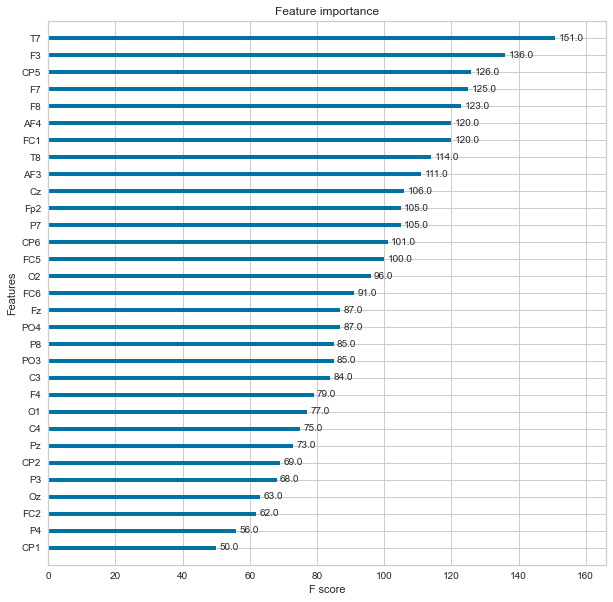

In [156]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

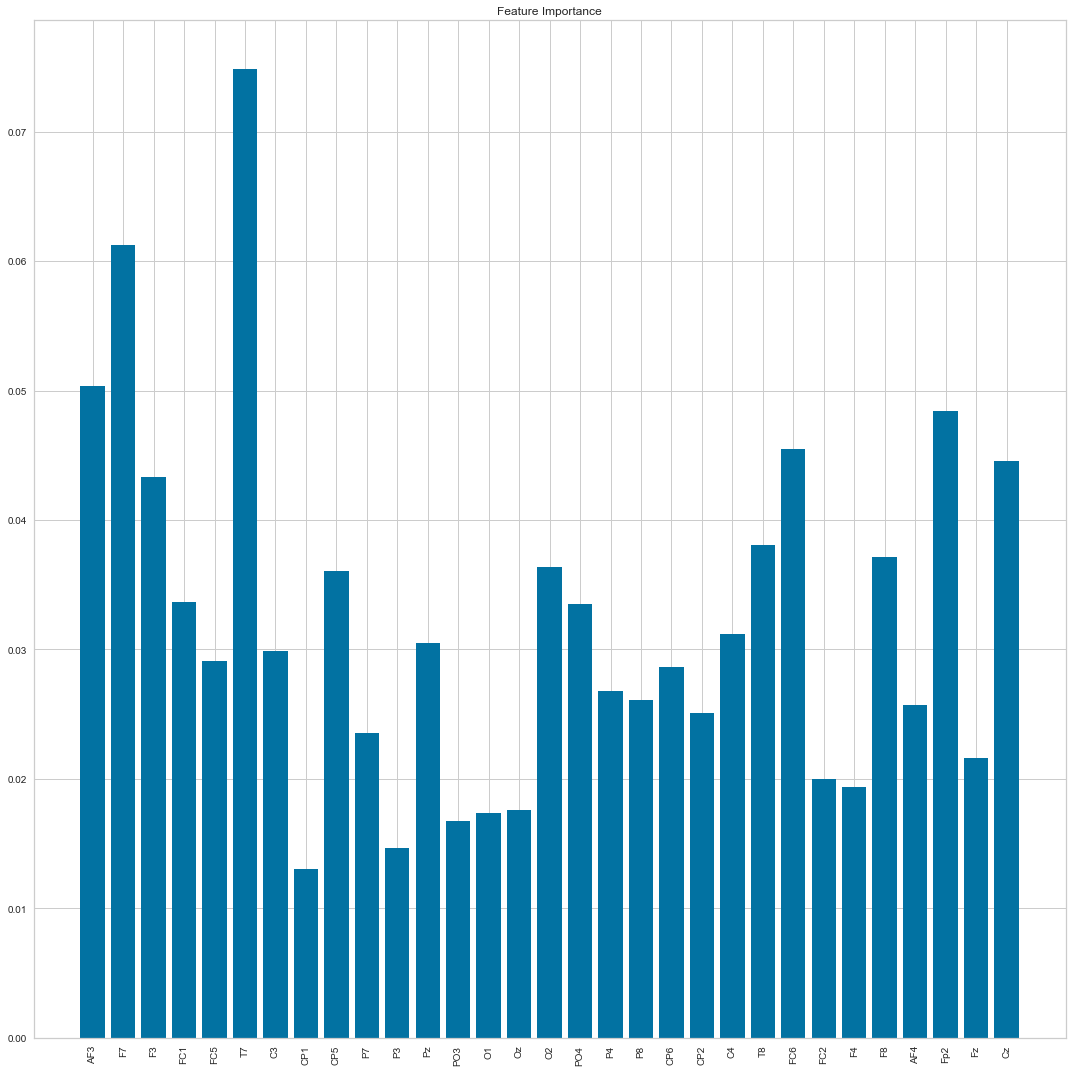

In [157]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

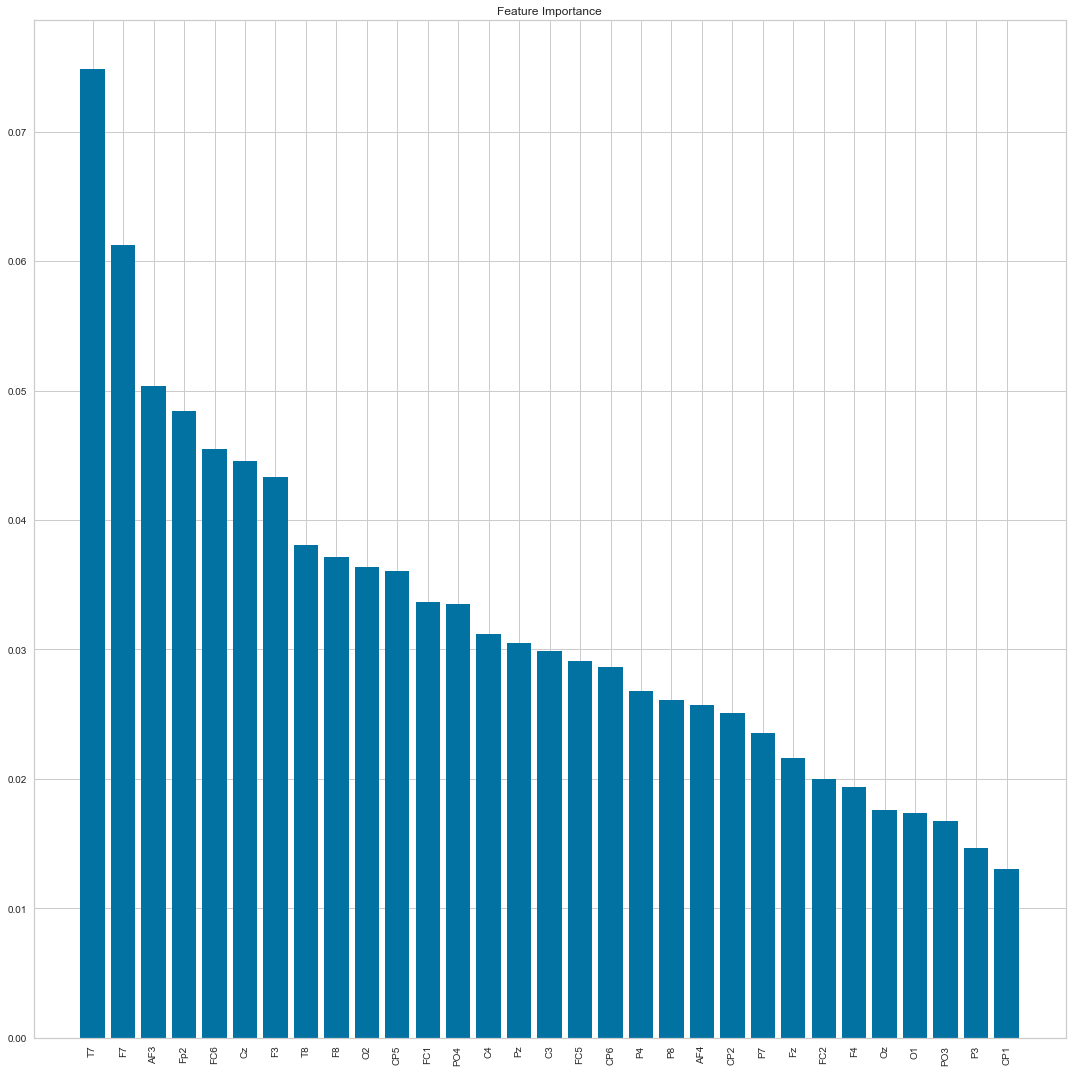

In [158]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [159]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.05038515, 0.06121301, 0.04329262, 0.03365201,
       0.02910681, 0.07485122, 0.02987941, 0.01303389, 0.03605617,
       0.02356279, 0.01467675, 0.03047976, 0.016778  , 0.01737754,
       0.01756056, 0.03637661, 0.03352522, 0.02681925, 0.02612037,
       0.02866073, 0.02507405, 0.03117839, 0.03805203, 0.04546544,
       0.02003047, 0.01934072, 0.03714655, 0.02571522, 0.04842357,
       0.02160149, 0.04456405])

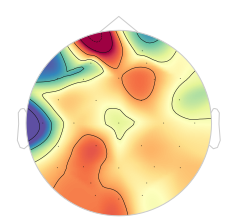

(<matplotlib.image.AxesImage at 0x2663c47f700>,
 <matplotlib.contour.QuadContourSet at 0x2663c47fa00>)

In [160]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>9. Hjorth<h2>

In [161]:
hjorth_pd['Y'] = 1
hjorth['Y'] = 0

In [162]:
X1 = hjorth.append(hjorth_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,"(0.23509864086709523, 1.7016537852093405)","(0.23899167891331521, 1.5730959093686714)","(0.13829447754749075, 2.5382437685299655)","(0.2108222510614329, 1.7761978590152312)","(0.18283999279027305, 1.8464558266319873)","(0.20005564336469434, 1.6262825664660134)","(0.18825840538570593, 1.7284094986118848)","(0.12791324920829938, 2.8858310625771324)","(0.10817970508672686, 3.374329789182818)","(0.21456907122910554, 1.6826796491497824)",...,"(0.24748191267708722, 1.4512692928818571)","(0.19012807796278516, 1.7457142730377542)","(0.09668225328402878, 3.5670174800592545)","(0.1275959191955173, 2.5605528499440684)","(0.19398163861503168, 2.0994309143846714)","(0.20222694457069704, 1.8302572991090222)","(0.171145649738761, 2.1589406931016364)","(0.17196857120631484, 1.7825439779375585)","(0.1560462235482291, 2.261030059537869)",0
1,"(0.18711960840515135, 1.999976069443521)","(0.1903882304668965, 1.9615879173983435)","(0.17278220852591103, 1.9090365470620296)","(0.20413553333799386, 1.737647098883773)","(0.18776925943842165, 1.848815118602632)","(0.19230711617743051, 1.698337497594444)","(0.1682588701215695, 1.9202174131707666)","(0.1580181501064073, 2.2145438339759607)","(0.15541550015317182, 2.2307165828838347)","(0.2198876132158746, 1.6038382356047638)",...,"(0.23523450092954123, 1.5442380827903883)","(0.2115655505378233, 1.6000289564782324)","(0.14821924594443095, 2.217798772910879)","(0.10769336286584594, 2.9524535752418704)","(0.20044998643027745, 1.8725441403225909)","(0.1802642123762777, 1.8164811004177435)","(0.1772631888491533, 1.9491154556880603)","(0.1772989484428979, 1.7648713822623423)","(0.17001132239156191, 2.056809300512017)",0
2,"(0.1834796139488647, 1.9931022510419858)","(0.17426520403176163, 2.171140452531)","(0.1443257691050267, 2.26948257079469)","(0.22489961203164788, 1.5335903251889382)","(0.18608037905670588, 1.9589001129772625)","(0.15553154355310245, 2.1052348794894735)","(0.17883128398807027, 1.7717727172880442)","(0.15307502628408973, 2.201280210425334)","(0.17569520149702603, 1.7877362246075073)","(0.20392306668678387, 1.73064633446246)",...,"(0.24677741408321185, 1.5484310092215667)","(0.198326570639699, 1.8281116800702975)","(0.1577178372528209, 2.199854478983585)","(0.12645869552701355, 2.720699561820734)","(0.17490966375132252, 1.9988630530867477)","(0.144998282313378, 2.1520508288934472)","(0.18608455751698305, 1.8834766495973916)","(0.12855777380843614, 2.558012272072641)","(0.18212431153119768, 1.9134847471149015)",0
3,"(0.2324431329907197, 1.576094022132658)","(0.22233730419867212, 1.7072944736727838)","(0.04990113455395791, 7.1068749402351274)","(0.07409558862773506, 5.036231232864246)","(0.19367342356175096, 1.7849497529171066)","(0.1793790388681656, 2.0408562068251324)","(0.1916839350000318, 1.6620050564335962)","(0.09226459510361736, 3.7513274506626164)","(0.1674131589759346, 1.8279455327945031)","(0.17328745024294814, 1.9219621257417128)",...,"(0.2431657915021434, 1.565601945556499)","(0.14741016009949592, 2.4401827289086593)","(0.15822488436915938, 2.1587636106556545)","(0.13267387716798812, 2.6985954459619914)","(0.18932810710582645, 2.0495246432109075)","(0.1668403888159787, 2.0474916553152283)","(0.23471273913679377, 1.6081645573617418)","(0.12850900953898123, 2.6508696928534268)","(0.16922079270125648, 2.096246896345672)",0
4,"(0.19011085434406105, 2.0954673687265477)","(0.2631756888985563, 1.5210012879962949)","(0.06979040675372188, 5.738772847123235)","(0.06395963058389682, 5.261278576167344)","(0.2030331593467536, 1.6470862317251465)","(0.15970715965168086, 2.44292693528758)","(0.17309455641409788, 2.0176523199811185)","(0.10874001496301688, 3.1976751365114517)","(0.11933601872335843, 2.5170620129713903)","(0.18184611155088576, 1.6955212909526751)",...,"(0.25948649003089447, 1.566057969439376)","(0.09955410656829292, 3.517547822737416)","(0.06824494043745409, 4.613123575734835)","(0.13706019801049407, 2.525524

In [163]:
X2 = X1.iloc[:, :-1].applymap(lambda x: (float(x.split(',')[0].split('(')[1]) + float(x.split(',')[1].split(')')[0]))/2)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,C4,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz
0,0.968376,0.906044,1.338269,0.993510,1.014648,0.913169,0.958334,1.506872,1.741255,0.948624,...,0.832327,0.849376,0.967921,1.831850,1.344074,1.146706,1.016242,1.165043,0.977256,1.208538
1,1.093548,1.075988,1.040909,0.970891,1.018292,0.945322,1.044238,1.186281,1.193066,0.911863,...,0.834781,0.889736,0.905797,1.183009,1.530073,1.036497,0.998373,1.063189,0.971085,1.113410
2,1.088291,1.172703,1.206904,0.879245,1.072490,1.130383,0.975302,1.177178,0.981716,0.967285,...,0.928835,0.897604,1.013219,1.178786,1.423579,1.086886,1.148525,1.034781,1.343285,1.047805
3,0.904269,0.964816,3.578388,2.555163,0.989312,1.110118,0.926844,1.921796,0.997679,1.047625,...,0.987826,0.904384,1.293796,1.158494,1.415635,1.119426,1.107166,0.921439,1.389689,1.132734
4,1.142789,0.892088,2.904282,2.662619,0.925060,1.301317,1.095373,1.653208,1.318199,0.938684,...,0.863457,0.912772,1.808551,2.340684,1.331292,0.853586,0.861800,0.988863,1.031751,0.952454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.891844,0.828045,1.075873,0.761118,0.870560,0.950717,1.104858,0.838260,0.917530,1.003800,...,1.050648,1.054048,1.223356,0.995899,0.827307,1.090704,0.829961,0.776735,0.838035,0.978558
5976,0.922695,0.859091,1.121706,0.923913,0.979212,1.166053,1.091678,1.098422,0.967032,1.017660,...,1.034927,1.037853,1.169828,0.916928,0.822346,1.284819,0.838371,0.839875,0.911718,1.033993
5977,0.932445,0.880334,1.141002,0.898180,1.073530,1.239501,1.435942,1.093201,1.068002,1.082526,...,1.210548,1.188651,1.414172,0.962015,0.856824,1.354759,0.844231,0.804316,1.037613,0.990062
5978,0.914205,0.846170,1.217585,0.875770,1.142777,1.153782,1.789283,1.113088,1.005909,1.176526,...,1.224552,1.583507,1.719619,1.068727,0.897063,1.543222,0.972462,0.802290,1.156490,0.986443


In [164]:
X2 = pd.concat([X2, X1.iloc[:, -1]], axis=1)
X2

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,0.968376,0.906044,1.338269,0.993510,1.014648,0.913169,0.958334,1.506872,1.741255,0.948624,...,0.849376,0.967921,1.831850,1.344074,1.146706,1.016242,1.165043,0.977256,1.208538,0
1,1.093548,1.075988,1.040909,0.970891,1.018292,0.945322,1.044238,1.186281,1.193066,0.911863,...,0.889736,0.905797,1.183009,1.530073,1.036497,0.998373,1.063189,0.971085,1.113410,0
2,1.088291,1.172703,1.206904,0.879245,1.072490,1.130383,0.975302,1.177178,0.981716,0.967285,...,0.897604,1.013219,1.178786,1.423579,1.086886,1.148525,1.034781,1.343285,1.047805,0
3,0.904269,0.964816,3.578388,2.555163,0.989312,1.110118,0.926844,1.921796,0.997679,1.047625,...,0.904384,1.293796,1.158494,1.415635,1.119426,1.107166,0.921439,1.389689,1.132734,0
4,1.142789,0.892088,2.904282,2.662619,0.925060,1.301317,1.095373,1.653208,1.318199,0.938684,...,0.912772,1.808551,2.340684,1.331292,0.853586,0.861800,0.988863,1.031751,0.952454,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,0.891844,0.828045,1.075873,0.761118,0.870560,0.950717,1.104858,0.838260,0.917530,1.003800,...,1.054048,1.223356,0.995899,0.827307,1.090704,0.829961,0.776735,0.838035,0.978558,1
5976,0.922695,0.859091,1.121706,0.923913,0.979212,1.166053,1.091678,1.098422,0.967032,1.017660,...,1.037853,1.169828,0.916928,0.822346,1.284819,0.838371,0.839875,0.911718,1.033993,1
5977,0.932445,0.880334,1.141002,0.898180,1.073530,1.239501,1.435942,1.093201,1.068002,1.082526,...,1.188651,1.414172,0.962015,0.856824,1.354759,0.844231,0.804316,1.037613,0.990062,1
5978,0.914205,0.846170,1.217585,0.875770,1.142777,1.153782,1.789283,1.113088,1.005909,1.176526,...,1.583507,1.719619,1.068727,0.897063,1.543222,0.972462,0.802290,1.156490,0.986443,1


In [165]:
clf = setup(data=X2, target='Y')

,Description,Value
0,session_id,2976
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [166]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9407,0.9851,0.9513,0.9320,0.9413,0.8815,0.8821,0.3240
lightgbm,Light Gradient Boosting Machine,0.9348,0.9835,0.9431,0.9279,0.9353,0.8695,0.8701,0.0687
et,Extra Trees Classifier,0.9223,0.9788,0.9269,0.9192,0.9227,0.8447,0.8453,0.0920
rf,Random Forest Classifier,0.9221,0.9760,0.9149,0.9286,0.9214,0.8442,0.8448,0.1773
knn,K Neighbors Classifier,0.9016,0.9667,0.9589,0.8606,0.9070,0.8031,0.8087,0.0300
gbc,Gradient Boosting Classifier,0.8977,0.9644,0.9159,0.8840,0.8995,0.7955,0.7964,0.3467
ada,Ada Boost Classifier,0.8284,0.9106,0.8394,0.8218,0.8302,0.6569,0.6577,0.0807
dt,Decision Tree Classifier,0.8103,0.8102,0.8126,0.8108,0.8110,0.6205,0.6215,0.0153
qda,Quadratic Discriminant Analysis,0.7978,0.9227,0.9221,0.7396,0.8204,0.5958,0.6156,0.0047
lr,Logistic Regression,0.7967,0.8709,0.8117,0.7885,0.7995,0.5933,0.5942,0.0113


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=2976, reg_alpha=0, ...)

In [167]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9427,0.9903,0.9786,0.9133,0.9448,0.8853,0.8876
1,0.9319,0.9813,0.9357,0.9291,0.9324,0.8638,0.8638
2,0.9355,0.9771,0.9500,0.9236,0.9366,0.8710,0.8713
3,0.9677,0.9942,0.9643,0.9712,0.9677,0.9355,0.9355
4,0.9211,0.9840,0.9214,0.9214,0.9214,0.8423,0.8423
5,0.9606,0.9840,0.9500,0.9708,0.9603,0.9212,0.9214
6,0.9283,0.9821,0.9286,0.9286,0.9286,0.8566,0.8566
7,0.9642,0.9921,0.9784,0.9510,0.9645,0.9283,0.9287
8,0.9319,0.9814,0.9496,0.9167,0.9329,0.8638,0.8644


In [168]:
et = create_model('et', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9427,0.9854,0.9429,0.9429,0.9429,0.8853,0.8853
1,0.9104,0.9747,0.9000,0.9197,0.9097,0.8208,0.8210
2,0.9176,0.9816,0.9071,0.9270,0.9170,0.8351,0.8353
3,0.9462,0.9892,0.9214,0.9699,0.9451,0.8925,0.8936
4,0.9211,0.9788,0.9500,0.8986,0.9236,0.8423,0.8436
5,0.9427,0.9798,0.9429,0.9429,0.9429,0.8853,0.8853
6,0.9104,0.9703,0.9143,0.9078,0.9110,0.8208,0.8208
7,0.9427,0.9864,0.9568,0.9301,0.9433,0.8853,0.8857
8,0.9104,0.9717,0.9137,0.9071,0.9104,0.8208,0.8208


In [169]:
X3 = X2.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [170]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
5975    1
5976    1
5977    1
5978    1
5979    1
Name: Y, Length: 5980, dtype: int64

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [172]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9088145896656535


In [173]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 93.57%


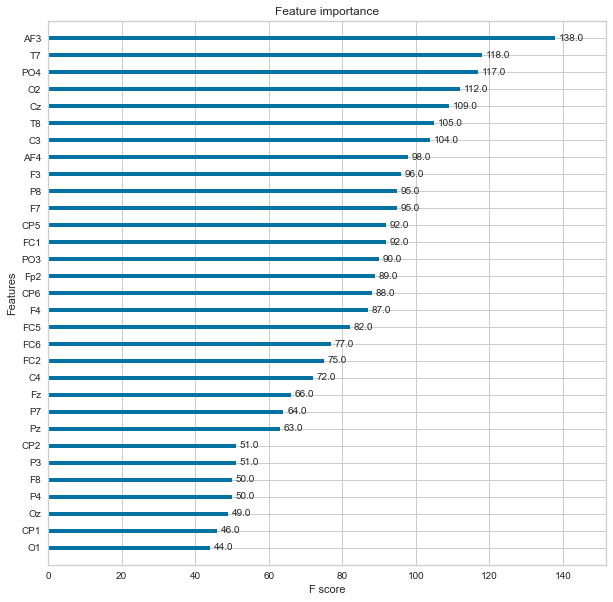

In [174]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

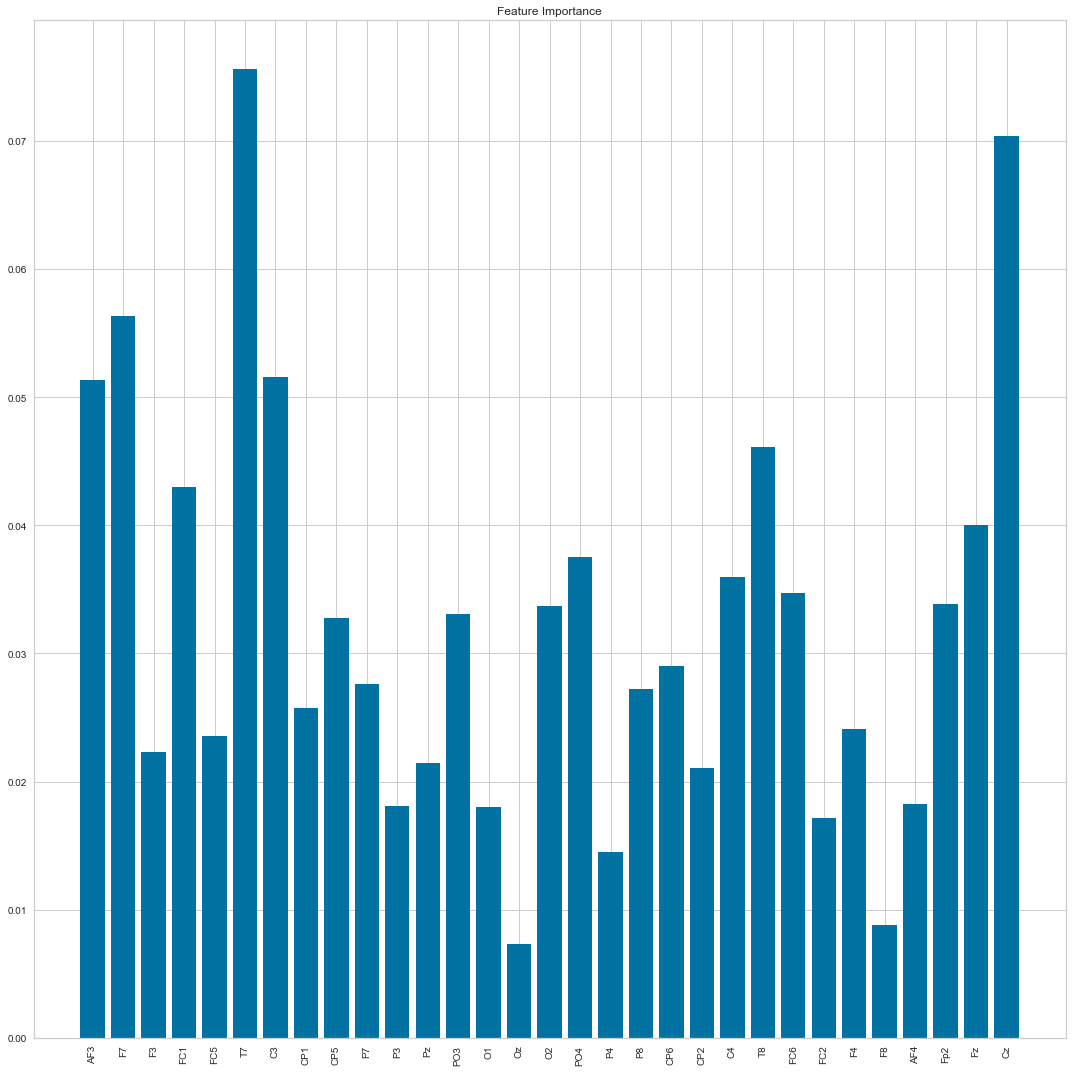

In [175]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

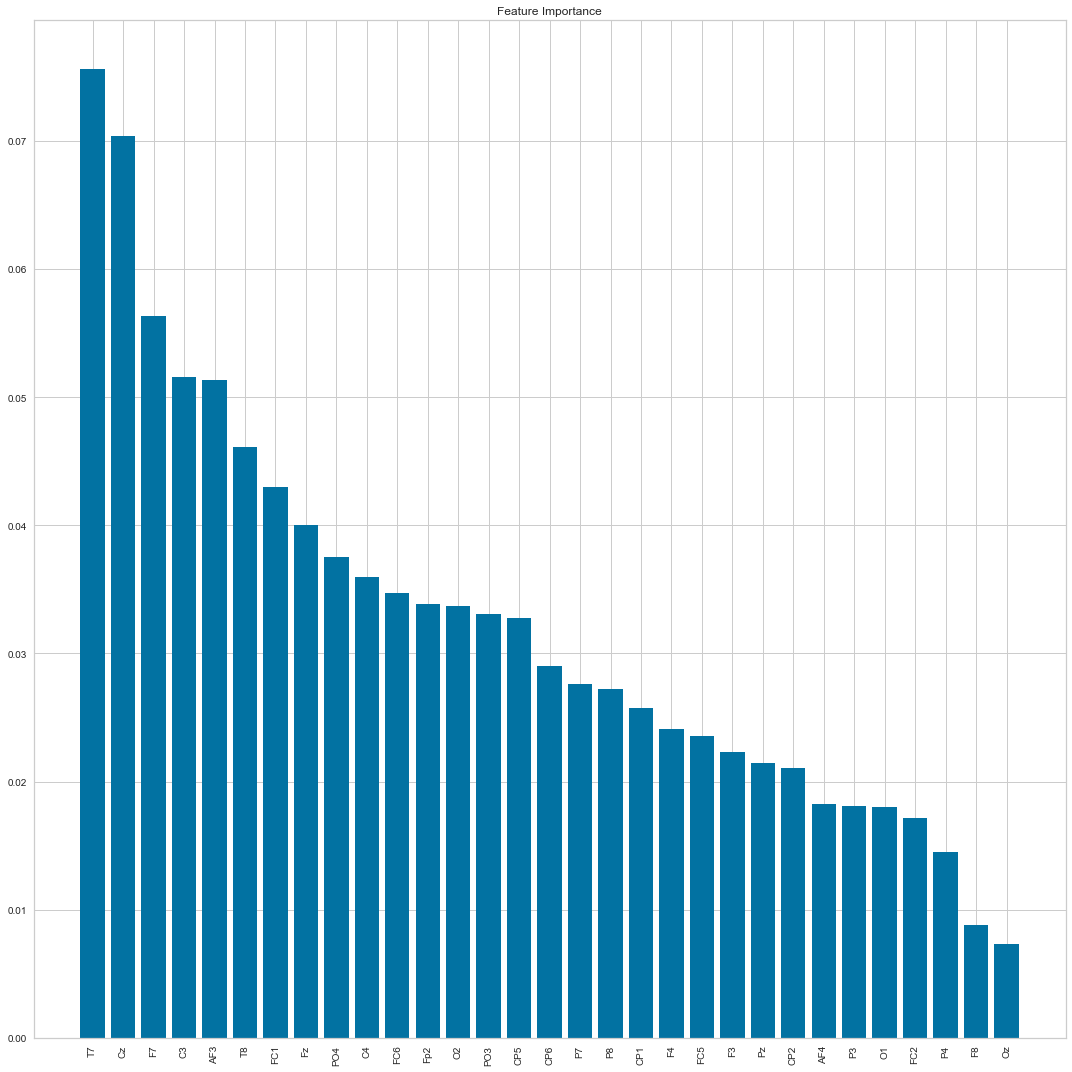

In [176]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [177]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.05135753, 0.05631009, 0.02229369, 0.04298963,
       0.02352762, 0.07563441, 0.05155247, 0.02571671, 0.03275669,
       0.02760439, 0.01807107, 0.02146537, 0.03304536, 0.01803708,
       0.0072845 , 0.03367532, 0.03750581, 0.01452939, 0.02719717,
       0.02900689, 0.02109211, 0.03596126, 0.04608433, 0.03470915,
       0.01715276, 0.02413473, 0.00876899, 0.01822075, 0.03389528,
       0.03999974, 0.07041969])

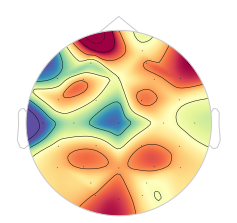

(<matplotlib.image.AxesImage at 0x2663c5aeaf0>,
 <matplotlib.contour.QuadContourSet at 0x2663c5ae8b0>)

In [178]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>10. Num Zero Crossings</h2>

In [179]:
num_zero_pd['Y'] = 1
num_zero['Y'] = 0

In [180]:
X1 = num_zero.append(num_zero_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,35,31,17,27,17,35,16,13,15,32,...,42,33,25,20,25,29,23,33,23,0
1,25,28,20,33,26,32,24,21,23,34,...,48,42,18,17,32,31,26,34,30,0
2,25,24,22,33,30,21,26,11,25,34,...,50,38,20,21,31,19,25,23,35,0
3,33,29,15,16,28,26,31,10,24,31,...,36,18,22,14,32,22,34,21,24,0
4,35,36,5,2,28,34,31,18,17,33,...,37,7,11,13,40,35,37,27,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,43,52,27,49,41,24,24,26,30,35,...,28,25,31,52,31,52,44,47,29,1
5976,47,46,25,35,29,21,22,22,27,28,...,24,28,35,49,22,48,43,39,19,1
5977,46,40,32,35,28,18,10,21,26,20,...,20,18,40,40,18,44,46,34,17,1
5978,46,47,34,44,23,24,10,24,28,21,...,18,11,30,37,17,36,56,30,22,1


In [181]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,7001
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [182]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9288,0.9802,0.9704,0.8961,0.9317,0.8576,0.8607,0.0300
et,Extra Trees Classifier,0.9240,0.9787,0.9460,0.9065,0.9257,0.8480,0.8490,0.0927
lightgbm,Light Gradient Boosting Machine,0.9214,0.9761,0.9341,0.9115,0.9225,0.8428,0.8434,0.0253
xgboost,Extreme Gradient Boosting,0.9192,0.9766,0.9288,0.9118,0.9200,0.8385,0.8389,0.1000
rf,Random Forest Classifier,0.9149,0.9720,0.9216,0.9100,0.9156,0.8299,0.8303,0.1120
qda,Quadratic Discriminant Analysis,0.9008,0.9631,0.9083,0.8957,0.9015,0.8017,0.8025,0.0040
gbc,Gradient Boosting Classifier,0.8734,0.9457,0.9006,0.8549,0.8769,0.7467,0.7482,0.1367
ada,Ada Boost Classifier,0.8036,0.8807,0.8308,0.7881,0.8087,0.6072,0.6084,0.0380
dt,Decision Tree Classifier,0.7931,0.7931,0.7954,0.7923,0.7934,0.5861,0.5868,0.0087
ridge,Ridge Classifier,0.7651,0.0000,0.7854,0.7555,0.7697,0.5303,0.5313,0.0027


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [183]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9032,0.9785,0.9571,0.8645,0.9085,0.8064,0.8111
1,0.9247,0.9736,0.9786,0.8839,0.9288,0.8494,0.8544
2,0.9319,0.9770,0.9714,0.9007,0.9347,0.8638,0.8665
3,0.9427,0.9869,0.9929,0.9026,0.9456,0.8853,0.8898
4,0.9068,0.9759,0.9571,0.8701,0.9116,0.8136,0.8177
5,0.9283,0.9744,0.9714,0.8947,0.9315,0.8566,0.8598
6,0.9283,0.9846,0.9714,0.8947,0.9315,0.8566,0.8598
7,0.9176,0.9803,0.9496,0.8919,0.9199,0.8352,0.8369
8,0.9391,0.9876,0.9856,0.9013,0.9416,0.8782,0.8820


In [184]:
tuned_knn = tune_model(knn, fold=15, optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9104,0.9633,0.9357,0.8912,0.9129,0.8208,0.8218
1,0.9355,0.9656,0.9429,0.9296,0.9362,0.8710,0.8710
2,0.9462,0.9669,0.9429,0.9496,0.9462,0.8925,0.8925
3,0.9606,0.9783,0.9643,0.9574,0.9609,0.9211,0.9212
4,0.9391,0.9703,0.9714,0.9128,0.9412,0.8781,0.8799
5,0.9176,0.9570,0.9571,0.8874,0.9210,0.8351,0.8377
6,0.9462,0.9634,0.9571,0.9371,0.9470,0.8925,0.8927
7,0.9211,0.9675,0.9281,0.9149,0.9214,0.8423,0.8424
8,0.9462,0.9763,0.9424,0.9493,0.9458,0.8925,0.8925


In [185]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9247,0.9800,0.9357,0.9161,0.9258,0.8494,0.8496
1,0.8961,0.9707,0.9071,0.8881,0.8975,0.7921,0.7923
2,0.9176,0.9769,0.9143,0.9209,0.9176,0.8351,0.8351
3,0.9176,0.9712,0.9286,0.9091,0.9187,0.8351,0.8353
4,0.9104,0.9721,0.9357,0.8912,0.9129,0.8208,0.8218
5,0.9247,0.9750,0.9143,0.9343,0.9242,0.8495,0.8497
6,0.8961,0.9697,0.8929,0.8993,0.8961,0.7921,0.7921
7,0.9247,0.9843,0.9209,0.9275,0.9242,0.8495,0.8495
8,0.9498,0.9839,0.9568,0.9433,0.9500,0.8996,0.8997


In [186]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [188]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9047619047619048


In [189]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.43%


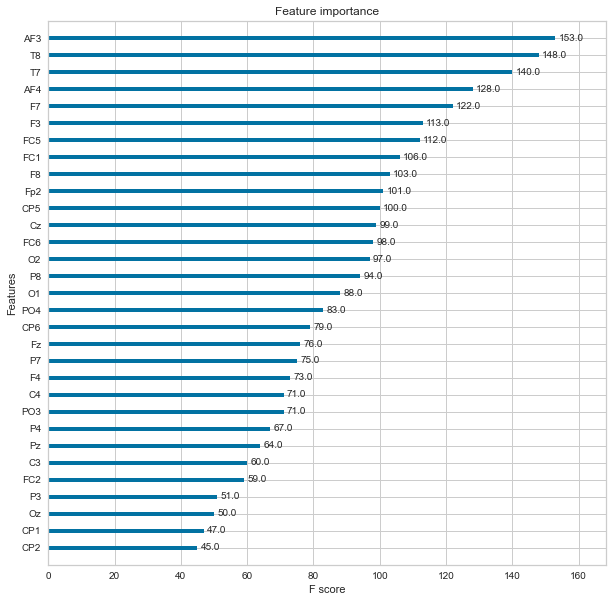

In [190]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model)
plt.show()

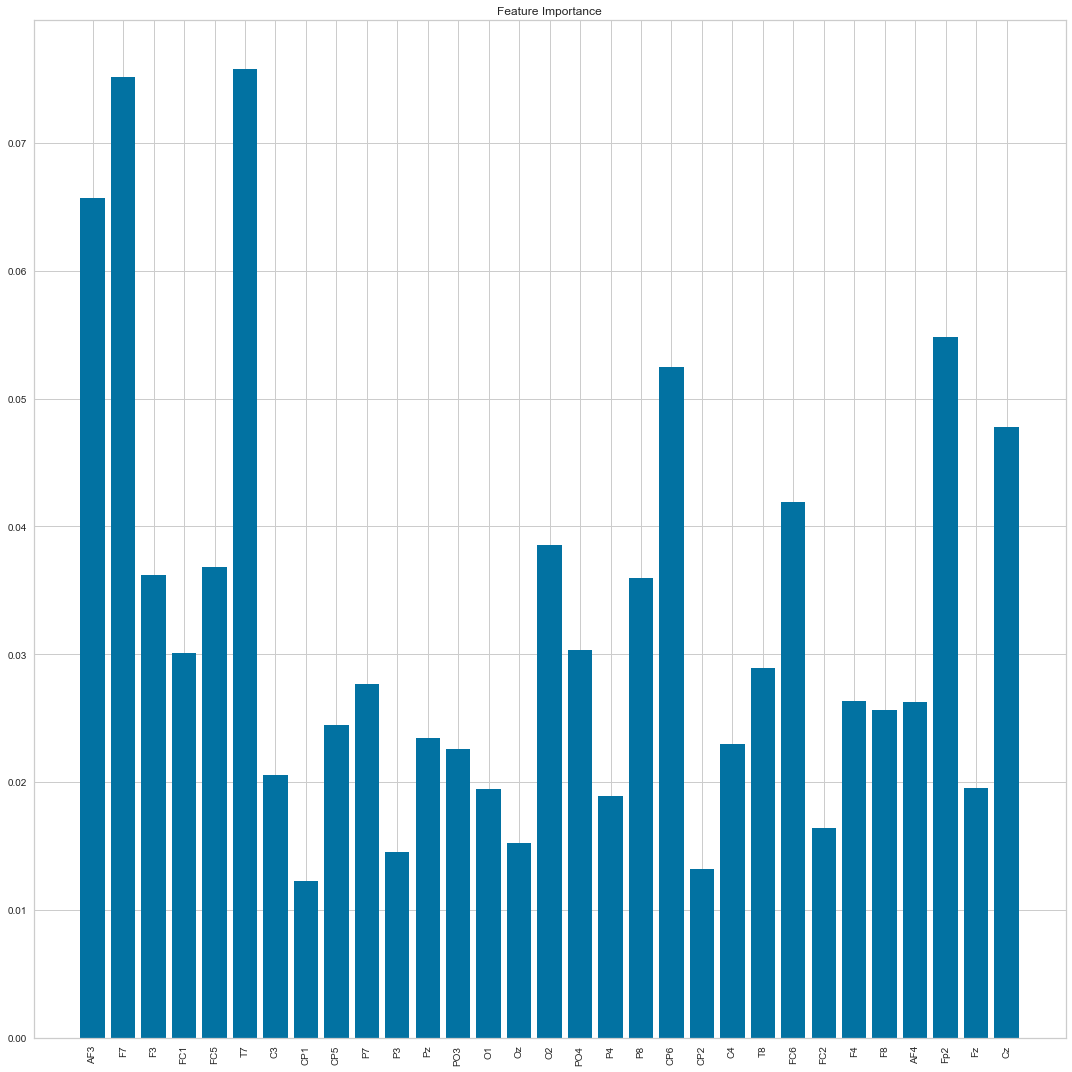

In [191]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

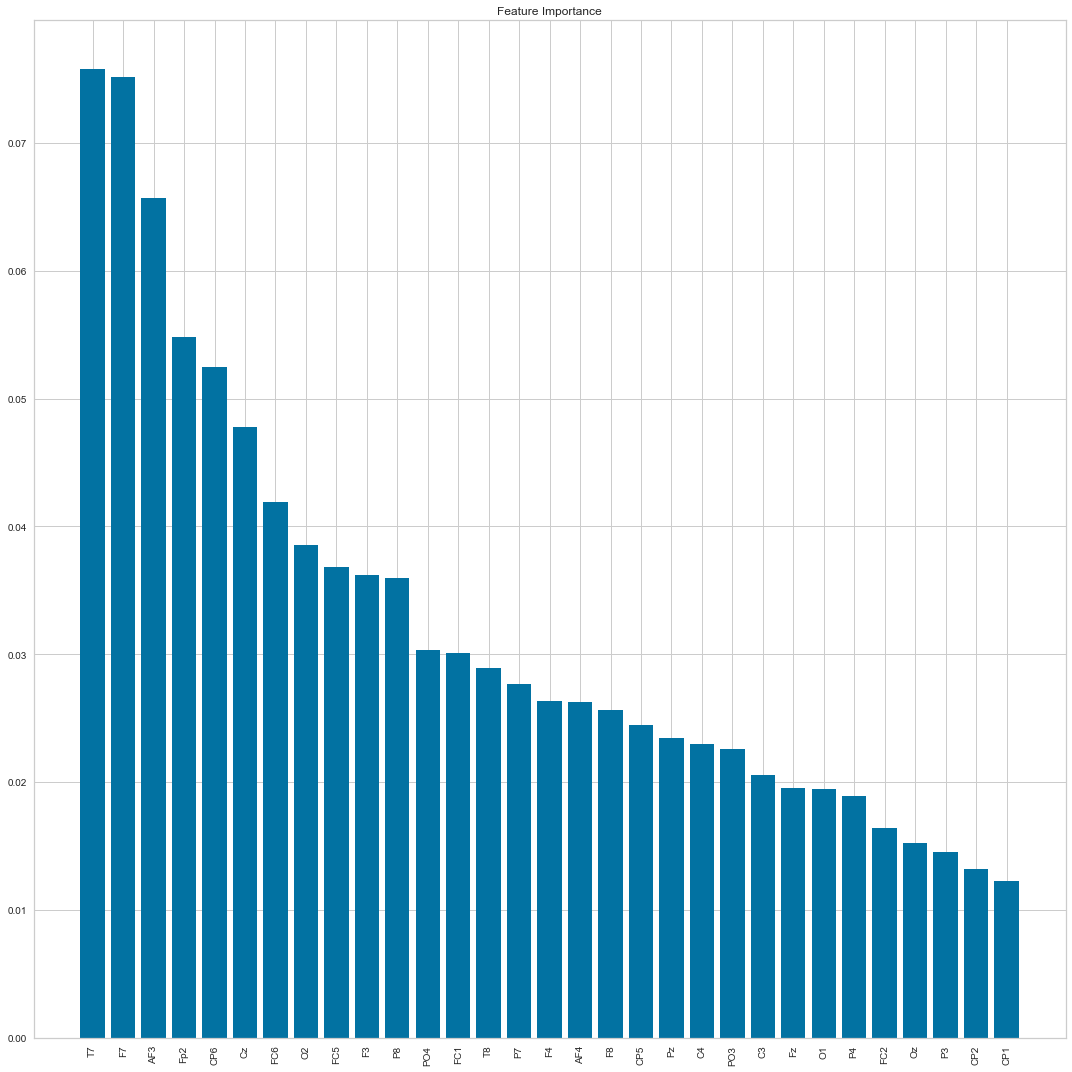

In [192]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [193]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.06567704, 0.07513652, 0.03622182, 0.03012343,
       0.03683723, 0.07578953, 0.02053622, 0.01228695, 0.02447967,
       0.02766488, 0.01452118, 0.02342599, 0.02256821, 0.01949579,
       0.01520914, 0.03857196, 0.03030326, 0.01887668, 0.03597431,
       0.05248141, 0.01319992, 0.02299169, 0.02890164, 0.04188049,
       0.01639931, 0.0263801 , 0.02566119, 0.02629867, 0.05483217,
       0.01952101, 0.04775264])

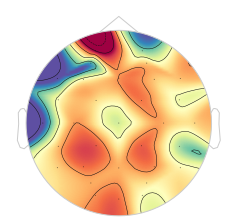

(<matplotlib.image.AxesImage at 0x266408b8bb0>,
 <matplotlib.contour.QuadContourSet at 0x266408b8e50>)

In [194]:
fig, ax = plt.subplots(figsize=(4,4))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)

<h2>11. Lziv </h2>

In [195]:
lziv_pd['Y'] = 1
lziv['Y'] = 0

In [196]:
X1 = lziv.append(lziv_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
3,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5976,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5977,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1
5978,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,1


In [197]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,377
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,0
7,Categorical Features,32
8,Ordinal Features,False
9,High Cardinality Features,False


In [198]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.5008,0.0000,0.2667,0.1336,0.1780,0.0000,0.0000,0.0087
lr,Logistic Regression,0.5004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0047
nb,Naive Bayes,0.5004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2053
dt,Decision Tree Classifier,0.5004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0047
ridge,Ridge Classifier,0.5004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0047
rf,Random Forest Classifier,0.5004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0460
qda,Quadratic Discriminant Analysis,0.5004,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0107
ada,Ada Boost Classifier,0.5004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0227
gbc,Gradient Boosting Classifier,0.5004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0167
et,Extra Trees Classifier,0.5004,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0413


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=377, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

<h2>12. Detrended Fluctuation </h2>

In [199]:
det_fluc_pd['Y'] = 1
det_fluc['Y'] = 0

In [200]:
X1 = det_fluc.append(det_fluc_pd).reset_index().drop('index', axis=1)
X1

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,T8,FC6,FC2,F4,F8,AF4,Fp2,Fz,Cz,Y
0,1.380256,1.488126,1.649236,1.494442,1.590985,1.603191,1.633116,1.533686,1.524974,1.548991,...,1.504753,1.608704,1.617063,1.591630,1.461176,1.524330,1.521949,1.599900,1.593243,0
1,1.456079,1.449821,1.622980,1.533607,1.541167,1.612092,1.654204,1.586892,1.587276,1.527927,...,1.492348,1.544755,1.614032,1.560697,1.461258,1.557629,1.521826,1.523514,1.513283,0
2,1.541186,1.482486,1.613466,1.528603,1.532222,1.631803,1.639704,1.562367,1.573113,1.520686,...,1.453583,1.474000,1.534575,1.527924,1.510512,1.578918,1.553045,1.536778,1.483738,0
3,1.390941,1.402871,1.596402,1.495266,1.554780,1.496912,1.603186,1.660821,1.579757,1.517759,...,1.430093,1.489879,1.569544,1.515127,1.482505,1.532295,1.448439,1.564737,1.477792,0
4,1.416821,1.346392,1.551523,1.691033,1.581071,1.495718,1.548971,1.651642,1.614037,1.619680,...,1.373428,1.485919,1.607653,1.500125,1.369573,1.408493,1.498701,1.536175,1.481181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,1.394708,1.294434,1.404842,1.410567,1.491630,1.486366,1.630852,1.658079,1.591658,1.664338,...,1.689184,1.655088,1.518978,1.259485,1.551931,1.307552,1.370671,1.445898,1.625276,1
5976,1.487167,1.377428,1.585254,1.381710,1.649274,1.674955,1.804215,1.742689,1.644237,1.813082,...,1.813721,1.784089,1.529818,1.277709,1.743840,1.337217,1.399242,1.489909,1.627568,1
5977,1.432057,1.373761,1.534039,1.378372,1.580021,1.634412,1.818437,1.690121,1.654643,1.846847,...,1.779823,1.714591,1.424421,1.296302,1.690850,1.370024,1.302785,1.466185,1.627385,1
5978,1.399500,1.319448,1.522191,1.388229,1.572366,1.563908,1.773591,1.676879,1.614552,1.823394,...,1.806226,1.768972,1.586290,1.370322,1.678608,1.442033,1.234219,1.545935,1.666945,1


In [201]:
clf = setup(data=X1, target='Y')

,Description,Value
0,session_id,3174
1,Target,Y
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(5980, 33)"
5,Missing Values,False
6,Numeric Features,32
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [202]:
compare_models(fold=15)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9682,0.9929,0.9741,0.9639,0.9689,0.9364,0.9366,0.0247
lightgbm,Light Gradient Boosting Machine,0.9601,0.9933,0.9628,0.9591,0.9608,0.9202,0.9205,0.0693
qda,Quadratic Discriminant Analysis,0.9599,0.9933,0.9548,0.9660,0.9602,0.9197,0.9201,0.0040
xgboost,Extreme Gradient Boosting,0.9589,0.9934,0.9628,0.9568,0.9597,0.9178,0.9181,0.2980
et,Extra Trees Classifier,0.9560,0.9914,0.9633,0.9510,0.9570,0.9120,0.9123,0.0873
rf,Random Forest Classifier,0.9486,0.9887,0.9492,0.9499,0.9494,0.8972,0.8974,0.1640
gbc,Gradient Boosting Classifier,0.9252,0.9760,0.9379,0.9174,0.9274,0.8503,0.8509,0.3367
dt,Decision Tree Classifier,0.8667,0.8667,0.8655,0.8724,0.8686,0.7333,0.7339,0.0140
lda,Linear Discriminant Analysis,0.8495,0.9266,0.8777,0.8348,0.8555,0.6986,0.6999,0.0067
ridge,Ridge Classifier,0.8492,0.0000,0.8791,0.8337,0.8556,0.6981,0.6996,0.0040


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [203]:
knn = create_model('knn', fold=15, n_neighbors=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9462,0.9859,0.9577,0.9379,0.9477,0.8924,0.8926
1,0.9785,0.9959,0.9648,0.9928,0.9786,0.9570,0.9574
2,0.9677,0.9861,0.9648,0.9716,0.9682,0.9355,0.9355
3,0.9677,0.9850,0.9648,0.9716,0.9682,0.9355,0.9355
4,0.9534,0.9909,0.9718,0.9388,0.9550,0.9067,0.9073
5,0.9749,0.9929,0.9859,0.9655,0.9756,0.9498,0.9500
6,0.9606,0.9893,0.9718,0.9517,0.9617,0.9211,0.9213
7,0.9677,0.9925,0.9789,0.9586,0.9686,0.9354,0.9357
8,0.9570,0.9938,0.9718,0.9452,0.9583,0.9139,0.9143


In [204]:
xgb = create_model('xgboost', fold=15)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9534,0.9892,0.9718,0.9388,0.9550,0.9067,0.9073
1,0.9713,0.9966,0.9577,0.9855,0.9714,0.9427,0.9431
2,0.9713,0.9954,0.9718,0.9718,0.9718,0.9426,0.9426
3,0.9534,0.9898,0.9437,0.9640,0.9537,0.9068,0.9070
4,0.9570,0.9957,0.9507,0.9643,0.9574,0.9140,0.9141
5,0.9534,0.9932,0.9577,0.9510,0.9544,0.9068,0.9068
6,0.9570,0.9930,0.9718,0.9452,0.9583,0.9139,0.9143
7,0.9785,0.9981,0.9930,0.9658,0.9792,0.9570,0.9573
8,0.9498,0.9878,0.9507,0.9507,0.9507,0.8996,0.8996


In [205]:
X3 = X1.iloc[:,1:]
X = X3.iloc[:,:-1]
Y = X3['Y']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 123)

In [207]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9559270516717325


In [208]:
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.14%


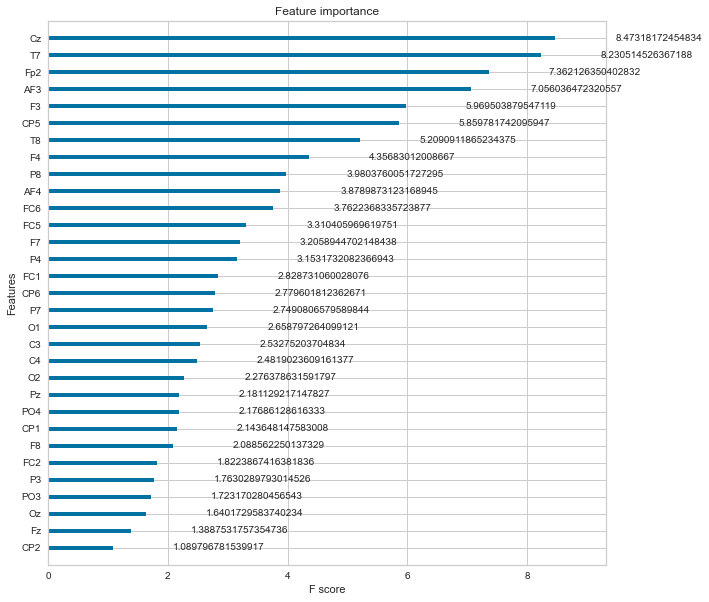

In [209]:
# plot feature importance
from xgboost import plot_importance
import matplotlib.pyplot as plt
#fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams["figure.figsize"] = (10,10)
plot_importance(model, importance_type='gain')
plt.show()

In [210]:
importances = model.get_booster().get_score(importance_type='gain')
importances

{'AF3': 7.056036472320557,
 'F7': 3.2058944702148438,
 'F3': 5.969503879547119,
 'FC1': 2.828731060028076,
 'FC5': 3.310405969619751,
 'T7': 8.230514526367188,
 'C3': 2.53275203704834,
 'CP1': 2.143648147583008,
 'CP5': 5.859781742095947,
 'P7': 2.7490806579589844,
 'P3': 1.7630289793014526,
 'Pz': 2.181129217147827,
 'PO3': 1.723170280456543,
 'O1': 2.658797264099121,
 'Oz': 1.6401729583740234,
 'O2': 2.276378631591797,
 'PO4': 2.17686128616333,
 'P4': 3.1531732082366943,
 'P8': 3.9803760051727295,
 'CP6': 2.779601812362671,
 'CP2': 1.089796781539917,
 'C4': 2.4819023609161377,
 'T8': 5.2090911865234375,
 'FC6': 3.7622368335723877,
 'FC2': 1.8223867416381836,
 'F4': 4.35683012008667,
 'F8': 2.088562250137329,
 'AF4': 3.8789873123168945,
 'Fp2': 7.362126350402832,
 'Fz': 1.3887531757354736,
 'Cz': 8.47318172454834}

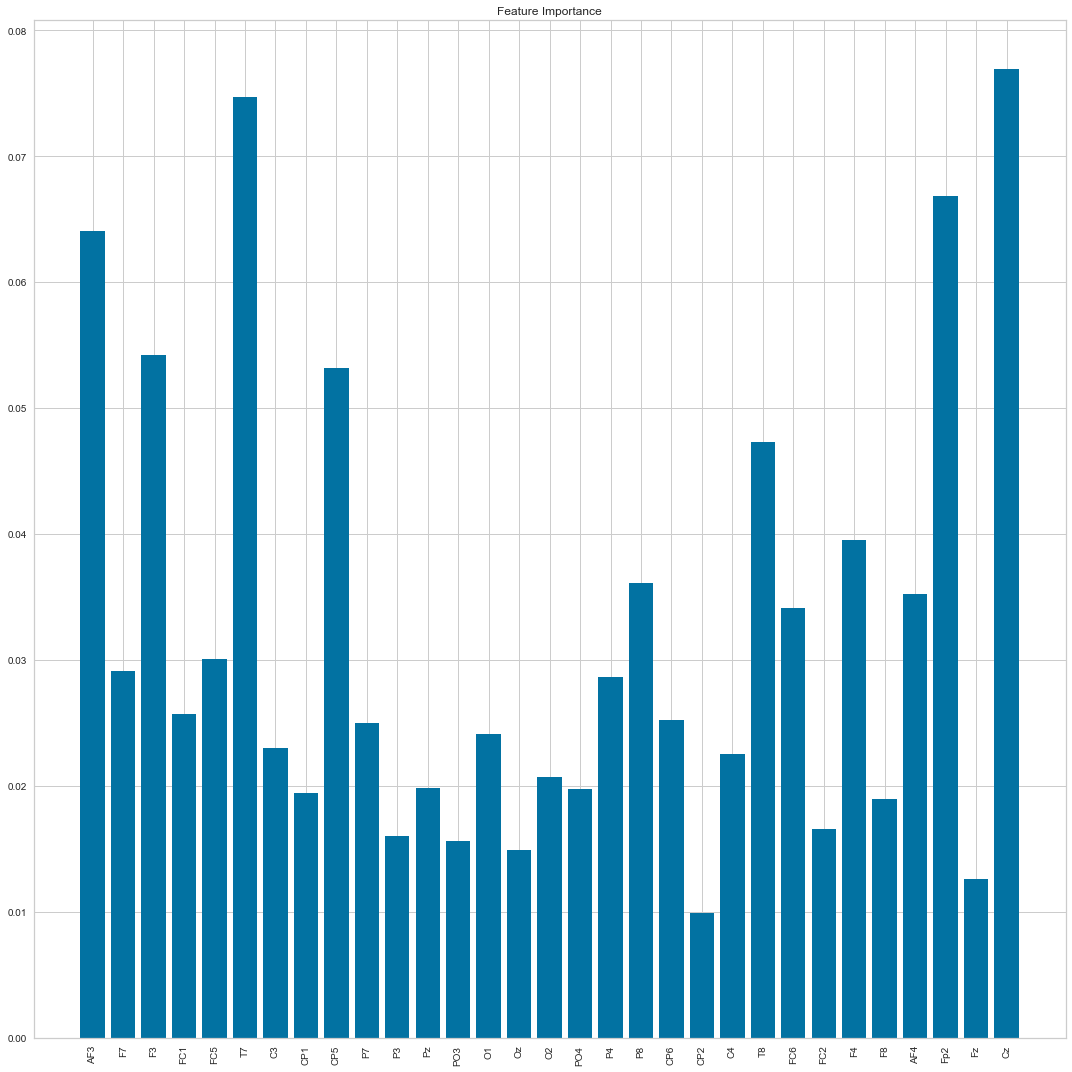

In [211]:
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

fig, ax = plt.subplots(figsize=(15,15))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances, align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns, rotation=90)
plt.tight_layout()
plt.show()

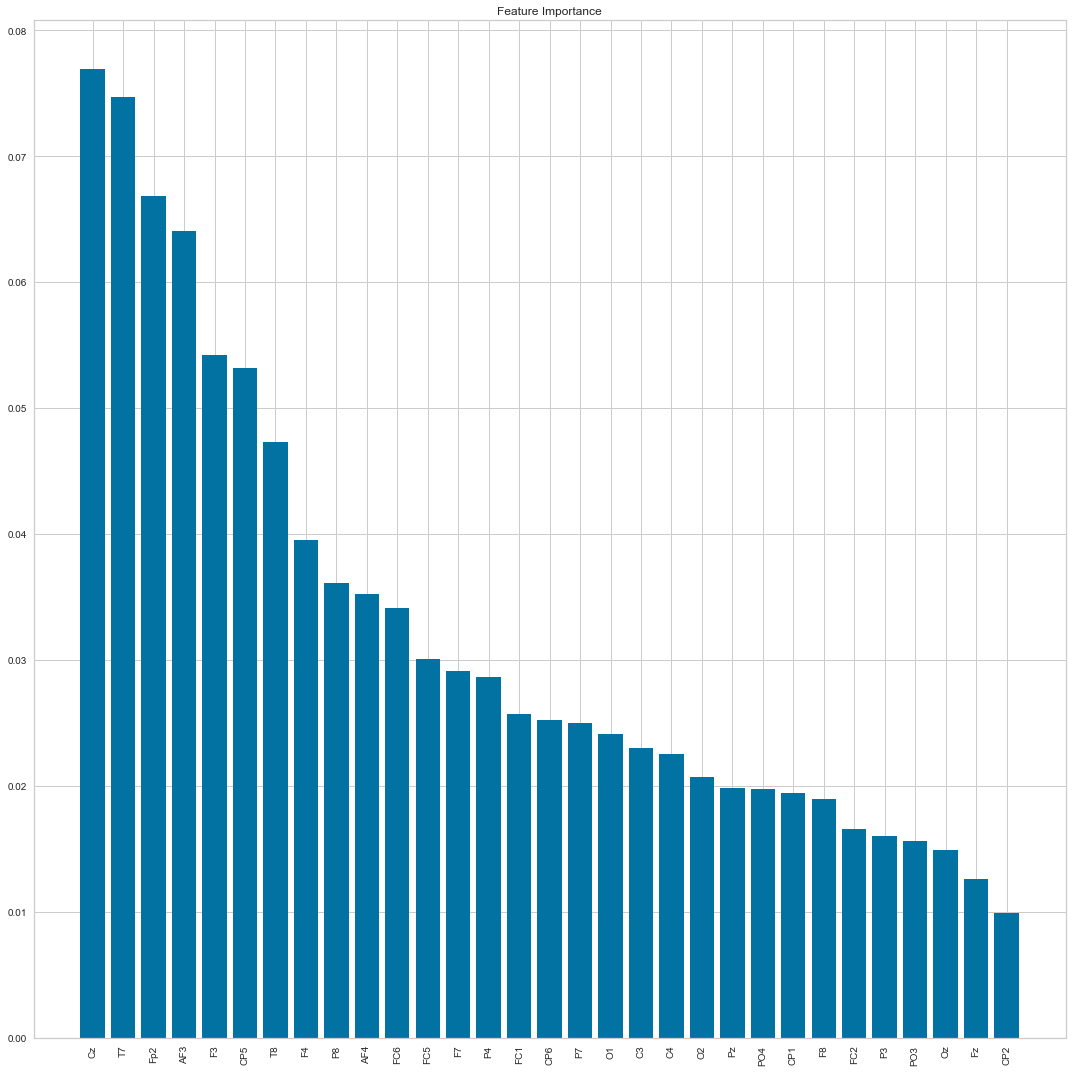

In [212]:
fig, ax = plt.subplots(figsize=(15,15))

importances = model.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [213]:
importances1 = []
importances1.append(0)
for imp in importances:
    importances1.append(imp)
importances1 = np.array(importances1)
importances1

array([0.        , 0.06406838, 0.02910933, 0.05420273, 0.02568471,
       0.03005828, 0.07473256, 0.02299723, 0.01946419, 0.05320646,
       0.02496148, 0.01600819, 0.01980452, 0.01564628, 0.02414172,
       0.01489267, 0.02066938, 0.01976577, 0.02863062, 0.03614157,
       0.02523861, 0.00989529, 0.02253552, 0.04729823, 0.03416088,
       0.01654716, 0.03955975, 0.01896402, 0.03522097, 0.06684765,
       0.01260979, 0.07693597])

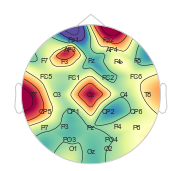

(<matplotlib.image.AxesImage at 0x2664068ee50>,
 <matplotlib.contour.QuadContourSet at 0x2663c677d60>)

In [214]:
fig, ax = plt.subplots(figsize=(3,3))
cnorm = TwoSlopeNorm(vmin=0, vcenter=(0 + max(importances1))/2, vmax=max(importances1))
mne.viz.plot_topomap(data=importances1, pos=raw.info, names=raw.ch_names, cnorm=cnorm, cmap='Spectral_r', axes=ax)